# Airline Data Analysis

This notebook combines all analyses into one document.

---
## Table of Contents
1. Customer Comment Summary
2. Passenger Booking Data
3. Inflight Satisfaction Survey
4. Airline Customer Booking


## 1. Customer Comment Summary

#### ✈️ Customer Comment Dataset Summary

This dataset contains **customer feedback** related to **airline flights**, focusing primarily on **food and beverage services**.  
It includes **flight details**, **customer information**, and **verbatim comments** along with **sentiment analysis** results.

---

##### 📊 Overview

Each record represents a single customer's feedback for a specific flight, including:

- Flight information (number, origin, destination, etc.)
- Customer and loyalty details
- Aircraft and operational details
- The customer’s comment and its analyzed sentiment

---

###### 🧾 Column Descriptions

| **Column Name** | **Description** |
|------------------|-----------------|
| **flight_number** | Unique identification number for each flight. |
| **origin_station_code** | Three-letter airport code for the **departure airport** (e.g., `LHX`). |
| **destination_station_code** | Three-letter airport code for the **arrival airport** (e.g., `SFX`). |
| **scheduled_departure_date** | Scheduled date of flight departure. |
| **arrival_delay_group** | Category describing **arrival status** (e.g., *Early & On-time*, *Delayed*). |
| **departure_delay_group** | Category describing **departure status** (e.g., *Early & On-time*, *Delayed*). |
| **entity** | Airline’s **geographical region** or **operational division** (e.g., *Atlantic*, *Domestic*). |
| **verbatim_text** | Raw **customer feedback**, written in the customer’s own words. |
| **seat_factor_band** | Category representing **flight occupancy** (e.g., *0–70*, *90+*). |
| **ques_verbatim_text** | The **survey question** the customer was responding to. |
| **loyalty_program_level** | Customer’s **loyalty tier** (e.g., *Non-Elite*, *Premier Platinum*). |
| **fleet_type_description** | Aircraft model used for the flight (e.g., *B777-200*, *A320-200*). |
| **fleet_usage** | Operational category of the aircraft (e.g., *Mainline*, *Express*). |
| **response_group** | Category indicating whether the respondent is a **loyalty program member** (e.g., *Member*, *Non-Member*). |
| **sentiments** | **Overall sentiment** of the comment (*Positive*, *Negative*, or *Neutral*). |
| **transformed_text** | **Processed version** of the customer’s feedback (e.g., lowercased, cleaned, stop words removed) for text analysis. |

---


#### Loading the csv file into a dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
customer_comments_df = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Customer_comment.csv')
display(customer_comments_df.head())

Unnamed: 0  flight_number origin_station_code destination_station_code  \
0           0            950                 LHX                      SFX   
1           1            950                 LHX                      SFX   
2           2           1876                 FLX                      EWX   
3           3           5469                 SFX                      SEX   
4           4            281                 DEX                      ANX   

  scheduled_departure_date arrival_delay_group departure_delay_group  \
0               2022-09-01      Early & Ontime               Delayed   
1               2022-09-01      Early & Ontime               Delayed   
2               2022-09-01      Early & Ontime        Early & Ontime   
3               2022-09-01      Early & Ontime        Early & Ontime   
4               2022-09-01      Early & Ontime        Early & Ontime   

     entity                                      verbatim_text  \
0  Atlantic  There was no salad dressing. The staff informe...   
1  Atlantic                                      Not a choice.   
2  Domestic                    More variety and bigger snacks.   
3  Domestic  Serving pretzels and cookies in first class wa...   
4  Domestic  More inflight selections to purchase for full ...   

  seat_factor_band                                 ques_verbatim_text  \
0          0 to 70  Is there anything else you'd like to share abo...   
1          0 to 70  Is there anything else you'd like to share abo...   
2              90+  Is there anything else you'd like to share abo...   
3              90+  Is there anything else you'd like to share abo...   
4          0 to 70  Is there anything else you'd like to share abo...   

  loyalty_program_level fleet_type_description fleet_usage response_group  \
0             non-elite               B777-200    Mainline         member   
1                   NaN               B777-200    Mainline     non-member   
2             non-elite               A320-200    Mainline         member   
3          premier gold                ERJ-175     Express         member   
4             non-elite              B737-MAX8    Mainline         member   

  sentiments                                   transformed_text  
0    Neutral  salad dress staff inform flight receiv salad d...  
1    Neutral                                              choic  
2    Neutral                               varieti bigger snack  
3    Neutral  serv pretzel cooki first class extrem disappoi...  
4    Neutral                  inflight select purchas full meal

#### Data exploration

In [3]:
num_rows = customer_comments_df.shape[0]
print(f"The number of rows in the dataset is: {num_rows}")

The number of rows in the dataset is: 9424


In [4]:
# Count the total number of duplicate rows
duplicate_count = customer_comments_df.duplicated().sum()
print(f'There are {duplicate_count} duplicate rows in the dataset.')

There are 0 duplicate rows in the dataset.


In [5]:
num_unique_flights = customer_comments_df['flight_number'].nunique()
print(f"The number of unique flight numbers in the dataset is: {num_unique_flights}")

The number of unique flight numbers in the dataset is: 3001


In [6]:
null_values_per_column = customer_comments_df.isnull().sum()
print("Number of null values in each column:")
print(null_values_per_column)

Number of null values in each column:
Unnamed: 0                     0
flight_number                  0
origin_station_code            0
destination_station_code       0
scheduled_departure_date       0
arrival_delay_group            0
departure_delay_group          0
entity                         0
verbatim_text                  0
seat_factor_band               0
ques_verbatim_text             0
loyalty_program_level       2504
fleet_type_description         0
fleet_usage                    0
response_group                 0
sentiments                     0
transformed_text            1019
dtype: int64


In [7]:
categorical_cols = customer_comments_df.select_dtypes(include='object').columns
categorical_df = customer_comments_df[categorical_cols]
display(categorical_df.head())

origin_station_code destination_station_code scheduled_departure_date  \
0                 LHX                      SFX               2022-09-01   
1                 LHX                      SFX               2022-09-01   
2                 FLX                      EWX               2022-09-01   
3                 SFX                      SEX               2022-09-01   
4                 DEX                      ANX               2022-09-01   

  arrival_delay_group departure_delay_group    entity  \
0      Early & Ontime               Delayed  Atlantic   
1      Early & Ontime               Delayed  Atlantic   
2      Early & Ontime        Early & Ontime  Domestic   
3      Early & Ontime        Early & Ontime  Domestic   
4      Early & Ontime        Early & Ontime  Domestic   

                                       verbatim_text seat_factor_band  \
0  There was no salad dressing. The staff informe...          0 to 70   
1                                      Not a choice.          0 to 70   
2                    More variety and bigger snacks.              90+   
3  Serving pretzels and cookies in first class wa...              90+   
4  More inflight selections to purchase for full ...          0 to 70   

                                  ques_verbatim_text loyalty_program_level  \
0  Is there anything else you'd like to share abo...             non-elite   
1  Is there anything else you'd like to share abo...                   NaN   
2  Is there anything else you'd like to share abo...             non-elite   
3  Is there anything else you'd like to share abo...          premier gold   
4  Is there anything else you'd like to share abo...             non-elite   

  fleet_type_description fleet_usage response_group sentiments  \
0               B777-200    Mainline         member    Neutral   
1               B777-200    Mainline     non-member    Neutral   
2               A320-200    Mainline         member    Neutral   
3                ERJ-175     Express         member    Neutral   
4              B737-MAX8    Mainline         member    Neutral   

                                    transformed_text  
0  salad dress staff inform flight receiv salad d...  
1                                              choic  
2                               varieti bigger snack  
3  serv pretzel cooki first class extrem disappoi...  
4                  inflight select purchas full meal

In [8]:
col = 'verbatim_text'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: verbatim_text
Value Counts:


verbatim_text
No.                                                                                        774
no.                                                                                        139
None.                                                                                       82
N/A.                                                                                        38
Nothing.                                                                                    20
                                                                                          ... 
Dairy free vegan options too.                                                                1
Truly outstanding in every way!. My husband and daughter felt the same way. Thank you!.      1
We would have preferred a lunch offering on this flight instead of breakfast.                1
Short flight -no service.                                                                    1
All meals/snacks were good.         

Number of unique values: 8013


In [9]:
col = 'seat_factor_band'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: seat_factor_band
Value Counts:


seat_factor_band
90+        6302
80+        1639
70+         786
0 to 70     697
Name: count, dtype: int64

Number of unique values: 4


In [10]:
col = 'ques_verbatim_text'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: ques_verbatim_text
Value Counts:


ques_verbatim_text
Is there anything else you'd like to share about the food & beverage served on your flight from [CITY] to [CITY]?    9424
Name: count, dtype: int64

Number of unique values: 1


In [11]:
col = 'loyalty_program_level'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: loyalty_program_level
Value Counts:


loyalty_program_level
non-elite           4128
premier silver       874
premier 1k           722
premier gold         604
premier platinum     451
global services      140
NBK                    1
Name: count, dtype: int64

Number of unique values: 7


In [12]:
col = 'fleet_type_description'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: fleet_type_description
Value Counts:


fleet_type_description
B737-900     1451
B737-800     1133
B777-200      882
ERJ-175       714
A320-200      640
A319-100      620
B787-9        490
B777-300      457
B737-MAX9     430
B767-300      386
CRJ-200       315
B737-700      282
B757-200      259
B787-10       257
B787-8        220
B767-400      186
B737-MAX8     181
ERJ-145       135
ERJ-170       126
B757-300      111
CRJ-550        89
CRJ-700        60
Name: count, dtype: int64

Number of unique values: 22


In [13]:
col = 'fleet_usage'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: fleet_usage
Value Counts:


fleet_usage
Mainline    7985
Express     1439
Name: count, dtype: int64

Number of unique values: 2


In [14]:
col = 'response_group'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: response_group
Value Counts:


response_group
member        6905
non-member    2518
NBK              1
Name: count, dtype: int64

Number of unique values: 3


In [15]:
col = 'sentiments'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: sentiments
Value Counts:


sentiments
Neutral     9307
Negative     117
Name: count, dtype: int64

Number of unique values: 2


In [16]:
col = 'transformed_text'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: transformed_text
Value Counts:


transformed_text
none                                                                                                                               97
good                                                                                                                               69
thank                                                                                                                              41
na                                                                                                                                 30
snack                                                                                                                              27
                                                                                                                                   ..
stale                                                                                                                               1
overnight oat recip busi stuff chia seed bana

Number of unique values: 7609


In [17]:
col = 'origin_station_code'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: origin_station_code
Value Counts:


origin_station_code
IAX    1149
EWX    1009
DEX     942
ORX     893
SFX     720
       ... 
PQX       1
XWX       1
OTX       1
GCX       1
LRX       1
Name: count, Length: 195, dtype: int64

Number of unique values: 195


In [18]:
col = 'destination_station_code'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: destination_station_code
Value Counts:


destination_station_code
IAX    1427
EWX    1210
ORX     947
DEX     872
SFX     768
       ... 
VEX       1
PLX       1
HHX       1
HPX       1
ECX       1
Name: count, Length: 192, dtype: int64

Number of unique values: 192


In [19]:
col = 'scheduled_departure_date'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: scheduled_departure_date
Value Counts:


scheduled_departure_date
2022-09-10    399
2022-09-17    378
2022-09-24    366
2022-09-27    365
2022-09-06    346
2022-09-13    336
2022-09-04    335
2022-09-03    334
2022-09-20    330
2022-09-07    324
2022-09-09    322
2022-09-23    315
2022-09-18    314
2022-09-05    311
2022-09-01    308
2022-09-26    305
2022-09-15    305
2022-09-02    303
2022-09-19    300
2022-09-12    300
2022-09-16    298
2022-09-29    298
2022-09-11    296
2022-09-14    296
2022-09-08    295
2022-09-21    291
2022-09-22    290
2022-09-25    288
2022-09-28    281
2022-09-30    195
Name: count, dtype: int64

Number of unique values: 30


In [20]:
col = 'arrival_delay_group'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: arrival_delay_group
Value Counts:


arrival_delay_group
Early & Ontime    6811
Delayed           2613
Name: count, dtype: int64

Number of unique values: 2


In [21]:
col = 'departure_delay_group'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: departure_delay_group
Value Counts:


departure_delay_group
Early & Ontime    6241
Delayed           3183
Name: count, dtype: int64

Number of unique values: 2


In [22]:
col = 'entity'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: entity
Value Counts:


entity
Domestic    6593
Atlantic    1887
Latin        678
Pacific      266
Name: count, dtype: int64

Number of unique values: 4


#### Data Visualization

### Origin Station Code Distribution

This pie chart shows the distribution of origin station codes. Categories contributing less than 5% have been grouped into 'Other'.

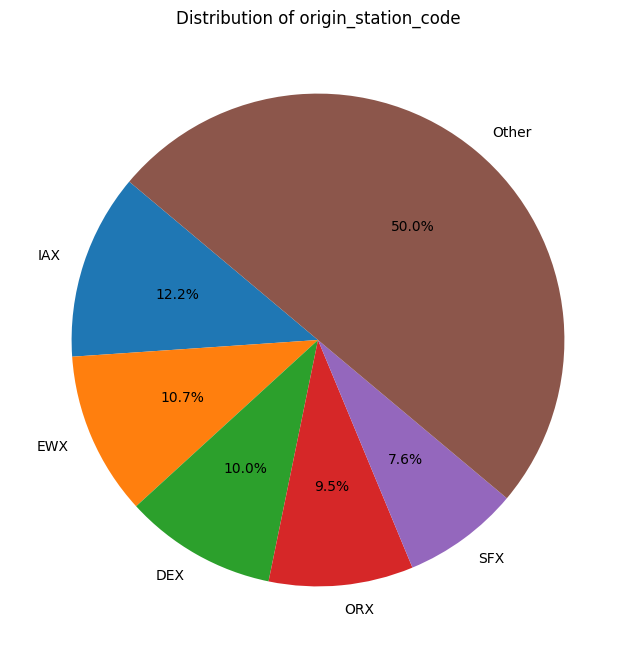

In [23]:
col = 'origin_station_code'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Destination Station Code Distribution

This pie chart shows the distribution of destination station codes. Categories contributing less than 5% have been grouped into 'Other'.

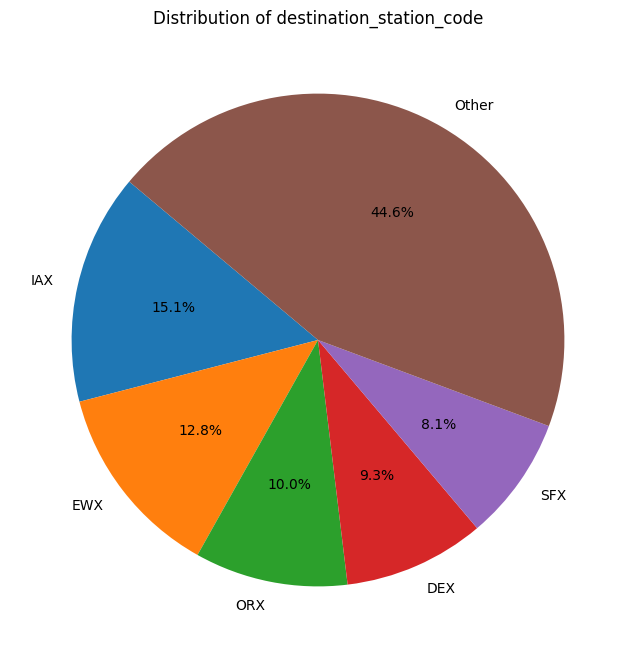

In [24]:
col = 'destination_station_code'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Arrival Delay Group Distribution

This pie chart shows the distribution of arrival delay groups. Categories contributing less than 5% have been grouped into 'Other'.

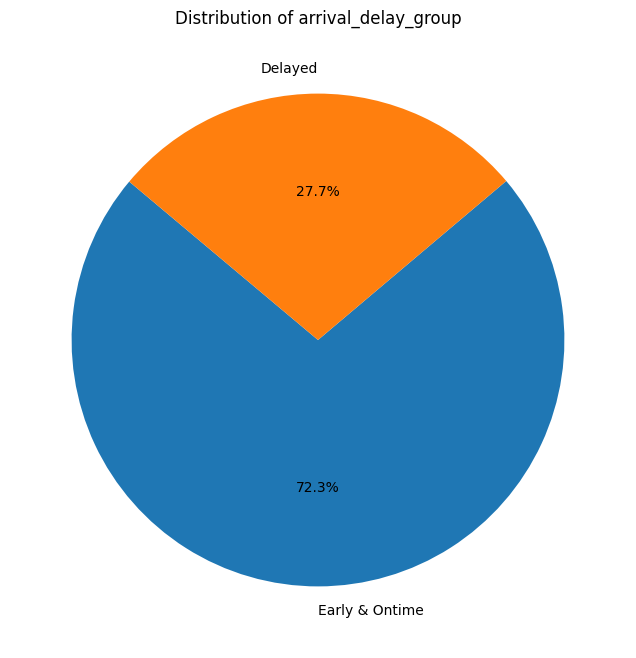

In [25]:
col = 'arrival_delay_group'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Departure Delay Group Distribution

This pie chart shows the distribution of departure delay groups. Categories contributing less than 5% have been grouped into 'Other'.

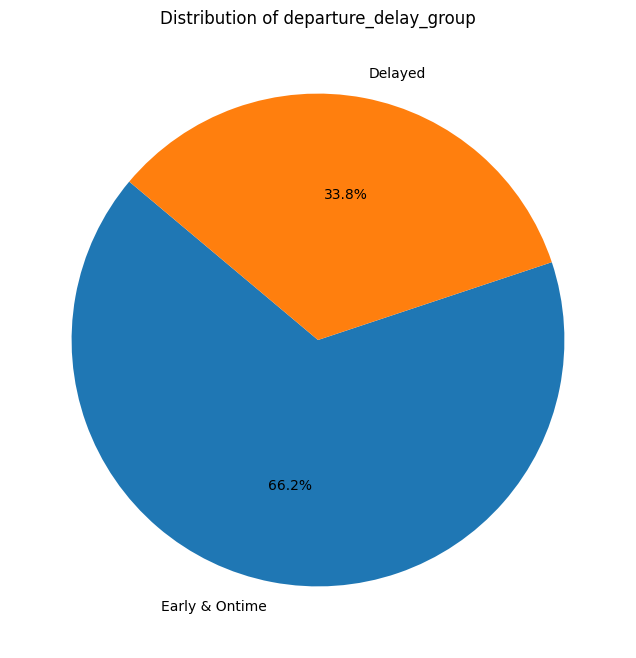

In [26]:
col = 'departure_delay_group'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Entity Distribution

This pie chart shows the distribution of entities. Categories contributing less than 5% have been grouped into 'Other'.

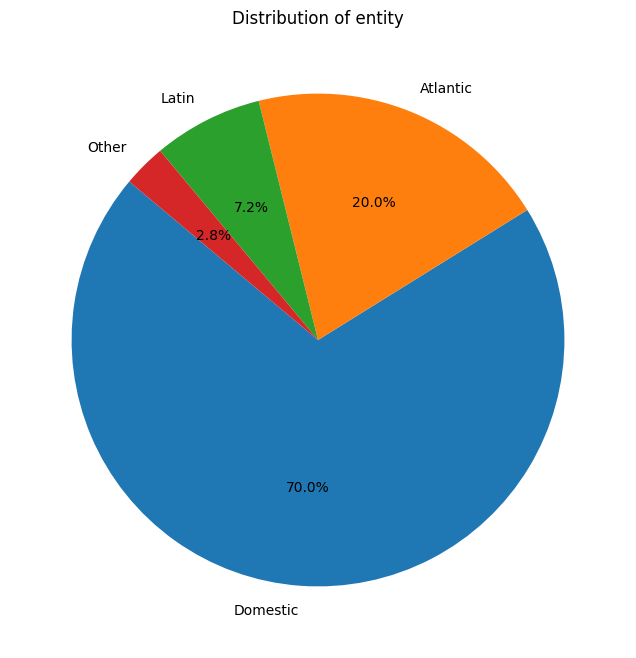

In [27]:
col = 'entity'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Seat Factor Band Distribution

This pie chart shows the distribution of seat factor bands. Categories contributing less than 5% have been grouped into 'Other'.

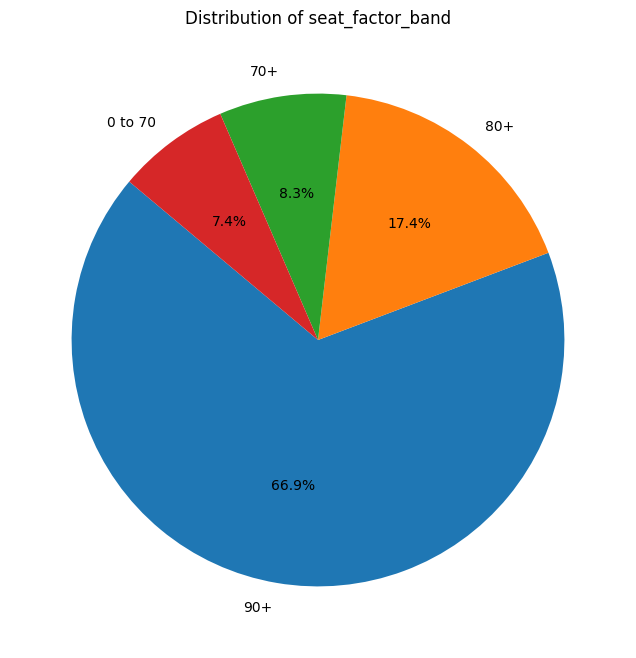

In [28]:
col = 'seat_factor_band'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Loyalty Program Level Distribution

This pie chart shows the distribution of loyalty program levels. Categories contributing less than 5% have been grouped into 'Other'.

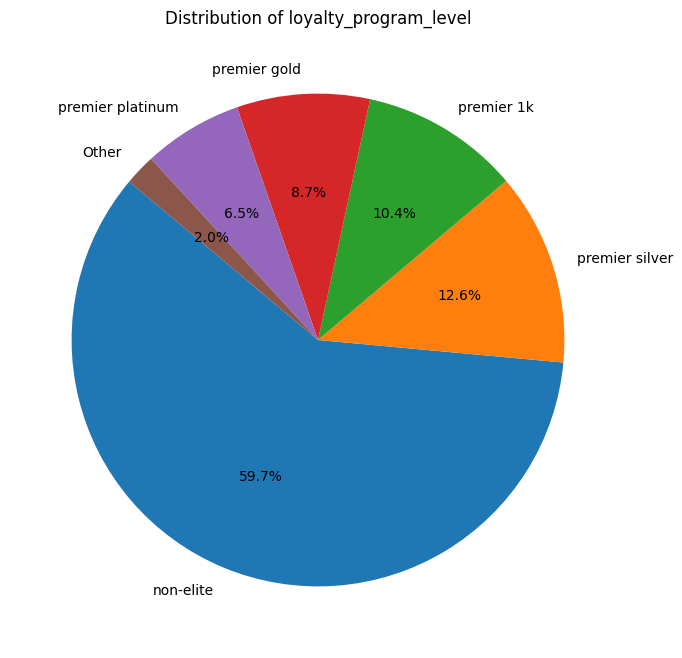

In [29]:
col = 'loyalty_program_level'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Fleet Type Description Distribution

This pie chart shows the distribution of fleet type descriptions. Categories contributing less than 5% have been grouped into 'Other'.

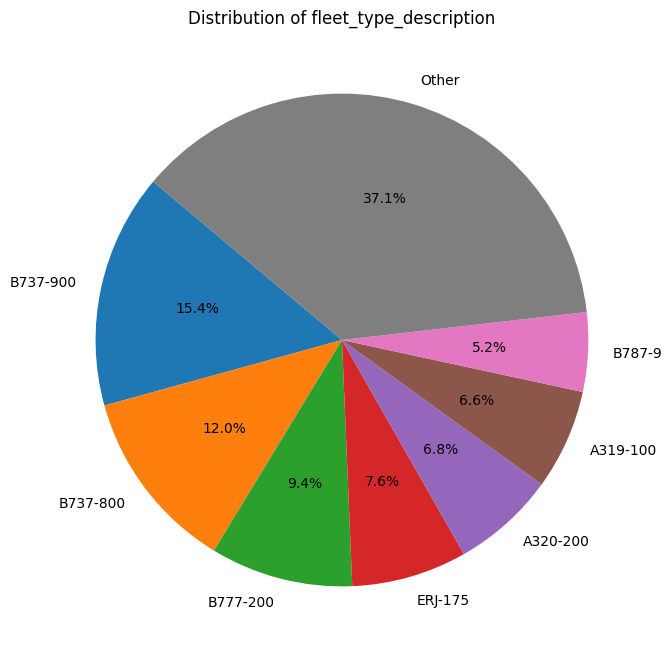

In [30]:
col = 'fleet_type_description'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Fleet Usage Distribution

This pie chart shows the distribution of fleet usage. Categories contributing less than 5% have been grouped into 'Other'.

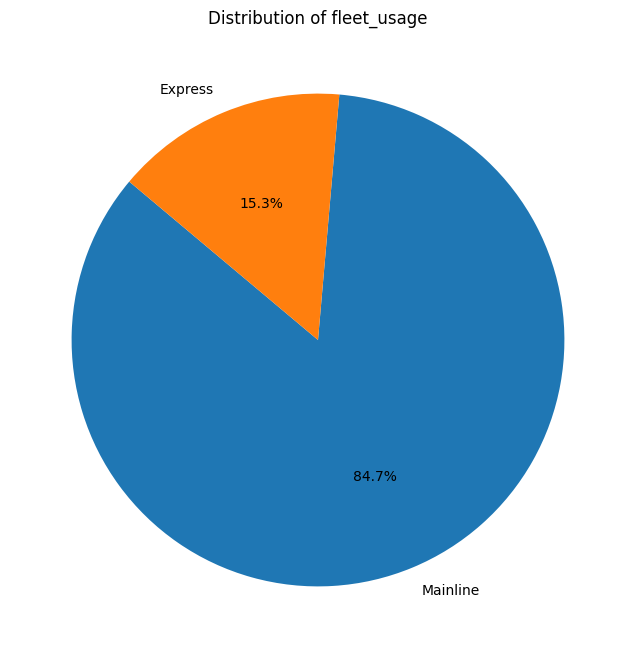

In [31]:
col = 'fleet_usage'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Response Group Distribution

This pie chart shows the distribution of response groups. Categories contributing less than 5% have been grouped into 'Other'.

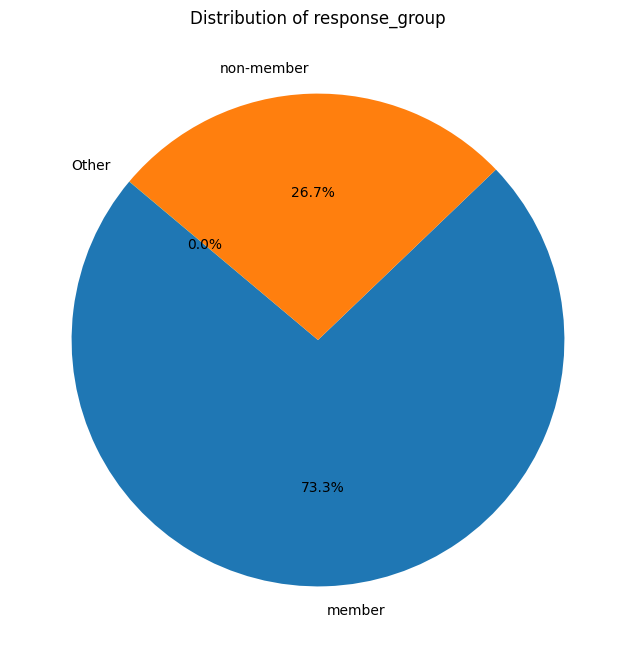

In [32]:
col = 'response_group'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Sentiments Distribution

This pie chart shows the distribution of sentiments. Categories contributing less than 5% have been grouped into 'Other'.

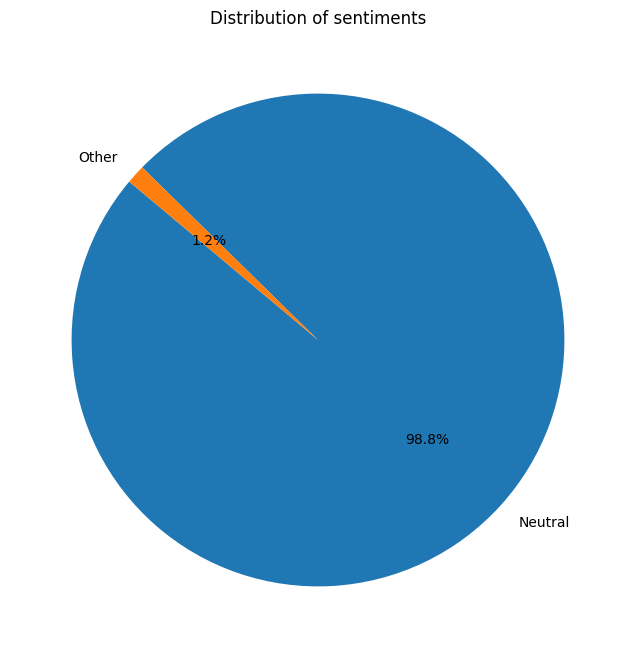

In [33]:
col = 'sentiments'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Data preprocessing

### Label Encoding for 'arrival_delay_group'

To prepare the 'arrival_delay_group' column for numerical analysis, we will apply label encoding ,since we only has two representation in the entire column. The categories will be mapped as follows:

- 'Early & Ontime' will be encoded as **0**
- 'Delayed' will be encoded as **1**

In [34]:
customer_comments_df['arrival_delay_group'] = customer_comments_df['arrival_delay_group'].map({'Early & Ontime': 0, 'Delayed': 1})
display(customer_comments_df[['arrival_delay_group']].head())

arrival_delay_group
0                    0
1                    0
2                    0
3                    0
4                    0

### Label Encoding for 'departure_delay_group'

To prepare the 'departure_delay_group' column for numerical analysis, we will apply label encoding,since we only has two representation in the entire column. The categories will be mapped as follows:

- 'Early & Ontime' will be encoded as **0**
- 'Delayed' will be encoded as **1**

In [35]:
customer_comments_df['departure_delay_group'] = customer_comments_df['departure_delay_group'].map({'Early & Ontime': 0, 'Delayed': 1})
display(customer_comments_df[['departure_delay_group']].head())

departure_delay_group
0                      1
1                      1
2                      0
3                      0
4                      0

In [36]:
customer_comments_df.head()

Unnamed: 0  flight_number origin_station_code destination_station_code  \
0           0            950                 LHX                      SFX   
1           1            950                 LHX                      SFX   
2           2           1876                 FLX                      EWX   
3           3           5469                 SFX                      SEX   
4           4            281                 DEX                      ANX   

  scheduled_departure_date  arrival_delay_group  departure_delay_group  \
0               2022-09-01                    0                      1   
1               2022-09-01                    0                      1   
2               2022-09-01                    0                      0   
3               2022-09-01                    0                      0   
4               2022-09-01                    0                      0   

     entity                                      verbatim_text  \
0  Atlantic  There was no salad dressing. The staff informe...   
1  Atlantic                                      Not a choice.   
2  Domestic                    More variety and bigger snacks.   
3  Domestic  Serving pretzels and cookies in first class wa...   
4  Domestic  More inflight selections to purchase for full ...   

  seat_factor_band                                 ques_verbatim_text  \
0          0 to 70  Is there anything else you'd like to share abo...   
1          0 to 70  Is there anything else you'd like to share abo...   
2              90+  Is there anything else you'd like to share abo...   
3              90+  Is there anything else you'd like to share abo...   
4          0 to 70  Is there anything else you'd like to share abo...   

  loyalty_program_level fleet_type_description fleet_usage response_group  \
0             non-elite               B777-200    Mainline         member   
1                   NaN               B777-200    Mainline     non-member   
2             non-elite               A320-200    Mainline         member   
3          premier gold                ERJ-175     Express         member   
4             non-elite              B737-MAX8    Mainline         member   

  sentiments                                   transformed_text  
0    Neutral  salad dress staff inform flight receiv salad d...  
1    Neutral                                              choic  
2    Neutral                               varieti bigger snack  
3    Neutral  serv pretzel cooki first class extrem disappoi...  
4    Neutral                  inflight select purchas full meal

### One-Hot Encoding for 'entity' Column

To prepare the 'entity' column for analysis, we will apply one-hot encoding. This technique is suitable here because 'entity' is a nominal categorical variable (there is no inherent order or ranking between the categories like 'Atlantic', 'Domestic', 'Latin', and 'Pacific').

One-hot encoding will convert this single column into multiple binary columns, one for each unique category. A value of 1 in a new column indicates the presence of that category for a given row, while a 0 indicates its absence. This prevents the model from assuming any ordinal relationship between the categories, which would be incorrect for nominal data.

In [37]:
entity_one_hot = pd.get_dummies(customer_comments_df['entity'], prefix='entity')
customer_comments_df = pd.concat([customer_comments_df, entity_one_hot], axis=1)
display(customer_comments_df.head())

Unnamed: 0  flight_number origin_station_code destination_station_code  \
0           0            950                 LHX                      SFX   
1           1            950                 LHX                      SFX   
2           2           1876                 FLX                      EWX   
3           3           5469                 SFX                      SEX   
4           4            281                 DEX                      ANX   

  scheduled_departure_date  arrival_delay_group  departure_delay_group  \
0               2022-09-01                    0                      1   
1               2022-09-01                    0                      1   
2               2022-09-01                    0                      0   
3               2022-09-01                    0                      0   
4               2022-09-01                    0                      0   

     entity                                      verbatim_text  \
0  Atlantic  There was no salad dressing. The staff informe...   
1  Atlantic                                      Not a choice.   
2  Domestic                    More variety and bigger snacks.   
3  Domestic  Serving pretzels and cookies in first class wa...   
4  Domestic  More inflight selections to purchase for full ...   

  seat_factor_band  ... loyalty_program_level fleet_type_description  \
0          0 to 70  ...             non-elite               B777-200   
1          0 to 70  ...                   NaN               B777-200   
2              90+  ...             non-elite               A320-200   
3              90+  ...          premier gold                ERJ-175   
4          0 to 70  ...             non-elite              B737-MAX8   

  fleet_usage response_group sentiments  \
0    Mainline         member    Neutral   
1    Mainline     non-member    Neutral   
2    Mainline         member    Neutral   
3     Express         member    Neutral   
4    Mainline         member    Neutral   

                                    transformed_text entity_Atlantic  \
0  salad dress staff inform flight receiv salad d...            True   
1                                              choic            True   
2                               varieti bigger snack           False   
3  serv pretzel cooki first class extrem disappoi...           False   
4                  inflight select purchas full meal           False   

   entity_Domestic  entity_Latin  entity_Pacific  
0            False         False           False  
1            False         False           False  
2             True         False           False  
3             True         False           False  
4             True         False           False  

[5 rows x 21 columns]

In [38]:
customer_comments_df = customer_comments_df.drop('entity', axis=1)
display(customer_comments_df.head())

Unnamed: 0  flight_number origin_station_code destination_station_code  \
0           0            950                 LHX                      SFX   
1           1            950                 LHX                      SFX   
2           2           1876                 FLX                      EWX   
3           3           5469                 SFX                      SEX   
4           4            281                 DEX                      ANX   

  scheduled_departure_date  arrival_delay_group  departure_delay_group  \
0               2022-09-01                    0                      1   
1               2022-09-01                    0                      1   
2               2022-09-01                    0                      0   
3               2022-09-01                    0                      0   
4               2022-09-01                    0                      0   

                                       verbatim_text seat_factor_band  \
0  There was no salad dressing. The staff informe...          0 to 70   
1                                      Not a choice.          0 to 70   
2                    More variety and bigger snacks.              90+   
3  Serving pretzels and cookies in first class wa...              90+   
4  More inflight selections to purchase for full ...          0 to 70   

                                  ques_verbatim_text loyalty_program_level  \
0  Is there anything else you'd like to share abo...             non-elite   
1  Is there anything else you'd like to share abo...                   NaN   
2  Is there anything else you'd like to share abo...             non-elite   
3  Is there anything else you'd like to share abo...          premier gold   
4  Is there anything else you'd like to share abo...             non-elite   

  fleet_type_description fleet_usage response_group sentiments  \
0               B777-200    Mainline         member    Neutral   
1               B777-200    Mainline     non-member    Neutral   
2               A320-200    Mainline         member    Neutral   
3                ERJ-175     Express         member    Neutral   
4              B737-MAX8    Mainline         member    Neutral   

                                    transformed_text  entity_Atlantic  \
0  salad dress staff inform flight receiv salad d...             True   
1                                              choic             True   
2                               varieti bigger snack            False   
3  serv pretzel cooki first class extrem disappoi...            False   
4                  inflight select purchas full meal            False   

   entity_Domestic  entity_Latin  entity_Pacific  
0            False         False           False  
1            False         False           False  
2             True         False           False  
3             True         False           False  
4             True         False           False

### Dropping 'ques_verbatim_text' Column

The 'ques_verbatim_text' column contains the survey question the customer was responding to. Upon inspection, it was found that this column has only one unique value across the entire dataset. Since this column does not provide any varying information, it will not contribute to the model's ability to learn patterns and relationships in the data. Therefore, it is appropriate to drop this column to reduce dimensionality and remove irrelevant features.

In [39]:
customer_comments_df = customer_comments_df.drop('ques_verbatim_text', axis=1)
display(customer_comments_df.head())

Unnamed: 0  flight_number origin_station_code destination_station_code  \
0           0            950                 LHX                      SFX   
1           1            950                 LHX                      SFX   
2           2           1876                 FLX                      EWX   
3           3           5469                 SFX                      SEX   
4           4            281                 DEX                      ANX   

  scheduled_departure_date  arrival_delay_group  departure_delay_group  \
0               2022-09-01                    0                      1   
1               2022-09-01                    0                      1   
2               2022-09-01                    0                      0   
3               2022-09-01                    0                      0   
4               2022-09-01                    0                      0   

                                       verbatim_text seat_factor_band  \
0  There was no salad dressing. The staff informe...          0 to 70   
1                                      Not a choice.          0 to 70   
2                    More variety and bigger snacks.              90+   
3  Serving pretzels and cookies in first class wa...              90+   
4  More inflight selections to purchase for full ...          0 to 70   

  loyalty_program_level fleet_type_description fleet_usage response_group  \
0             non-elite               B777-200    Mainline         member   
1                   NaN               B777-200    Mainline     non-member   
2             non-elite               A320-200    Mainline         member   
3          premier gold                ERJ-175     Express         member   
4             non-elite              B737-MAX8    Mainline         member   

  sentiments                                   transformed_text  \
0    Neutral  salad dress staff inform flight receiv salad d...   
1    Neutral                                              choic   
2    Neutral                               varieti bigger snack   
3    Neutral  serv pretzel cooki first class extrem disappoi...   
4    Neutral                  inflight select purchas full meal   

   entity_Atlantic  entity_Domestic  entity_Latin  entity_Pacific  
0             True            False         False           False  
1             True            False         False           False  
2            False             True         False           False  
3            False             True         False           False  
4            False             True         False           False

### Reponse group column handling



#### Handling Outliers in 'response_group'

Upon examining the value counts for the 'response_group' column, it was observed that the category 'NBK' has only one row. This suggests that 'NBK' might be an outlier or represent a data entry error. To avoid potential issues in subsequent analysis or modeling due to this rare category, we will remove the rows where 'response_group' is 'NBK'.

In [40]:
customer_comments_df = customer_comments_df[customer_comments_df['response_group'] != 'NBK']
display(customer_comments_df.head())

Unnamed: 0  flight_number origin_station_code destination_station_code  \
0           0            950                 LHX                      SFX   
1           1            950                 LHX                      SFX   
2           2           1876                 FLX                      EWX   
3           3           5469                 SFX                      SEX   
4           4            281                 DEX                      ANX   

  scheduled_departure_date  arrival_delay_group  departure_delay_group  \
0               2022-09-01                    0                      1   
1               2022-09-01                    0                      1   
2               2022-09-01                    0                      0   
3               2022-09-01                    0                      0   
4               2022-09-01                    0                      0   

                                       verbatim_text seat_factor_band  \
0  There was no salad dressing. The staff informe...          0 to 70   
1                                      Not a choice.          0 to 70   
2                    More variety and bigger snacks.              90+   
3  Serving pretzels and cookies in first class wa...              90+   
4  More inflight selections to purchase for full ...          0 to 70   

  loyalty_program_level fleet_type_description fleet_usage response_group  \
0             non-elite               B777-200    Mainline         member   
1                   NaN               B777-200    Mainline     non-member   
2             non-elite               A320-200    Mainline         member   
3          premier gold                ERJ-175     Express         member   
4             non-elite              B737-MAX8    Mainline         member   

  sentiments                                   transformed_text  \
0    Neutral  salad dress staff inform flight receiv salad d...   
1    Neutral                                              choic   
2    Neutral                               varieti bigger snack   
3    Neutral  serv pretzel cooki first class extrem disappoi...   
4    Neutral                  inflight select purchas full meal   

   entity_Atlantic  entity_Domestic  entity_Latin  entity_Pacific  
0             True            False         False           False  
1             True            False         False           False  
2            False             True         False           False  
3            False             True         False           False  
4            False             True         False           False

In [41]:
#checking the reponse group after
col = 'response_group'
print(f"\nColumn: {col}")
print("Value Counts:")
display(customer_comments_df[col].value_counts())
print(f"Number of unique values: {customer_comments_df[col].nunique()}")


Column: response_group
Value Counts:


response_group
member        6905
non-member    2518
Name: count, dtype: int64

Number of unique values: 2


#### Label Encoding for 'response_group'

To prepare the 'response_group' column for numerical analysis, we will apply label encoding. The categories will be mapped as follows:

- 'member' will be encoded as **1**
- 'non-member' will be encoded as **0**

In [42]:
customer_comments_df['response_group'] = customer_comments_df['response_group'].map({'member': 1, 'non-member': 0})
display(customer_comments_df[['response_group']].head())

response_group
0               1
1               0
2               1
3               1
4               1

In [43]:
customer_comments_df.head()

Unnamed: 0  flight_number origin_station_code destination_station_code  \
0           0            950                 LHX                      SFX   
1           1            950                 LHX                      SFX   
2           2           1876                 FLX                      EWX   
3           3           5469                 SFX                      SEX   
4           4            281                 DEX                      ANX   

  scheduled_departure_date  arrival_delay_group  departure_delay_group  \
0               2022-09-01                    0                      1   
1               2022-09-01                    0                      1   
2               2022-09-01                    0                      0   
3               2022-09-01                    0                      0   
4               2022-09-01                    0                      0   

                                       verbatim_text seat_factor_band  \
0  There was no salad dressing. The staff informe...          0 to 70   
1                                      Not a choice.          0 to 70   
2                    More variety and bigger snacks.              90+   
3  Serving pretzels and cookies in first class wa...              90+   
4  More inflight selections to purchase for full ...          0 to 70   

  loyalty_program_level fleet_type_description fleet_usage  response_group  \
0             non-elite               B777-200    Mainline               1   
1                   NaN               B777-200    Mainline               0   
2             non-elite               A320-200    Mainline               1   
3          premier gold                ERJ-175     Express               1   
4             non-elite              B737-MAX8    Mainline               1   

  sentiments                                   transformed_text  \
0    Neutral  salad dress staff inform flight receiv salad d...   
1    Neutral                                              choic   
2    Neutral                               varieti bigger snack   
3    Neutral  serv pretzel cooki first class extrem disappoi...   
4    Neutral                  inflight select purchas full meal   

   entity_Atlantic  entity_Domestic  entity_Latin  entity_Pacific  
0             True            False         False           False  
1             True            False         False           False  
2            False             True         False           False  
3            False             True         False           False  
4            False             True         False           False

### Label Encoding for 'fleet_usage'

To prepare the 'fleet_usage' column for numerical analysis, we will apply label encoding. This column represents whether the aircraft is used for 'Mainline' or 'Express' operations. Since there are only two distinct categories and no inherent order, label encoding is a suitable method to convert these categorical values into numerical representations.

The categories will be mapped as follows:

- 'Mainline' will be encoded as **1**
- 'Express' will be encoded as **0**

In [44]:
customer_comments_df['fleet_usage'] = customer_comments_df['fleet_usage'].map({'Mainline': 1, 'Express': 0})
display(customer_comments_df[['fleet_usage']].head())

fleet_usage
0            1
1            1
2            1
3            0
4            1

In [45]:
customer_comments_df.head()

Unnamed: 0  flight_number origin_station_code destination_station_code  \
0           0            950                 LHX                      SFX   
1           1            950                 LHX                      SFX   
2           2           1876                 FLX                      EWX   
3           3           5469                 SFX                      SEX   
4           4            281                 DEX                      ANX   

  scheduled_departure_date  arrival_delay_group  departure_delay_group  \
0               2022-09-01                    0                      1   
1               2022-09-01                    0                      1   
2               2022-09-01                    0                      0   
3               2022-09-01                    0                      0   
4               2022-09-01                    0                      0   

                                       verbatim_text seat_factor_band  \
0  There was no salad dressing. The staff informe...          0 to 70   
1                                      Not a choice.          0 to 70   
2                    More variety and bigger snacks.              90+   
3  Serving pretzels and cookies in first class wa...              90+   
4  More inflight selections to purchase for full ...          0 to 70   

  loyalty_program_level fleet_type_description  fleet_usage  response_group  \
0             non-elite               B777-200            1               1   
1                   NaN               B777-200            1               0   
2             non-elite               A320-200            1               1   
3          premier gold                ERJ-175            0               1   
4             non-elite              B737-MAX8            1               1   

  sentiments                                   transformed_text  \
0    Neutral  salad dress staff inform flight receiv salad d...   
1    Neutral                                              choic   
2    Neutral                               varieti bigger snack   
3    Neutral  serv pretzel cooki first class extrem disappoi...   
4    Neutral                  inflight select purchas full meal   

   entity_Atlantic  entity_Domestic  entity_Latin  entity_Pacific  
0             True            False         False           False  
1             True            False         False           False  
2            False             True         False           False  
3            False             True         False           False  
4            False             True         False           False

### Ordinal Encoding for 'seat_factor_band'

To prepare the 'seat_factor_band' column for numerical analysis, we will apply ordinal encoding. This method is suitable because the categories in this column ('0 to 70', '70+', '80+', '90+') have a natural, ordered relationship representing increasing levels of seat occupancy.

We will map the categories to numerical values as follows:

- "0 to 70" will be encoded as **0**
- "70+" will be encoded as **1**
- "80+" will be encoded as **2**
- "90+" will be encoded as **3**

This encoding preserves the order of the categories, which can be beneficial for some machine learning models.

In [46]:
seat_factor_mapping = {"0 to 70": 0, "70+": 1, "80+": 2, "90+": 3}
customer_comments_df['seat_factor_band'] = customer_comments_df['seat_factor_band'].map(seat_factor_mapping)
display(customer_comments_df[['seat_factor_band']].head())

seat_factor_band
0                 0
1                 0
2                 3
3                 3
4                 0

In [47]:
customer_comments_df.head()

Unnamed: 0  flight_number origin_station_code destination_station_code  \
0           0            950                 LHX                      SFX   
1           1            950                 LHX                      SFX   
2           2           1876                 FLX                      EWX   
3           3           5469                 SFX                      SEX   
4           4            281                 DEX                      ANX   

  scheduled_departure_date  arrival_delay_group  departure_delay_group  \
0               2022-09-01                    0                      1   
1               2022-09-01                    0                      1   
2               2022-09-01                    0                      0   
3               2022-09-01                    0                      0   
4               2022-09-01                    0                      0   

                                       verbatim_text  seat_factor_band  \
0  There was no salad dressing. The staff informe...                 0   
1                                      Not a choice.                 0   
2                    More variety and bigger snacks.                 3   
3  Serving pretzels and cookies in first class wa...                 3   
4  More inflight selections to purchase for full ...                 0   

  loyalty_program_level fleet_type_description  fleet_usage  response_group  \
0             non-elite               B777-200            1               1   
1                   NaN               B777-200            1               0   
2             non-elite               A320-200            1               1   
3          premier gold                ERJ-175            0               1   
4             non-elite              B737-MAX8            1               1   

  sentiments                                   transformed_text  \
0    Neutral  salad dress staff inform flight receiv salad d...   
1    Neutral                                              choic   
2    Neutral                               varieti bigger snack   
3    Neutral  serv pretzel cooki first class extrem disappoi...   
4    Neutral                  inflight select purchas full meal   

   entity_Atlantic  entity_Domestic  entity_Latin  entity_Pacific  
0             True            False         False           False  
1             True            False         False           False  
2            False             True         False           False  
3            False             True         False           False  
4            False             True         False           False

### handling Sentiment column

#### In this dataset the sentiment are skewed as shown in the cell below

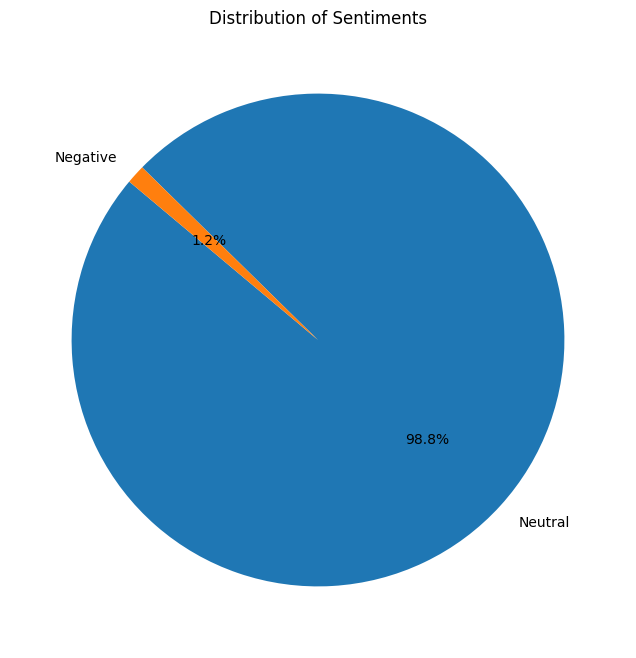

In [48]:
sentiment_counts = categorical_df['sentiments'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.show()

#### Label Encoding for 'sentiments'

To prepare the 'sentiments' column for numerical analysis, we will apply label encoding. This will convert the categorical sentiment labels into numerical values.

The categories will be mapped as follows:

- 'Neutral' will be encoded as **0**
- 'Negative' will be encoded as **1**

In [49]:
customer_comments_df['sentiments'] = customer_comments_df['sentiments'].map({'Neutral': 0, 'Negative': 1})
display(customer_comments_df[['sentiments']].head())

sentiments
0           0
1           0
2           0
3           0
4           0

In [50]:
customer_comments_df.head()

Unnamed: 0  flight_number origin_station_code destination_station_code  \
0           0            950                 LHX                      SFX   
1           1            950                 LHX                      SFX   
2           2           1876                 FLX                      EWX   
3           3           5469                 SFX                      SEX   
4           4            281                 DEX                      ANX   

  scheduled_departure_date  arrival_delay_group  departure_delay_group  \
0               2022-09-01                    0                      1   
1               2022-09-01                    0                      1   
2               2022-09-01                    0                      0   
3               2022-09-01                    0                      0   
4               2022-09-01                    0                      0   

                                       verbatim_text  seat_factor_band  \
0  There was no salad dressing. The staff informe...                 0   
1                                      Not a choice.                 0   
2                    More variety and bigger snacks.                 3   
3  Serving pretzels and cookies in first class wa...                 3   
4  More inflight selections to purchase for full ...                 0   

  loyalty_program_level fleet_type_description  fleet_usage  response_group  \
0             non-elite               B777-200            1               1   
1                   NaN               B777-200            1               0   
2             non-elite               A320-200            1               1   
3          premier gold                ERJ-175            0               1   
4             non-elite              B737-MAX8            1               1   

   sentiments                                   transformed_text  \
0           0  salad dress staff inform flight receiv salad d...   
1           0                                              choic   
2           0                               varieti bigger snack   
3           0  serv pretzel cooki first class extrem disappoi...   
4           0                  inflight select purchas full meal   

   entity_Atlantic  entity_Domestic  entity_Latin  entity_Pacific  
0             True            False         False           False  
1             True            False         False           False  
2            False             True         False           False  
3            False             True         False           False  
4            False             True         False           False

### Parsing 'fleet_type_description' using Regular Expressions

### How to Implement: A Step-by-Step Guide

The 'fleet_type_description' column contains valuable information about the aircraft type, but it is currently in a single string format (e.g., 'B737-800', 'A320-200'). To make this information more useful for analysis and modeling, we will parse these codes into more granular features.

### ⚙️ Step 1: Parse the Aircraft Codes (Feature Engineering)

Your goal here is to split a single string like 'B737-800' into meaningful parts. The best tool for this job is Regular Expressions (Regex), which are used for pattern matching in text.

Let's analyze the pattern in your data: B737-900, A320-200, ERJ-175, B737-MAX9.
A common pattern is a manufacturer code (like 'B' or 'A'), followed by a series of numbers representing the aircraft family, and sometimes an optional model identifier (like '-800', '-MAX9').

We can write a function to apply this logic. This function will:

*   Use a regex to capture the parts of the aircraft code.
*   Use a mapping to convert manufacturer codes (like 'B') to full names ('Boeing').
*   Handle cases where a part might be missing (e.g., some codes might not have a specific sub-model).

This approach is considered best practice for parsing structured strings like these aircraft codes because:

*   **Flexibility:** Regex allows us to define precise patterns to extract the desired information, even with variations in the format.
*   **Efficiency:** Regex engines are highly optimized for pattern matching in text.
*   **Scalability:** Once the regex pattern is defined, it can be applied consistently to all rows in the column.
*   **Maintainability:** Using a dedicated function for parsing makes the code cleaner and easier to understand and modify if the data format changes in the future.

In [51]:
print("Value Counts for fleet_type_description:")
display(customer_comments_df['fleet_type_description'].value_counts())

Value Counts for fleet_type_description:


fleet_type_description
B737-900     1451
B737-800     1133
B777-200      882
ERJ-175       713
A320-200      640
A319-100      620
B787-9        490
B777-300      457
B737-MAX9     430
B767-300      386
CRJ-200       315
B737-700      282
B757-200      259
B787-10       257
B787-8        220
B767-400      186
B737-MAX8     181
ERJ-145       135
ERJ-170       126
B757-300      111
CRJ-550        89
CRJ-700        60
Name: count, dtype: int64

In [52]:
import re

def parse_fleet_type(description):
    # Updated regex to capture 1 to 3 uppercase letters for manufacturer, followed by digits for family,
    # and an optional part starting with '-' or containing 'MAX' or other identifiers.
    match = re.match(r'([A-Z]{1,3})(\d+)(-?\w+)?', description)
    if match:
        manufacturer_code, family, model = match.groups()

        # Map manufacturer code to full name
        manufacturer_map = {
            'B': 'Boeing',
            'A': 'Airbus',
            'ERJ': 'Embraer',
            'CRJ': 'Bombardier'
        }
        manufacturer = manufacturer_map.get(manufacturer_code, manufacturer_map.get(manufacturer_code[0], manufacturer_code))


        if model:
            model = model.lstrip('-')
        else:
            model = None

        return manufacturer, family, model
    else:
        match_alt = re.match(r'([A-Z]{1,3})-?(\w+)?', description)
        if match_alt:
            manufacturer_code, model = match_alt.groups()
            manufacturer_map = {
                'B': 'Boeing',
                'A': 'Airbus',
                'ERJ': 'Embraer',
                'CRJ': 'Bombardier'
            }
            manufacturer = manufacturer_map.get(manufacturer_code, manufacturer_map.get(manufacturer_code[0], manufacturer_code))

            family = model
            model = None

            return manufacturer, family, model
        else:
             return None, None, None


customer_comments_df[['manufacturer', 'fleet_family', 'fleet_model']] = customer_comments_df['fleet_type_description'].apply(lambda x: pd.Series(parse_fleet_type(x)))

display(customer_comments_df[['fleet_type_description', 'manufacturer', 'fleet_family', 'fleet_model']].head())

fleet_type_description manufacturer fleet_family fleet_model
0               B777-200       Boeing          777         200
1               B777-200       Boeing          777         200
2               A320-200       Airbus          320         200
3                ERJ-175      Embraer          175        None
4              B737-MAX8       Boeing          737        MAX8

In [53]:
col = 'manufacturer'
print(f"\nColumn: {col}")
print("Value Counts:")
display(customer_comments_df[col].value_counts())
print(f"Number of unique values: {customer_comments_df[col].nunique()}")


Column: manufacturer
Value Counts:


manufacturer
Boeing        6725
Airbus        1260
Embraer        974
Bombardier     464
Name: count, dtype: int64

Number of unique values: 4


In [54]:
col = 'fleet_family'
print(f"\nColumn: {col}")
print("Value Counts:")
display(customer_comments_df[col].value_counts())
print(f"Number of unique values: {customer_comments_df[col].nunique()}")


Column: fleet_family
Value Counts:


fleet_family
737    3477
777    1339
787     967
175     713
320     640
319     620
767     572
757     370
200     315
145     135
170     126
550      89
700      60
Name: count, dtype: int64

Number of unique values: 13


In [55]:
col = 'fleet_model'
print(f"\nColumn: {col}")
print("Value Counts:")
display(customer_comments_df[col].value_counts())
print(f"Number of unique values: {customer_comments_df[col].nunique()}")


Column: fleet_model
Value Counts:


fleet_model
200     1781
900     1451
800     1133
300      954
100      620
9        490
MAX9     430
700      282
10       257
8        220
400      186
MAX8     181
Name: count, dtype: int64

Number of unique values: 12


---

## 2. Passenger Booking Data

### ✈️ Passenger Booking Dataset Overview

This dataset contains detailed information about passenger flight bookings and preferences. It is designed to help analyze booking patterns, customer behavior, and key factors influencing booking completion and flight choices.

---

### 📊 Dataset Summary

- **Total Records:** 50,002  
- **Total Columns:** 14  
- **File Size:** ~5.3 MB  
- **Data Types:**  
  - Integer: 8 columns  
  - Float: 1 column  
  - Object (String): 5 columns  

---

### 🧱 Column Descriptions

| **Column Name** | **Description** | **Data Type** | **Example Value** |
|------------------|-----------------|----------------|-------------------|
| `num_passengers` | Number of passengers included in the booking. | `int64` | `2` |
| `sales_channel` | Source or platform through which the booking was made (e.g., Internet, Mobile). | `object` | `Internet` |
| `trip_type` | Indicates whether the trip is a one-way or round trip. | `object` | `RoundTrip` |
| `purchase_lead` | Number of days between the booking date and the travel date. | `int64` | `21` |
| `length_of_stay` | Duration (in days) between arrival and departure. | `int64` | `12` |
| `flight_hour` | Hour of the day when the flight departs (0–23). | `int64` | `6` |
| `flight_day` | Day of the week on which the flight is scheduled. | `object` | `Tue` |
| `route` | Flight route, typically represented by origin and destination airport codes. | `object` | `AKLHGH` |
| `booking_origin` | Country or region from where the booking was made. | `object` | `New Zealand` |
| `wants_extra_baggage` | Whether the passenger requested extra baggage (1 = Yes, 0 = No). | `int64` | `1` |
| `wants_preferred_seat` | Whether the passenger requested a preferred seat (1 = Yes, 0 = No). | `int64` | `0` |
| `wants_in_flight_meals` | Whether the passenger requested in-flight meals (1 = Yes, 0 = No). | `int64` | `1` |
| `flight_duration` | Duration of the flight in hours. | `float64` | `5.52` |
| `booking_complete` | Indicates if the booking was completed (1 = Yes, 0 = No). | `int64` | `1` |

---

### 📈 Insights & Usage

- This dataset can be used for **predictive modeling**, such as forecasting booking completion likelihood or understanding **customer preferences**.  
- It supports **data visualization** of flight trends, sales channel performance, and **travel behavior patterns**.  
- Ideal for **machine learning** tasks like:
  - Booking completion prediction  
  - Customer segmentation  
  - Trip planning optimization  

---

### 🧹 Notes for Data Cleaning

- Check for **categorical encoding** (e.g., `sales_channel`, `trip_type`, `booking_origin`).  
- Normalize binary columns (`wants_extra_baggage`, `booking_complete`) to ensure consistent types.  
- Standardize time-related features (`flight_hour`, `flight_day`) for temporal analysis.  

---

### 💡 Summary

This dataset provides a comprehensive view of the flight booking process, customer choices, and travel habits. It serves as an excellent foundation for **data analysis, feature engineering, and model development** in the airline and travel industries.


#### Loading the dataset into a dataframe

In [56]:
df = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv')

display(df.head())

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               1      Internet  RoundTrip             21              12   
1               2      Internet  RoundTrip            262              19   
2               1      Internet  RoundTrip            112              20   
3               2      Internet  RoundTrip            243              22   
4               1      Internet  RoundTrip             96              31   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            6        Tue  AKLHGH      Australia                    0   
1            7        Sat  AKLDEL    New Zealand                    1   
2            3        Sat  AKLDEL    New Zealand                    0   
3           17        Wed  AKLDEL          India                    1   
4            4        Sat  AKLDEL    New Zealand                    0   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             7.21   
1                     0                      0             5.52   
2                     0                      0             5.52   
3                     1                      0             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0

#### Data exploration

In [57]:
num_rows = df.shape[0]

print(f"The number of rows in the dataset is: {num_rows}")

The number of rows in the dataset is: 50002


In [58]:
null_counts = df.isnull().sum()

print("Number of null values per column:")
print(null_counts)

Number of null values per column:
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [59]:
duplicate_count = df.duplicated().sum()
print(f'There are {duplicate_count} duplicate rows in the dataset.')

There are 719 duplicate rows in the dataset.


In [60]:
df[df.duplicated()]

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
198                 5      Internet  RoundTrip            206              17   
318                 5      Internet  RoundTrip            206              17   
386                 5      Internet  RoundTrip            206              17   
458                 1      Internet  RoundTrip             30              85   
515                 3      Internet  RoundTrip            109              20   
...               ...           ...        ...            ...             ...   
49854               2      Internet  RoundTrip            204               6   
49904               1        Mobile  RoundTrip            106               6   
49936               1      Internet  RoundTrip              2               6   
49946               1      Internet  RoundTrip              2               6   
49963               1      Internet  RoundTrip             30               6   

       flight_hour flight_day   route booking_origin  wants_extra_baggage  \
198             13        Sun  AKLKUL       Malaysia                    1   
318             13        Sun  AKLKUL       Malaysia                    1   
386             13        Sun  AKLKUL       Malaysia                    1   
458             15        Fri  AKLKUL       Malaysia                    1   
515              4        Tue  AKLKUL      Singapore                    1   
...            ...        ...     ...            ...                  ...   
49854           14        Tue  PENTPE       Malaysia                    1   
49904           11        Fri  PENTPE         Taiwan                    1   
49936            3        Thu  PENTPE       Malaysia                    0   
49946            3        Thu  PENTPE       Malaysia                    0   
49963            7        Thu  PENTPE         Taiwan                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
198                       0                      0             8.83   
318                       0                      0             8.83   
386                       0                      0             8.83   
458                       0                      0             8.83   
515                       0                      1             8.83   
...                     ...                    ...              ...   
49854                     0                      0             4.67   
49904                     0                      0             4.67   
49936                     0                      1             4.67   
49946                     0                      1             4.67   
49963                     0                      0             4.67   

       booking_complete  
198                   0  
318                   0  
386                   0  
458                   1  
515                   0  
...                 ...  
49854                 0  
49904                 0  
49936                 0  
49946                 0  
49963                 0  

[719 rows x 14 columns]

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
duplicate_count = df.duplicated().sum()
print(f'There are {duplicate_count} duplicate rows in the dataset.')

There are 0 duplicate rows in the dataset.


In [63]:
num_rows = df.shape[0]

print(f"The number of rows in the dataset is: {num_rows}")

The number of rows in the dataset is: 49283


Value counts for 'sales_channel':
sales_channel
Internet    43918
Mobile       5365
Name: count, dtype: int64




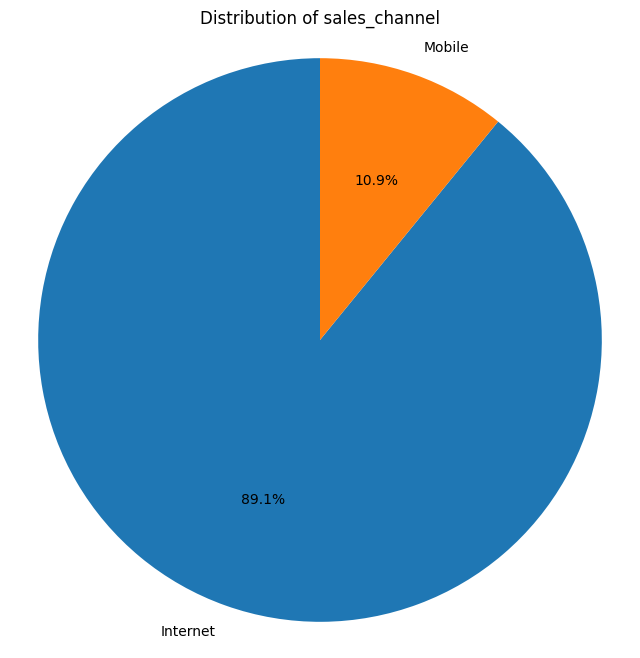

In [64]:
sales_channel_counts = df['sales_channel'].value_counts()

total = sales_channel_counts.sum()
threshold = total * 0.05
sales_channel_counts_filtered = sales_channel_counts[sales_channel_counts >= threshold]
others_count = sales_channel_counts[sales_channel_counts < threshold].sum()

if others_count > 0:
    sales_channel_counts_filtered['Others'] = others_count

print("Value counts for 'sales_channel':")
print(sales_channel_counts)
print("\n")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sales_channel_counts_filtered, labels=sales_channel_counts_filtered.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Distribution of sales_channel')
plt.show()

### Categorical Columns

### Distribution of sales_channel

This bar chart shows the distribution of bookings across different sales channels.

Value counts for 'sales_channel':
sales_channel
Internet    43918
Mobile       5365
Name: count, dtype: int64




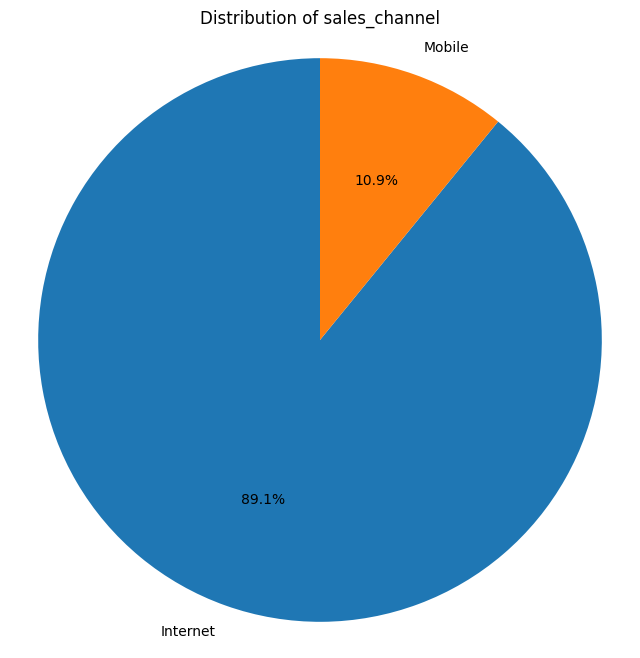

In [65]:
sales_channel_counts = df['sales_channel'].value_counts()

total = sales_channel_counts.sum()
threshold = total * 0.05
sales_channel_counts_filtered = sales_channel_counts[sales_channel_counts >= threshold]
others_count = sales_channel_counts[sales_channel_counts < threshold].sum()

if others_count > 0:
    sales_channel_counts_filtered['Others'] = others_count

print("Value counts for 'sales_channel':")
print(sales_channel_counts)
print("\n")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sales_channel_counts_filtered, labels=sales_channel_counts_filtered.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Distribution of sales_channel')
plt.show()

### Distribution of trip_type

This pie chart visualizes the distribution of different trip types (e.g., RoundTrip, OneWay).

Value counts for 'trip_type':
trip_type
RoundTrip     48780
OneWay          386
CircleTrip      117
Name: count, dtype: int64




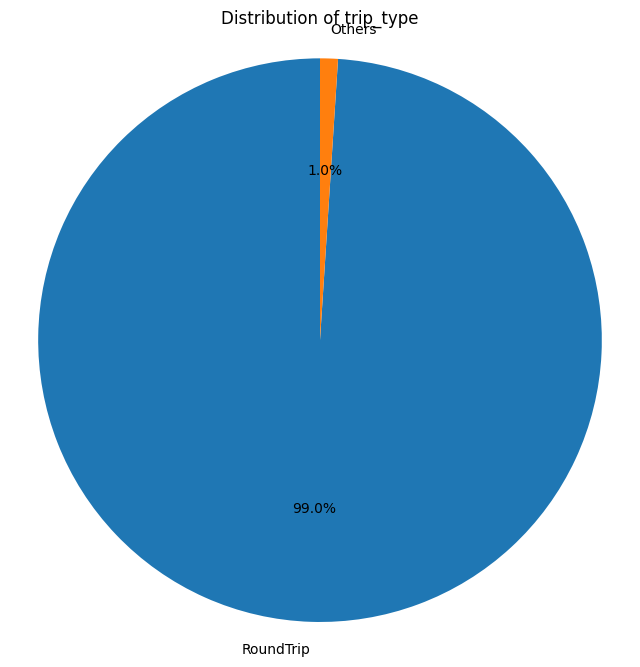

In [66]:
trip_type_counts = df['trip_type'].value_counts()

total = trip_type_counts.sum()
threshold = total * 0.05
trip_type_counts_filtered = trip_type_counts[trip_type_counts >= threshold]
others_count = trip_type_counts[trip_type_counts < threshold].sum()

if others_count > 0:
    trip_type_counts_filtered['Others'] = others_count

print("Value counts for 'trip_type':")
print(trip_type_counts)
print("\n")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(trip_type_counts_filtered, labels=trip_type_counts_filtered.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Distribution of trip_type')
plt.show()

### Distribution of flight_day

This pie chart shows the distribution of bookings across different days of the week.

Value counts for 'flight_day':
flight_day
Mon    7988
Wed    7563
Tue    7559
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: count, dtype: int64




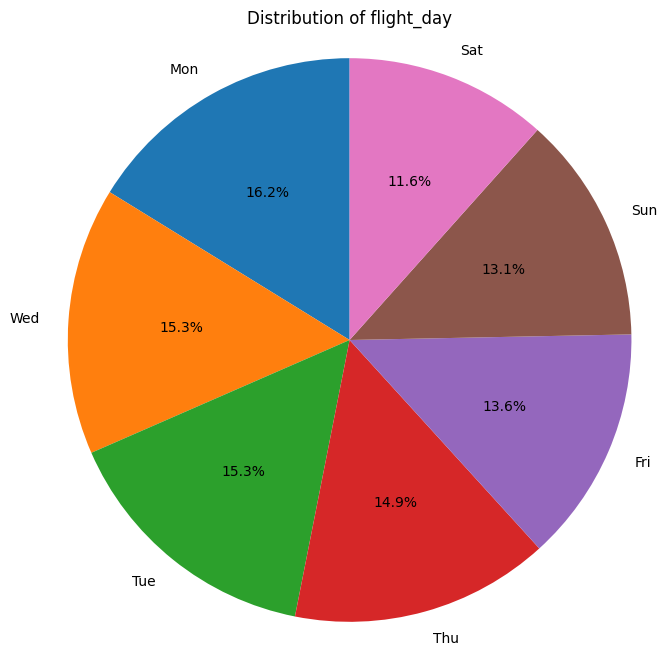

In [67]:
flight_day_counts = df['flight_day'].value_counts()

total = flight_day_counts.sum()
threshold = total * 0.05
flight_day_counts_filtered = flight_day_counts[flight_day_counts >= threshold]
others_count = flight_day_counts[flight_day_counts < threshold].sum()

if others_count > 0:
    flight_day_counts_filtered['Others'] = others_count

print("Value counts for 'flight_day':")
print(flight_day_counts)
print("\n")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(flight_day_counts_filtered, labels=flight_day_counts_filtered.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Distribution of flight_day')
plt.show()

### Distribution of route

This pie chart represents the distribution of bookings across different flight routes.

Value counts for 'route':
route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
BBIPER       1
DACPEK       1
BDOWUH       1
KIXLBU       1
PEKSGN       1
Name: count, Length: 799, dtype: int64




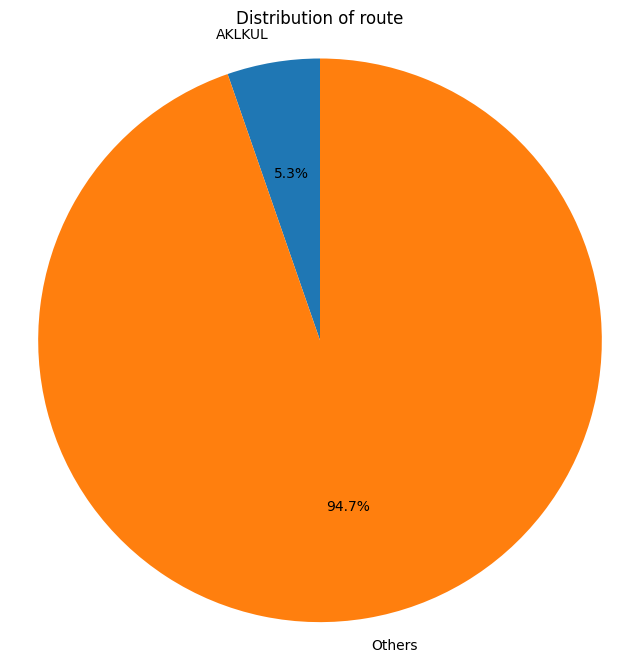

In [68]:
route_counts = df['route'].value_counts()

total = route_counts.sum()
threshold = total * 0.05
route_counts_filtered = route_counts[route_counts >= threshold]
others_count = route_counts[route_counts < threshold].sum()

if others_count > 0:
    route_counts_filtered['Others'] = others_count

print("Value counts for 'route':")
print(route_counts)
print("\n")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(route_counts_filtered, labels=route_counts_filtered.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Distribution of route')
plt.show()

### Distribution of booking_origin

This pie chart illustrates the distribution of bookings based on the country or region of origin.

Value counts for 'booking_origin':
booking_origin
Australia      17692
Malaysia        7055
South Korea     4502
Japan           3819
China           3284
               ...  
Estonia            1
Afghanistan        1
Czechia            1
Malta              1
Vanuatu            1
Name: count, Length: 104, dtype: int64




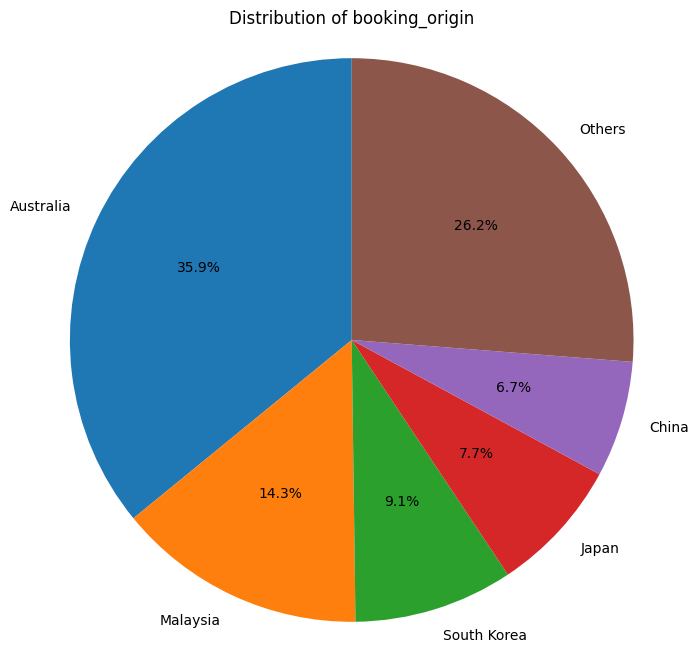

In [69]:
booking_origin_counts = df['booking_origin'].value_counts()

total = booking_origin_counts.sum()
threshold = total * 0.05
booking_origin_counts_filtered = booking_origin_counts[booking_origin_counts >= threshold]
others_count = booking_origin_counts[booking_origin_counts < threshold].sum()

if others_count > 0:
    booking_origin_counts_filtered['Others'] = others_count

print("Value counts for 'booking_origin':")
print(booking_origin_counts)
print("\n")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(booking_origin_counts_filtered, labels=booking_origin_counts_filtered.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Distribution of booking_origin')
plt.show()

### Data preprocessing

### Categorical columns

### One-Hot Encoding for 'trip_type' Column

One-hot encoding is a technique used to convert categorical variables into a numerical format that can be easily used by machine learning algorithms. In this case, we will apply one-hot encoding to the `trip_type` column.

The `trip_type` column has three unique values: 'RoundTrip', 'OneWay', and 'CircleTrip'. One-hot encoding will create new binary columns for each unique value. For example, if a row has 'RoundTrip' as the `trip_type`, the 'RoundTrip' column will have a value of 1, and the 'OneWay' and 'CircleTrip' columns will have a value of 0.

This process allows the model to interpret the categorical data without assuming any ordinal relationship between the categories.

In [70]:
df = pd.get_dummies(df, columns=['trip_type'], prefix='trip_type')

display(df.head())

num_passengers sales_channel  purchase_lead  length_of_stay  flight_hour  \
0               1      Internet             21              12            6   
1               2      Internet            262              19            7   
2               1      Internet            112              20            3   
3               2      Internet            243              22           17   
4               1      Internet             96              31            4   

  flight_day   route booking_origin  wants_extra_baggage  \
0        Tue  AKLHGH      Australia                    0   
1        Sat  AKLDEL    New Zealand                    1   
2        Sat  AKLDEL    New Zealand                    0   
3        Wed  AKLDEL          India                    1   
4        Sat  AKLDEL    New Zealand                    0   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             7.21   
1                     0                      0             5.52   
2                     0                      0             5.52   
3                     1                      0             5.52   
4                     0                      1             5.52   

   booking_complete  trip_type_CircleTrip  trip_type_OneWay  \
0                 1                 False             False   
1                 0                 False             False   
2                 0                 False             False   
3                 0                 False             False   
4                 0                 False             False   

   trip_type_RoundTrip  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True

### Label Encoding for 'sales_channel' Column

Label encoding is a technique used to convert categorical labels into numerical form. In this case, since the `sales_channel` column has only two unique values ('Internet' and 'Mobile'), we can use label encoding to convert them into 0 and 1. This is suitable for binary categorical variables.

We will use the `LabelEncoder` from the `sklearn.preprocessing` library to perform this encoding.

In [71]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['sales_channel'] = label_encoder.fit_transform(df['sales_channel'])

display(df.head())

num_passengers  sales_channel  purchase_lead  length_of_stay  flight_hour  \
0               1              0             21              12            6   
1               2              0            262              19            7   
2               1              0            112              20            3   
3               2              0            243              22           17   
4               1              0             96              31            4   

  flight_day   route booking_origin  wants_extra_baggage  \
0        Tue  AKLHGH      Australia                    0   
1        Sat  AKLDEL    New Zealand                    1   
2        Sat  AKLDEL    New Zealand                    0   
3        Wed  AKLDEL          India                    1   
4        Sat  AKLDEL    New Zealand                    0   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             7.21   
1                     0                      0             5.52   
2                     0                      0             5.52   
3                     1                      0             5.52   
4                     0                      1             5.52   

   booking_complete  trip_type_CircleTrip  trip_type_OneWay  \
0                 1                 False             False   
1                 0                 False             False   
2                 0                 False             False   
3                 0                 False             False   
4                 0                 False             False   

   trip_type_RoundTrip  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True

### Cyclic Encoding for 'flight_day'

The 'flight_day' column represents the day of the week, which is a cyclical feature (e.g., Monday follows Sunday). Standard numerical encoding might imply an incorrect linear relationship between the days. Cyclic encoding addresses this by transforming the day of the week into two new features using sine and cosine functions.

We can represent each day of the week as a point on a circle. The sine and cosine of the angle corresponding to each day will provide two values that capture the cyclical nature. For example, Monday and Sunday will be closer to each other in the encoded space than Monday and Wednesday.

To implement this, we first need to convert the 'flight\_day' into a numerical representation (0-6 for Monday to Sunday, for example). Then, we apply the sine and cosine transformations:

- Sine component: `sin(2 * pi * day_of_week / 7)`
- Cosine component: `cos(2 * pi * day_of_week / 7)`

These two new features, often named 'flight\_day\_sin' and 'flight\_day\_cos', represent the cyclical nature of the day of the week and can be used in machine learning models.

In [72]:
day_mapping = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}
df['flight_day_numeric'] = df['flight_day'].map(day_mapping)

df['flight_day_sin'] = np.sin(2 * np.pi * df['flight_day_numeric'] / 7)
df['flight_day_cos'] = np.cos(2 * np.pi * df['flight_day_numeric'] / 7)


display(df[['flight_day', 'flight_day_numeric', 'flight_day_sin', 'flight_day_cos']].head())

flight_day  flight_day_numeric  flight_day_sin  flight_day_cos
0        Tue                   1        0.781831        0.623490
1        Sat                   5       -0.974928       -0.222521
2        Sat                   5       -0.974928       -0.222521
3        Wed                   2        0.974928       -0.222521
4        Sat                   5       -0.974928       -0.222521

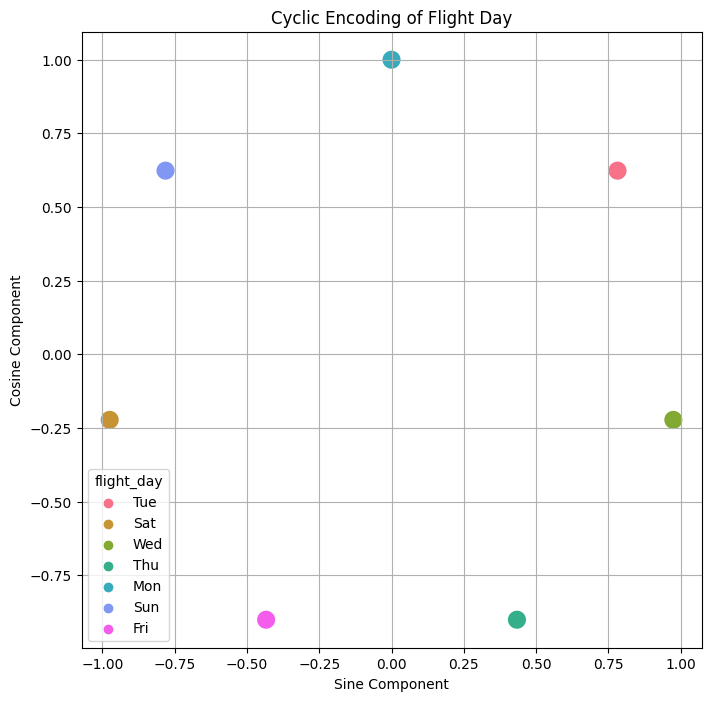

In [73]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='flight_day_sin', y='flight_day_cos', data=df, hue='flight_day', palette='husl', s=200) # Changed palette to 'husl'
plt.title('Cyclic Encoding of Flight Day')
plt.xlabel('Sine Component')
plt.ylabel('Cosine Component')
plt.grid(True)
plt.show()

In [74]:
df = df.drop('flight_day', axis=1)

display(df.head())

num_passengers  sales_channel  purchase_lead  length_of_stay  flight_hour  \
0               1              0             21              12            6   
1               2              0            262              19            7   
2               1              0            112              20            3   
3               2              0            243              22           17   
4               1              0             96              31            4   

    route booking_origin  wants_extra_baggage  wants_preferred_seat  \
0  AKLHGH      Australia                    0                     0   
1  AKLDEL    New Zealand                    1                     0   
2  AKLDEL    New Zealand                    0                     0   
3  AKLDEL          India                    1                     1   
4  AKLDEL    New Zealand                    0                     0   

   wants_in_flight_meals  flight_duration  booking_complete  \
0                      0             7.21                 1   
1                      0             5.52                 0   
2                      0             5.52                 0   
3                      0             5.52                 0   
4                      1             5.52                 0   

   trip_type_CircleTrip  trip_type_OneWay  trip_type_RoundTrip  \
0                 False             False                 True   
1                 False             False                 True   
2                 False             False                 True   
3                 False             False                 True   
4                 False             False                 True   

   flight_day_numeric  flight_day_sin  flight_day_cos  
0                   1        0.781831        0.623490  
1                   5       -0.974928       -0.222521  
2                   5       -0.974928       -0.222521  
3                   2        0.974928       -0.222521  
4                   5       -0.974928       -0.222521

## Distribution of Bookings Across Flight Hours

This bar chart illustrates the distribution of flight bookings throughout the 24 hours of the day. It shows how many bookings were made for flights departing at each hour, providing insights into the peak and off-peak flight times.

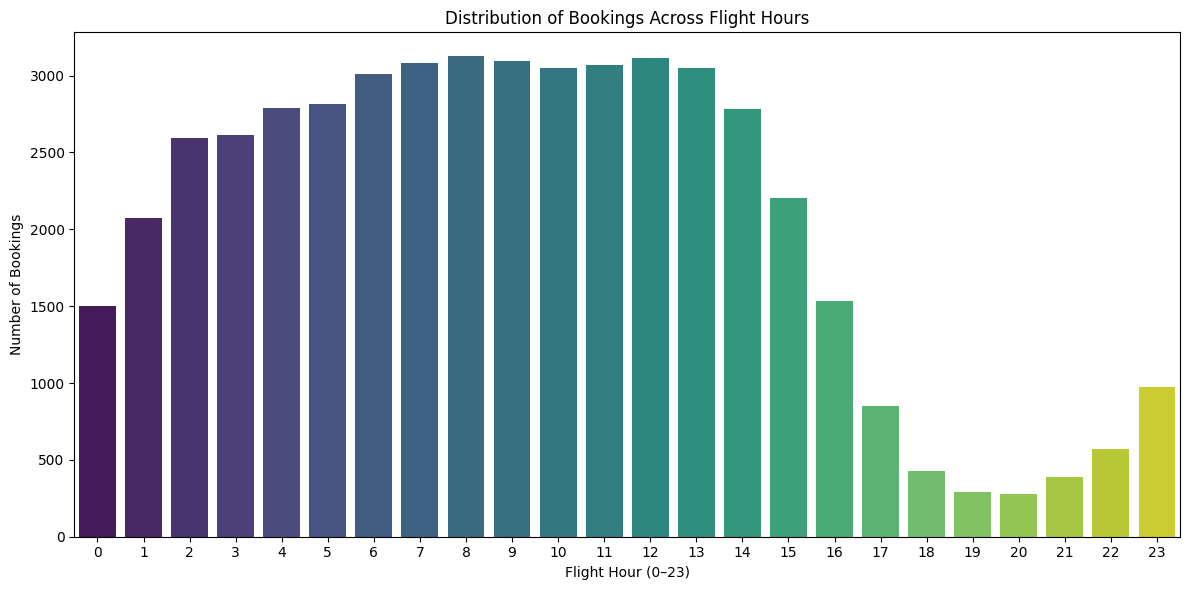

In [75]:
flight_hour_counts = df['flight_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=flight_hour_counts.index,
    y=flight_hour_counts.values,
    palette='viridis',
    width=0.8
)
plt.title('Distribution of Bookings Across Flight Hours')
plt.xlabel('Flight Hour (0–23)')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



## Top 10 Most Popular Flight Routes

This bar chart displays the top 10 most popular flight routes based on the booking data. It shows the frequency of bookings for each of these routes, providing insights into the most traveled flight paths in the dataset.

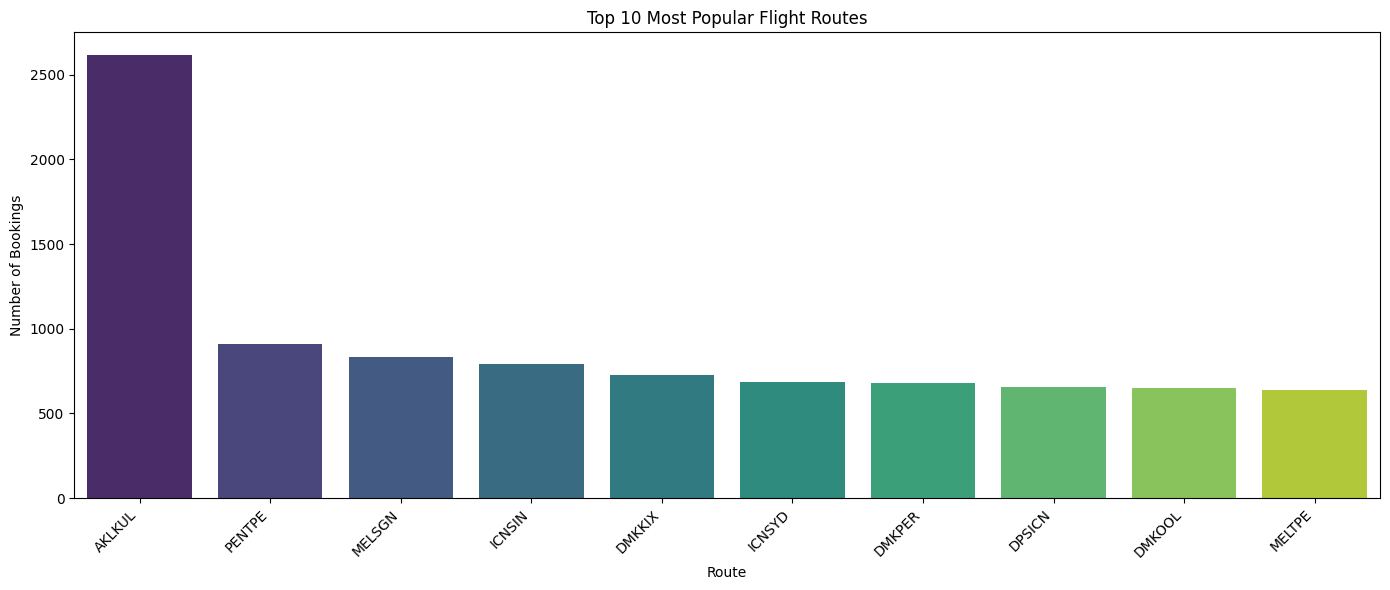

In [76]:
top_10_routes = df['route'].value_counts().nlargest(10)

plt.figure(figsize=(14, 6))
sns.barplot(
    x=top_10_routes.index,
    y=top_10_routes.values,
    palette='viridis',
    width=0.8
)

plt.title('Top 10 Most Popular Flight Routes')
plt.xlabel('Route')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 3. Inflight Satisfaction Survey

This notebook analyzes survey data from airline passengers regarding their inflight satisfaction. The analysis includes:
- Data exploration and quality assessment
- Data cleaning and preprocessing
- Feature engineering
- Data transformations for machine learning

### Setup & Configuration
### Import Required Libraries

In [77]:
!pip install category_encoders

In [78]:
import category_encoders as ce

### Configure Display Options

In [79]:
pd.set_option('display.max_columns', None)

### Load Dataset

In [80]:
survey_df = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Survey data_Inflight Satisfaction Score.csv')

### Initial Data Exploration
### Dataset Overview

In [81]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     47074 non-null  int64 
 1   origin_station_code               47074 non-null  object
 2   destination_station_code          47074 non-null  object
 3   record_locator                    47074 non-null  object
 4   scheduled_departure_date          47074 non-null  object
 5   question_text                     47074 non-null  object
 6   score                             47074 non-null  object
 7   satisfaction_type                 34963 non-null  object
 8   driver_sub_group1                 47074 non-null  object
 9   driver_sub_group2                 47074 non-null  object
 10  arrival_delay_minutes             47074 non-null  int64 
 11  arrival_delay_group               47074 non-null  object
 12  cabin_code_desc   

In [82]:
survey_df.describe()

flight_number  arrival_delay_minutes  number_of_legs  \
count   47074.000000           47074.000000    47074.000000   
mean     1529.855207              -1.702490        1.344118   
std      1456.712299              37.868177        0.502424   
min         2.000000            -104.000000        1.000000   
25%       477.000000             -19.000000        1.000000   
50%      1050.000000              -9.000000        1.000000   
75%      2060.000000               4.000000        2.000000   
max      6376.000000             907.000000        3.000000   

       actual_flown_miles  
count        47074.000000  
mean          2477.737732  
std           1865.646538  
min             45.000000  
25%            932.000000  
50%           1846.000000  
75%           3870.000000  
max           8440.000000

In [83]:
print(survey_df.shape)
survey_df.columns

(47074, 31)


Index(['flight_number', 'origin_station_code', 'destination_station_code',
       'record_locator', 'scheduled_departure_date', 'question_text', 'score',
       'satisfaction_type', 'driver_sub_group1', 'driver_sub_group2',
       'arrival_delay_minutes', 'arrival_delay_group', 'cabin_code_desc',
       'cabin_name', 'entity', 'number_of_legs', 'seat_factor_band',
       'loyalty_program_level', 'generation', 'fleet_type_description',
       'fleet_usage', 'equipment_type_code', 'ua_uax', 'actual_flown_miles',
       'haul_type', 'departure_gate', 'arrival_gate',
       'international_domestic_indicator', 'response_group', 'media_provider',
       'hub_spoke'],
      dtype='object')

In [84]:
survey_df.head(5)

flight_number origin_station_code destination_station_code record_locator  \
0           3802                 MKX                      ORX         CYXXJJ   
1           4645                 COX                      DEX         DRXXMH   
2           5236                 COX                      DEX         DEXXS1   
3           4686                 DEX                      COX         PXXXLH   
4            671                 DEX                      COX         KZXXH5   

  scheduled_departure_date                                      question_text  \
0                 9/1/2022  How satisfied were you with the food & beverag...   
1                 9/1/2022  How satisfied were you with the food & beverag...   
2                 9/1/2022  How satisfied were you with the food & beverag...   
3                 9/1/2022  How satisfied were you with the food & beverag...   
4                 9/1/2022  How satisfied were you with the food & beverag...   

  score satisfaction_type driver_sub_group1               driver_sub_group2  \
0     2      Dissatisfied   food & beverage  food and beverage satisfaction   
1     5         Satisfied   food & beverage  food and beverage satisfaction   
2     5         Satisfied   food & beverage  food and beverage satisfaction   
3     3      Dissatisfied   food & beverage  food and beverage satisfaction   
4     5         Satisfied   food & beverage  food and beverage satisfaction   

   arrival_delay_minutes arrival_delay_group cabin_code_desc cabin_name  \
0                    -24      Early & Ontime         Economy    Economy   
1                     10             Delayed        Business        NaN   
2                     -8      Early & Ontime        Business        NaN   
3                    -11      Early & Ontime         Economy    Economy   
4                     18             Delayed        Business        NaN   

     entity  number_of_legs seat_factor_band loyalty_program_level generation  \
0  Domestic               2              80+                   NaN      Gen X   
1  Domestic               2              90+      premier platinum     Boomer   
2  Domestic               2              90+      premier platinum      Gen X   
3  Domestic               3              90+             non-elite     Boomer   
4  Domestic               2              90+        premier silver     Boomer   

  fleet_type_description fleet_usage equipment_type_code ua_uax  \
0                CRJ-200     Express                 CRZ    UAX   
1                ERJ-175     Express                 E75    UAX   
2                ERJ-175     Express                 E75    UAX   
3                CRJ-200     Express                 CRJ    UAX   
4               A319-100    Mainline                 19F     UA   

   actual_flown_miles haul_type departure_gate arrival_gate  \
0                  67     Short            C12          F10   
1                  72     Short              5          B60   
2                  72     Short              7          A71   
3                  72     Short            B82            5   
4                  72     Short            B24            3   

  international_domestic_indicator response_group media_provider  \
0                         Domestic     non-member            NaN   
1                         Domestic         member           GOGO   
2                         Domestic         member           GOGO   
3                         Domestic         member            NaN   
4                         Domestic         member      PANASONIC   

         hub_spoke  
0  spoke departure  
1  spoke departure  
2  spoke departure  
3    hub departure  
4    hub departure

### Missing Values Analysis

In [85]:
print(survey_df.isnull().sum())

flight_number                           0
origin_station_code                     0
destination_station_code                0
record_locator                          0
scheduled_departure_date                0
question_text                           0
score                                   0
satisfaction_type                   12111
driver_sub_group1                       0
driver_sub_group2                       0
arrival_delay_minutes                   0
arrival_delay_group                     0
cabin_code_desc                         0
cabin_name                          19980
entity                                  3
number_of_legs                          0
seat_factor_band                        0
loyalty_program_level               11616
generation                              0
fleet_type_description                  0
fleet_usage                             0
equipment_type_code                     0
ua_uax                                  0
actual_flown_miles                

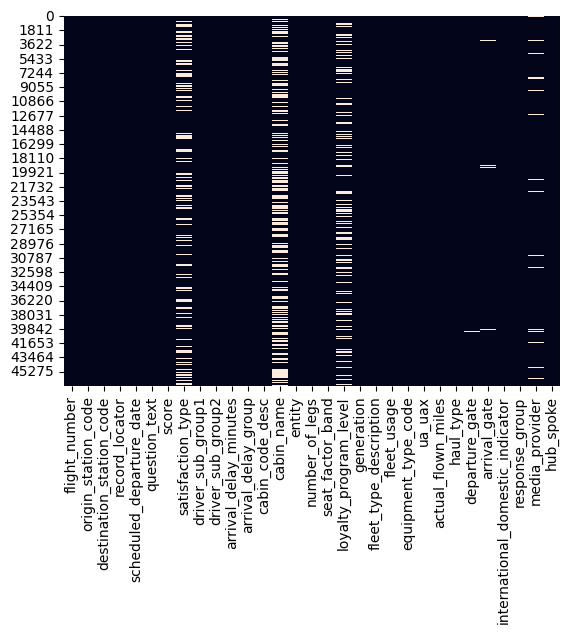

In [86]:
sns.heatmap(survey_df.isnull(), cbar=False); plt.show()

### Duplicate Records Analysis
The `record_locator` indicates a booking with a unique customer. Let's check for duplicates.

In [87]:
survey_df[survey_df['record_locator'] == 'JNXXVS']

flight_number origin_station_code destination_station_code  \
25996           1143                 SAX                      IAX   
25999           1143                 SAX                      IAX   
35333            372                 LAX                      DEX   
35336            372                 LAX                      DEX   
40237            404                 DEX                      LAX   
40242            404                 DEX                      LAX   

      record_locator scheduled_departure_date  \
25996         JNXXVS                9/17/2022   
25999         JNXXVS                9/17/2022   
35333         JNXXVS                9/23/2022   
35336         JNXXVS                9/23/2022   
40237         JNXXVS                9/26/2022   
40242         JNXXVS                9/26/2022   

                                           question_text            score  \
25996                          What item did you choose?  other (specify)   
25999  How satisfied were you with the food & beverag...                4   
35333  How satisfied were you with the food & beverag...                5   
35336                          What item did you choose?  other (specify)   
40237                          What item did you choose?   chicken entrée   
40242  How satisfied were you with the food & beverag...                4   

      satisfaction_type driver_sub_group1               driver_sub_group2  \
25996               NaN   food & beverage                            comp   
25999         Satisfied   food & beverage  food and beverage satisfaction   
35333         Satisfied   food & beverage  food and beverage satisfaction   
35336               NaN   food & beverage                            comp   
40237               NaN   food & beverage                            comp   
40242         Satisfied   food & beverage  food and beverage satisfaction   

       arrival_delay_minutes arrival_delay_group cabin_code_desc cabin_name  \
25996                    -15      Early & Ontime        Business        NaN   
25999                    -15      Early & Ontime        Business        NaN   
35333                    -24      Early & Ontime        Business        NaN   
35336                    -24      Early & Ontime        Business        NaN   
40237                    -18      Early & Ontime        Business        NaN   
40242                    -18      Early & Ontime        Business        NaN   

         entity  number_of_legs seat_factor_band loyalty_program_level  \
25996  Domestic               1              90+            premier 1k   
25999  Domestic               1              90+            premier 1k   
35333  Domestic               1              90+             non-elite   
35336  Domestic               1              90+             non-elite   
40237  Domestic               1              90+                   NaN   
40242  Domestic               1              90+                   NaN   

      generation fleet_type_description fleet_usage equipment_type_code  \
25996      Gen X               B737-900    Mainline                 37K   
25999      Gen X               B737-900    Mainline                 37K   
35333      Gen X               B777-200    Mainline                 77M   
35336      Gen X               B777-200    Mainline                 77M   
40237      Gen X               B757-300    Mainline                 75E   
40242      Gen X               B757-300    Mainline                 75E   

      ua_uax  actual_flown_miles haul_type departure_gate arrival_gate  \
25996     UA                1303    Medium             44           C4   
25999     UA                1303    Medium             44           C4   
35333     UA                 862    Medium             74          B36   
35336     UA                 862    Medium             74          B36   
40237     UA                 862    Medium            B37          71B   
40242     UA                 862    Medium            B3

In [88]:
survey_df['record_locator'].value_counts()

record_locator
N4XXT6    6
EDXXY1    6
AXXXR0    6
JXXXMS    6
E3XXER    6
         ..
ATXXKN    1
MEXXXS    1
DCXX61    1
NCXXWE    1
GJXX5H    1
Name: count, Length: 33095, dtype: int64

### Question Types
The dataset contains two types of questions: satisfaction ratings and food choice questions.

In [89]:
survey_df['question_text'].value_counts()

question_text
How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?    34963
What item did you choose?                                                                       12111
Name: count, dtype: int64

In [90]:
survey_df['driver_sub_group2'].value_counts()

driver_sub_group2
food and beverage satisfaction    34963
comp                              12111
Name: count, dtype: int64

###  Data Cleaning
###  Dropping Redundant Columns

#### Column `driver_sub_group1`
This column contains only one unique value and provides no information.

In [91]:
print(survey_df['driver_sub_group1'].unique())
print(survey_df['driver_sub_group1'].value_counts())

['food & beverage']
driver_sub_group1
food & beverage    47074
Name: count, dtype: int64


In [92]:
survey_df = survey_df.drop('driver_sub_group1', axis=1)

#### Columns `departure_gate` and `arrival_gate`
Gate information is not relevant for satisfaction analysis.

In [93]:
survey_df.drop(['departure_gate', 'arrival_gate'], axis=1, inplace=True)

### 3.2 Merging Cabin Information
`cabin_name` and `cabin_code_desc` contain similar information. We'll merge them into a single `cabin_type` column.

In [94]:
survey_df['cabin_code_desc'].value_counts()

cabin_code_desc
Economy                27094
Business               18018
United Premium Plus     1962
Name: count, dtype: int64

In [95]:
survey_df['cabin_name'].value_counts()

cabin_name
Economy         18438
Economy Plus     8656
Name: count, dtype: int64

In [96]:
survey_df['cabin_type'] = survey_df['cabin_name'].fillna(survey_df['cabin_code_desc'])
survey_df['cabin_type'].value_counts()

cabin_type
Economy                18438
Business               18018
Economy Plus            8656
United Premium Plus     1962
Name: count, dtype: int64

In [97]:
survey_df.drop(["cabin_name", "cabin_code_desc"], axis=1, inplace=True)

### 3.3 Handling Multiple Question Types
The dataset contains two question types:
1. Satisfaction ratings (question_text = satisfaction question)
2. Food choice ratings (question_text = "What item did you choose?")

We need to merge these into a single row per booking, extracting the food choice score as a separate feature.

#### Exploring Question Structure

In [98]:
survey_df[survey_df['record_locator'] == 'PZXXBM']

flight_number origin_station_code destination_station_code  \
25335            188                 JNX                      EWX   
25341            188                 JNX                      EWX   
25342            188                 JNX                      EWX   
25343            188                 JNX                      EWX   

      record_locator scheduled_departure_date  \
25335         PZXXBM                9/16/2022   
25341         PZXXBM                9/16/2022   
25342         PZXXBM                9/16/2022   
25343         PZXXBM                9/16/2022   

                                           question_text           score  \
25335  How satisfied were you with the food & beverag...               1   
25341  How satisfied were you with the food & beverag...               2   
25342                          What item did you choose?  chicken entrée   
25343                          What item did you choose?  chicken entrée   

      satisfaction_type               driver_sub_group2  \
25335      Dissatisfied  food and beverage satisfaction   
25341      Dissatisfied  food and beverage satisfaction   
25342               NaN                            comp   
25343               NaN                            comp   

       arrival_delay_minutes arrival_delay_group    entity  number_of_legs  \
25335                     -6      Early & Ontime  Atlantic               1   
25341                     -6      Early & Ontime  Atlantic               1   
25342                     -6      Early & Ontime  Atlantic               1   
25343                     -6      Early & Ontime  Atlantic               1   

      seat_factor_band loyalty_program_level generation  \
25335              80+                   NaN     Boomer   
25341              80+             non-elite     Boomer   
25342              80+                   NaN     Boomer   
25343              80+             non-elite     Boomer   

      fleet_type_description fleet_usage equipment_type_code ua_uax  \
25335                 B787-9    Mainline                 78P     UA   
25341                 B787-9    Mainline                 78P     UA   
25342                 B787-9    Mainline                 78P     UA   
25343                 B787-9    Mainline                 78P     UA   

       actual_flown_miles haul_type international_domestic_indicator  \
25335                7989      Long                    International   
25341                7989      Long                    International   
25342                7989      Long                    International   
25343                7989      Long                    International   

      response_group media_provider        hub_spoke    cabin_type  
25335     non-member      PANASONIC  spoke departure  Economy Plus  
25341         member      PANASONIC  spoke departure  Economy Plus  
25342     non-member      PANASONIC  spoke departure  Economy Plus  
25343         member      PANASONIC  spoke departure  Economy Plus

In [99]:
survey_df[survey_df.duplicated(subset=['record_locator', 'scheduled_departure_date', 'question_text'])].sort_values(by='record_locator')

flight_number origin_station_code destination_station_code  \
7206            1991                 LAX                      EWX   
31167           1042                 SAX                      ORX   
2173            1785                 STX                      EWX   
9118             910                 ORX                      AMX   
27384           2171                 ORX                      IAX   
...              ...                 ...                      ...   
18698            349                 OGX                      ORX   
45548            935                 EWX                      LHX   
40969            385                 DEX                      HNX   
25343            188                 JNX                      EWX   
25341            188                 JNX                      EWX   

      record_locator scheduled_departure_date  \
7206          A1XX5P                 9/5/2022   
31167         ABXX5M                9/20/2022   
2173          ADXX6H                 9/2/2022   
9118          AGXXS3                 9/6/2022   
27384         AKXXG4                9/18/2022   
...              ...                      ...   
18698         PVXX36                9/12/2022   
45548         PWXXC0                9/29/2022   
40969         PXXXRB                9/26/2022   
25343         PZXXBM                9/16/2022   
25341         PZXXBM                9/16/2022   

                                           question_text           score  \
7206   How satisfied were you with the food & beverag...               3   
31167  How satisfied were you with the food & beverag...               5   
2173   How satisfied were you with the food & beverag...               1   
9118   How satisfied were you with the food & beverag...               1   
27384  How satisfied were you with the food & beverag...               4   
...                                                  ...             ...   
18698  How satisfied were you with the food & beverag...               2   
45548  How satisfied were you with the food & beverag...               2   
40969  How satisfied were you with the food & beverag...               1   
25343                          What item did you choose?  chicken entrée   
25341  How satisfied were you with the food & beverag...               2   

      satisfaction_type               driver_sub_group2  \
7206       Dissatisfied  food and beverage satisfaction   
31167         Satisfied  food and beverage satisfaction   
2173       Dissatisfied  food and beverage satisfaction   
9118       Dissatisfied  food and beverage satisfaction   
27384         Satisfied  food and beverage satisfaction   
...                 ...                             ...   
18698      Dissatisfied  food and beverage satisfaction   
45548      Dissatisfied  food and beverage satisfaction   
40969      Dissatisfied  food and beverage satisfaction   
25343               NaN                            comp   
25341      Dissatisfied  food and beverage satisfaction   

       arrival_delay_minutes arrival_delay_group    entity  number_of_legs  \
7206                       9             Delayed  Domestic               1   
31167                    -11      Early & Ontime  Domestic               1   
2173                     -28      Early & Ontime     Latin               1   
9118                       9             Delayed  Atlantic               1   
27384                     -4      Early & Ontime  Domestic               1   
...                      ...                 ...       ...             ...   
18698                    -14      Early & Ontime  Domestic               1   
45548                     -1      Early & Ontime  Atlantic               1   
40969                    -29      Early & Ontime  Domestic               1   
25343                     -6      Early & Ontime  Atlantic               1   
25341                     -6      Early & Ontime  Atlantic               1   

      seat_factor_band loyalty

In [100]:
survey_df[survey_df['record_locator'] == 'J1XX1H']

flight_number origin_station_code destination_station_code  \
5911             939                 ORX                      LHX   
5915             939                 ORX                      LHX   
8862             418                 LAX                      OGX   
20009            707                 OGX                      LAX   
20010            707                 OGX                      LAX   

      record_locator scheduled_departure_date  \
5911          J1XX1H                 9/4/2022   
5915          J1XX1H                 9/4/2022   
8862          J1XX1H                 9/6/2022   
20009         J1XX1H                9/13/2022   
20010         J1XX1H                9/13/2022   

                                           question_text            score  \
5911   How satisfied were you with the food & beverag...                4   
5915                           What item did you choose?  other (specify)   
8862   How satisfied were you with the food & beverag...                2   
20009  How satisfied were you with the food & beverag...                4   
20010                          What item did you choose?   chicken entrée   

      satisfaction_type               driver_sub_group2  \
5911          Satisfied  food and beverage satisfaction   
5915                NaN                            comp   
8862       Dissatisfied  food and beverage satisfaction   
20009         Satisfied  food and beverage satisfaction   
20010               NaN                            comp   

       arrival_delay_minutes arrival_delay_group    entity  number_of_legs  \
5911                     -15      Early & Ontime  Atlantic               1   
5915                     -15      Early & Ontime  Atlantic               1   
8862                     -23      Early & Ontime  Domestic               1   
20009                    -35      Early & Ontime  Domestic               1   
20010                    -35      Early & Ontime  Domestic               1   

      seat_factor_band loyalty_program_level generation  \
5911               90+      premier platinum      Gen X   
5915               90+      premier platinum      Gen X   
8862               70+             non-elite     Boomer   
20009              80+             non-elite     Boomer   
20010              80+             non-elite     Boomer   

      fleet_type_description fleet_usage equipment_type_code ua_uax  \
5911                B767-300    Mainline                 76L     UA   
5915                B767-300    Mainline                 76L     UA   
8862               B737-MAX9    Mainline                 37X     UA   
20009              B737-MAX9    Mainline                 37X     UA   
20010              B737-MAX9    Mainline                 37X     UA   

       actual_flown_miles haul_type international_domestic_indicator  \
5911                 3953      Long                    International   
5915                 3953      Long                    International   
8862                 2486    Medium                         Domestic   
20009                2486    Medium                         Domestic   
20010                2486    Medium                         Domestic   

      response_group media_provider        hub_spoke cabin_type  
5911          member      PANASONIC    hub departure   Business  
5915          member      PANASONIC    hub departure   Business  
8862          member         VIASAT    hub departure   Business  
20009         member         VIASAT  spoke departure   Business  
20010         member         VIASAT  spoke departure   Business

#### Merging Food Choice Data
Extract the food choice score as `food_chosen` and merge with satisfaction records.

In [101]:
survey_df_food_merge = survey_df.copy()

# Define columns that identify identical groups
exclude_cols = ['score', 'question_text', 'satisfaction_type', 'driver_sub_group2']
group_cols = [c for c in survey_df_food_merge.columns if c not in exclude_cols]

# Extract the food choices ("comp" rows)
food_choices = (
    survey_df_food_merge[survey_df_food_merge['driver_sub_group2'] == 'comp']
    [group_cols + ['score']]
    .rename(columns={'score': 'food_chosen'})
)

# Merge back the food choices onto all rows in the same group
survey_df_food_merge = survey_df_food_merge.merge(food_choices, on=group_cols, how='left')
survey_df_food_merge.sample(5)

flight_number origin_station_code destination_station_code  \
36319            203                 ORX                      OGX   
35077           3533                 EWX                      ORX   
8886            2633                 EWX                      SFX   
3748            2427                 IAX                      BOX   
6734            2046                 TPX                      EWX   

      record_locator scheduled_departure_date  \
36319         H6XXS9                9/23/2022   
35077         ORXX1P                9/23/2022   
8886          JTXXMR                 9/6/2022   
3748          OKXXGE                 9/3/2022   
6734          AFXXX3                 9/5/2022   

                                           question_text            score  \
36319                          What item did you choose?  other (specify)   
35077  How satisfied were you with the food & beverag...                1   
8886                           What item did you choose?   chicken entrée   
3748   How satisfied were you with the food & beverag...                3   
6734   How satisfied were you with the food & beverag...                2   

      satisfaction_type               driver_sub_group2  \
36319               NaN                            comp   
35077      Dissatisfied  food and beverage satisfaction   
8886                NaN                            comp   
3748       Dissatisfied  food and beverage satisfaction   
6734       Dissatisfied  food and beverage satisfaction   

       arrival_delay_minutes arrival_delay_group    entity  number_of_legs  \
36319                    -26      Early & Ontime  Domestic               2   
35077                      5             Delayed  Domestic               1   
8886                     -35      Early & Ontime  Domestic               1   
3748                     -11      Early & Ontime  Domestic               1   
6734                      -1      Early & Ontime  Domestic               1   

      seat_factor_band loyalty_program_level  generation  \
36319              80+             non-elite      Boomer   
35077              90+                   NaN      Boomer   
8886               80+       global services      Boomer   
3748               90+             non-elite      Boomer   
6734               90+        premier silver  Millennial   

      fleet_type_description fleet_usage equipment_type_code ua_uax  \
36319                 B787-8    Mainline                 78H     UA   
35077                ERJ-175     Express                 E7F    UAX   
8886                B777-300    Mainline                 77X     UA   
3748                A320-200    Mainline                 20S     UA   
6734                A320-200    Mainline                 20S     UA   

       actual_flown_miles haul_type international_domestic_indicator  \
36319                4184      Long                         Domestic   
35077                 284     Short                         Domestic   
8886                 2565    Medium                         Domestic   
3748                 1597    Medium                         Domestic   
6734                  998    Medium                         Domestic   

      response_group media_provider        hub_spoke    cabin_type  \
36319         member      PANASONIC    hub departure       Economy   
35077     non-member           GOGO    hub departure  Economy Plus   
8886          member      PANASONIC    hub departure      Business   
3748          member      PANASONIC    hub departure       Economy   
6734          member      PANASONIC  spoke departure  Economy Plus   

           food_chosen  
36319  other (specify)  
35077              NaN  
8886    chicken entrée  
3748               NaN  
6734               NaN

In [102]:
survey_df_food_merge[survey_df_food_merge['record_locator'] == 'N9XXC7']

flight_number origin_station_code destination_station_code  \
394           1300                 SFX                      DEX   
399           1300                 SFX                      DEX   
403           1300                 SFX                      DEX   

    record_locator scheduled_departure_date  \
394         N9XXC7                 9/1/2022   
399         N9XXC7                 9/1/2022   
403         N9XXC7                 9/1/2022   

                                         question_text              score  \
394                          What item did you choose?  vegetarian entrée   
399  How satisfied were you with the food & beverag...                  2   
403  How satisfied were you with the food & beverag...                  1   

    satisfaction_type               driver_sub_group2  arrival_delay_minutes  \
394               NaN                            comp                     -9   
399      Dissatisfied  food and beverage satisfaction                     -9   
403      Dissatisfied  food and beverage satisfaction                     -9   

    arrival_delay_group    entity  number_of_legs seat_factor_band  \
394      Early & Ontime  Domestic               1              90+   
399      Early & Ontime  Domestic               1              90+   
403      Early & Ontime  Domestic               1              90+   

    loyalty_program_level generation fleet_type_description fleet_usage  \
394            premier 1k     Boomer               A320-200    Mainline   
399            premier 1k     Boomer               A320-200    Mainline   
403            premier 1k     Boomer               A320-200    Mainline   

    equipment_type_code ua_uax  actual_flown_miles haul_type  \
394                 20S     UA                 967    Medium   
399                 20S     UA                 967    Medium   
403                 20S     UA                 967    Medium   

    international_domestic_indicator response_group media_provider  \
394                         Domestic         member      PANASONIC   
399                         Domestic         member      PANASONIC   
403                         Domestic         member      PANASONIC   

         hub_spoke cabin_type        food_chosen  
394  hub departure   Business  vegetarian entrée  
399  hub departure   Business  vegetarian entrée  
403  hub departure   Business  vegetarian entrée

#### Remove Food Choice Rows
After extracting food choice information, remove those rows and keep only satisfaction records.

In [103]:
survey_df_food_merge = survey_df_food_merge[survey_df_food_merge['satisfaction_type'].notnull()]
survey_df_food_merge['food_chosen'].notnull().sum()
# 12146 not 12111 expected 25 duplicates

12146

#### Cleanup Question Columns
Drop `question_text` and `driver_sub_group2` as they're no longer needed.

In [104]:
survey_df_food_merge.drop(['question_text', 'driver_sub_group2'], axis=1, inplace=True)

#### Convert Score to Integer

In [105]:
survey_df_food_merge['score'] = survey_df_food_merge['score'].astype(int)

### 3.4 Remove Duplicate Column `ua_uax`
The `ua_uax` column is identical to `fleet_usage`, so we can safely drop it.

In [106]:
survey_df_food_merge['ua_uax'].value_counts()

ua_uax
UA     29892
UAX     5095
Name: count, dtype: int64

In [107]:
survey_df_food_merge['fleet_usage'].value_counts()

fleet_usage
Mainline    29892
Express      5095
Name: count, dtype: int64

In [108]:
((survey_df_food_merge['ua_uax'] == 'UA') & (survey_df_food_merge['fleet_usage'] == 'Mainline')).sum()

29892

In [109]:
survey_df_food_merge.drop(["ua_uax"], axis=1, inplace=True)

### 3.5 Remove Duplicate Column `international_domestic_indicator`
The `entity` column provides more specific information and includes the same data.

In [110]:
survey_df_food_merge['entity'].value_counts()

entity
Domestic    23863
Atlantic     7639
Latin        2547
Pacific       935
Name: count, dtype: int64

In [111]:
survey_df_food_merge['international_domestic_indicator'].value_counts()

international_domestic_indicator
Domestic         23863
International    11124
Name: count, dtype: int64

In [112]:
survey_df_food_merge.drop(["international_domestic_indicator"], axis=1, inplace=True)

### 3.6 Remove Rare Generation Categories
The `NBK` (unknown) and `Greatest` generation values have very few records and can be removed.

In [113]:
survey_df_food_merge['generation'].value_counts()

generation
Boomer        16386
Gen X         11088
Millennial     4981
Silent         1698
Gen Z           829
NBK               3
Greatest          2
Name: count, dtype: int64

In [114]:
survey_df_food_merge[survey_df_food_merge['generation'] == 'NBK']

flight_number origin_station_code destination_station_code  \
2390            2258                 SNX                      EWX   
22260           6043                 IAX                      LGX   
27884           1521                 MCX                      DEX   

      record_locator scheduled_departure_date  score satisfaction_type  \
2390          JXXX8R                 9/2/2022      1      Dissatisfied   
22260         IYXX0X                9/15/2022      3      Dissatisfied   
27884         GKXXEV                9/18/2022      4         Satisfied   

       arrival_delay_minutes arrival_delay_group    entity  number_of_legs  \
2390                       2             Delayed  Domestic               1   
22260                     25             Delayed  Domestic               2   
27884                    -17      Early & Ontime  Domestic               1   

      seat_factor_band loyalty_program_level generation  \
2390               90+                   NBK        NBK   
22260          0 to 70                   NBK        NBK   
27884              90+                   NBK        NBK   

      fleet_type_description fleet_usage equipment_type_code  \
2390                B737-700    Mainline                 73G   
22260                ERJ-175     Express                 E7A   
27884               B737-900    Mainline                 37K   

       actual_flown_miles haul_type response_group media_provider  \
2390                 2433    Medium            NBK         THALES   
22260                 229     Short            NBK           GOGO   
27884                1545    Medium            NBK         THALES   

             hub_spoke cabin_type food_chosen  
2390   spoke departure    Economy         NaN  
22260    hub departure    Economy         NaN  
27884  spoke departure    Economy         NaN

In [115]:
survey_df_food_merge[survey_df_food_merge['generation'] == 'Greatest']

flight_number origin_station_code destination_station_code  \
562             6081                 LGX                      IAX   
43883           1511                 IAX                      PHX   

      record_locator scheduled_departure_date  score satisfaction_type  \
562           FJXXYG                 9/1/2022      1      Dissatisfied   
43883         CTXXYT                9/28/2022      1      Dissatisfied   

       arrival_delay_minutes arrival_delay_group    entity  number_of_legs  \
562                      -25      Early & Ontime  Domestic               1   
43883                    -30      Early & Ontime  Domestic               2   

      seat_factor_band loyalty_program_level generation  \
562                80+      premier platinum   Greatest   
43883              90+        premier silver   Greatest   

      fleet_type_description fleet_usage equipment_type_code  \
562                  ERJ-175     Express                 E7A   
43883               B737-900    Mainline                 37K   

       actual_flown_miles haul_type response_group media_provider  \
562                  1416    Medium         member           GOGO   
43883                1956    Medium         member         THALES   

             hub_spoke cabin_type     food_chosen  
562    spoke departure   Business             NaN  
43883    hub departure   Business  chicken entrée

In [116]:
# Removing NBK
survey_df_food_merge = survey_df_food_merge[~survey_df_food_merge.isin(['NBK']).any(axis=1)]
survey_df_food_merge['generation'].value_counts()

generation
Boomer        16386
Gen X         11088
Millennial     4981
Silent         1698
Gen Z           829
Greatest          2
Name: count, dtype: int64

In [117]:
survey_df_food_merge = survey_df_food_merge[~survey_df_food_merge['generation'].isin(['Greatest'])]
survey_df_food_merge['generation'].value_counts()

generation
Boomer        16386
Gen X         11088
Millennial     4981
Silent         1698
Gen Z           829
Name: count, dtype: int64

### 3.7 Handling Missing Values

#### Fill Missing `entity` Values
Three records with destination airport 'PTX' are missing entity information. Based on the airport code, these are Latin America flights.

In [118]:
survey_df_food_merge[survey_df_food_merge['entity'].isnull()]

flight_number origin_station_code destination_station_code  \
39995           3020                 SJX                      PTX   
39996           3020                 SJX                      PTX   
39997           3020                 SJX                      PTX   

      record_locator scheduled_departure_date  score satisfaction_type  \
39995         A3XX7C                9/26/2022      1      Dissatisfied   
39996         AFXX8Y                9/26/2022      1      Dissatisfied   
39997         A5XX47                9/26/2022      1      Dissatisfied   

       arrival_delay_minutes arrival_delay_group entity  number_of_legs  \
39995                     15             Delayed    NaN               1   
39996                     15             Delayed    NaN               1   
39997                     15             Delayed    NaN               1   

      seat_factor_band loyalty_program_level  generation  \
39995              80+             non-elite      Boomer   
39996              80+          premier gold       Gen X   
39997              80+        premier silver  Millennial   

      fleet_type_description fleet_usage equipment_type_code  \
39995               B737-900    Mainline                 37K   
39996               B737-900    Mainline                 37K   
39997               B737-900    Mainline                 37K   

       actual_flown_miles haul_type response_group media_provider  \
39995                 335     Short         member         VIASAT   
39996                 335     Short         member         VIASAT   
39997                 335     Short         member         VIASAT   

             hub_spoke    cabin_type food_chosen  
39995  spoke departure       Economy         NaN  
39996  spoke departure  Economy Plus         NaN  
39997  spoke departure  Economy Plus         NaN

In [119]:
survey_df_food_merge['entity'] = survey_df_food_merge['entity'].fillna('Latin')

In [120]:
survey_df_food_merge['entity'].isnull().sum()

0

#### Fill Missing `loyalty_program_level`
Missing loyalty program levels appear only when `response_group` is 'non-member', which means they should be labeled as 'non-member'.

In [121]:
survey_df_food_merge['loyalty_program_level'].value_counts()

loyalty_program_level
non-elite           14716
premier silver       3379
premier 1k           2820
premier gold         2340
premier platinum     1776
global services       567
Name: count, dtype: int64

In [122]:
survey_df_food_merge['loyalty_program_level'].isnull().sum()

9384

In [123]:
survey_df_food_merge[survey_df_food_merge['loyalty_program_level'].isnull()]

flight_number origin_station_code destination_station_code  \
0               3802                 MKX                      ORX   
5               3947                 IAX                      CHX   
6               3609                 EWX                      PHX   
10               118                 SPX                      GUX   
11              4748                 GRX                      ORX   
...              ...                 ...                      ...   
47099            873                 TPX                      SFX   
47103             80                 EWX                      NRX   
47115           1123                 EWX                      CPX   
47120            189                 EWX                      JNX   
47123              2                 SFX                      SIX   

      record_locator scheduled_departure_date  score satisfaction_type  \
0             CYXXJJ                 9/1/2022      2      Dissatisfied   
5             HQXXL6                 9/1/2022      3      Dissatisfied   
6             DPXXGS                 9/1/2022      5         Satisfied   
10            IRXXTF                 9/1/2022      1      Dissatisfied   
11            B9XXXS                 9/1/2022      3      Dissatisfied   
...              ...                      ...    ...               ...   
47099         G6XXKR                9/30/2022      4         Satisfied   
47103         C2XXFB                9/30/2022      3      Dissatisfied   
47115         MZXXN4                9/30/2022      3      Dissatisfied   
47120         O0XXXP                9/30/2022      4         Satisfied   
47123         IPXXM3                9/30/2022      4         Satisfied   

       arrival_delay_minutes arrival_delay_group    entity  number_of_legs  \
0                        -24      Early & Ontime  Domestic               2   
5                          6             Delayed  Domestic               2   
6                          9             Delayed  Domestic               2   
10                       -19      Early & Ontime   Pacific               1   
11                       -11      Early & Ontime  Domestic               2   
...                      ...                 ...       ...             ...   
47099                    -33      Early & Ontime   Pacific               1   
47103                     -2      Early & Ontime   Pacific               2   
47115                     66             Delayed  Atlantic               2   
47120                     -3      Early & Ontime  Atlantic               2   
47123                    -16      Early & Ontime   Pacific               1   

      seat_factor_band loyalty_program_level  generation  \
0                  80+                   NaN       Gen X   
5                  80+                   NaN      Silent   
6                  70+                   NaN      Boomer   
10                 90+                   NaN       Gen Z   
11                 90+                   NaN      Boomer   
...                ...                   ...         ...   
47099              70+                   NaN      Boomer   
47103              80+                   NaN  Millennial   
47115              90+                   NaN       Gen X   
47120              90+                   NaN       Gen X   
47123              90+                   NaN      Boomer   

      fleet_type_description fleet_usage equipment_type_code  \
0                    CRJ-200     Express                 CRZ   
5                    CRJ-200     Express                 CRZ   
6                    ERJ-170     Express                 E7R   
10                  B737-800    Mainline                 73U   
11                   CRJ-200     Express                 CRJ   
...                      ...         ...                 ...   
47099               B777-300    Mainline                 77X   
47103                 B787-9    Mainline                 78P   
47115                 B787-9    Mainline               

In [124]:
survey_df_food_merge['loyalty_program_level'] = survey_df_food_merge['loyalty_program_level'].fillna('non-member')

#### Fill Missing `media_provider`
We'll fill missing media provider values with 'Unknown' later during encoding.

In [125]:
survey_df_food_merge['media_provider'] = survey_df_food_merge['media_provider'].fillna('Unknown')

### 3.8 Data Quality Check

In [126]:
survey_df_food_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34982 entries, 0 to 47125
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   flight_number             34982 non-null  int64 
 1   origin_station_code       34982 non-null  object
 2   destination_station_code  34982 non-null  object
 3   record_locator            34982 non-null  object
 4   scheduled_departure_date  34982 non-null  object
 5   score                     34982 non-null  int64 
 6   satisfaction_type         34982 non-null  object
 7   arrival_delay_minutes     34982 non-null  int64 
 8   arrival_delay_group       34982 non-null  object
 9   entity                    34982 non-null  object
 10  number_of_legs            34982 non-null  int64 
 11  seat_factor_band          34982 non-null  object
 12  loyalty_program_level     34982 non-null  object
 13  generation                34982 non-null  object
 14  fleet_type_description    3

### 3.9 Extract Day of Week from Departure Date

In [127]:
survey_df_food_merge['scheduled_departure_date'].value_counts()

scheduled_departure_date
9/17/2022    1381
9/10/2022    1365
9/24/2022    1332
9/27/2022    1258
9/6/2022     1237
9/23/2022    1220
9/3/2022     1218
9/13/2022    1217
9/19/2022    1204
9/20/2022    1200
9/9/2022     1182
9/18/2022    1182
9/15/2022    1181
9/11/2022    1179
9/26/2022    1175
9/2/2022     1174
9/14/2022    1171
9/7/2022     1165
9/12/2022    1160
9/16/2022    1150
9/4/2022     1144
9/21/2022    1136
9/5/2022     1131
9/22/2022    1124
9/1/2022     1103
9/29/2022    1078
9/25/2022    1076
9/28/2022    1075
9/8/2022     1030
9/30/2022     734
Name: count, dtype: int64

In [128]:
survey_df_food_merge['scheduled_departure_date'] = pd.to_datetime(survey_df_food_merge['scheduled_departure_date'], format='%m/%d/%Y')

survey_df_food_merge['departure_dayofweek'] = survey_df_food_merge['scheduled_departure_date'].dt.dayofweek

survey_df_food_merge['departure_dayofweek'] = survey_df_food_merge['scheduled_departure_date'].dt.day_name()


### Data Transformations for Machine Learning
### Binary Encoding

#### Satisfaction Type
Convert satisfaction type to binary: Satisfied = 1, Dissatisfied = 0

In [129]:
survey_df_food_merge['satisfaction_type'] = survey_df_food_merge['satisfaction_type'].map({'Satisfied': 1, 'Dissatisfied': 0})

survey_df_food_merge['arrival_delay_group'] = survey_df_food_merge['arrival_delay_group'].map({'Early & Ontime': 0, 'Delayed': 1})

survey_df_food_merge['fleet_usage'] = survey_df_food_merge['fleet_usage'].map({'Express': 0, 'Mainline': 1})

survey_df_food_merge['hub_spoke'] = survey_df_food_merge['hub_spoke'].map({'spoke departure': 0, 'hub departure': 1})

### 5.2 Numerical Feature Scaling

#### Check Distribution Statistics

In [130]:
data_desc = survey_df_food_merge[['score', 'arrival_delay_minutes', 'number_of_legs', 'actual_flown_miles']].describe()
data_desc.to_csv('output.csv', index=False)

#### MinMax Scaling
Apply MinMax scaling to bounded features: score, number_of_legs, and seat_factor_band

In [131]:
# MinMax for number of legs and score
from sklearn.preprocessing import MinMaxScaler

num_cols = ['score', 'number_of_legs']

scaler = MinMaxScaler()

survey_df_food_merge[num_cols] = scaler.fit_transform(survey_df_food_merge[num_cols])

#### Z-Score Normalization
Apply z-score standardization to unbounded features: arrival_delay_minutes and actual_flown_miles

In [132]:
# z-score for arrival_delay_minutes and actual_flown_miles
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['arrival_delay_minutes', 'actual_flown_miles']

scaler = StandardScaler()

survey_df_food_merge[cols_to_scale] = scaler.fit_transform(survey_df_food_merge[cols_to_scale])


### 5.3 Target Encoding for High-Cardinality Features

#### Station Codes
Apply target encoding to origin and destination station codes based on satisfaction rates

In [133]:
survey_df_food_merge['origin_station_code'].unique()

array(['MKX', 'COX', 'DEX', 'IAX', 'EWX', 'LAX', 'ASX', 'SPX', 'GRX',
       'ORX', 'AUX', 'HDX', 'ALX', 'GUX', 'SFX', 'RNX', 'DCX', 'CRX',
       'TVX', 'DFX', 'DAX', 'SBX', 'CVX', 'CMX', 'DSX', 'RAX', 'MSX',
       'CLX', 'MFX', 'PIX', 'LEX', 'BDX', 'ONX', 'SNX', 'OKX', 'JAX',
       'BNX', 'BOX', 'OMX', 'XNX', 'BTX', 'GSX', 'IDX', 'BUX', 'INX',
       'YUX', 'MEX', 'PWX', 'SAX', 'SCX', 'ROX', 'MYX', 'PDX', 'ELX',
       'SLX', 'PHX', 'MOX', 'SYX', 'BWX', 'FAX', 'SGX', 'RDX', 'SEX',
       'ATX', 'MIX', 'LGX', 'VEX', 'MCX', 'CHX', 'LWX', 'TYX', 'PSX',
       'SHX', 'YVX', 'TPX', 'CUX', 'GDX', 'GEX', 'FCX', 'FLX', 'SJX',
       'NAX', 'PBX', 'SRX', 'RSX', 'DTX', 'XPX', 'BZX', 'EYX', 'NRX',
       'STX', 'MBX', 'PUX', 'BQX', 'MNX', 'YYX', 'EUX', 'ANX', 'PTX',
       'OGX', 'UIX', 'KOX', 'HNX', 'LIX', 'KEX', 'DUX', 'LHX', 'EDX',
       'OPX', 'BGX', 'MAX', 'CDX', 'AMX', 'BRX', 'BCX', 'GVX', 'ZRX',
       'BEX', 'NCX', 'FRX', 'VCX', 'PPX', 'MUX', 'MXX', 'GIX', 'EZX',
       'ACX', 'ICX',

In [134]:
target_encoder = ce.TargetEncoder(cols=['origin_station_code', 'destination_station_code'])

survey_df_food_merge[['origin_station_code', 'destination_station_code']] = target_encoder.fit_transform(
    survey_df_food_merge[['origin_station_code', 'destination_station_code']],
    survey_df_food_merge['satisfaction_type']
)


#### Equipment and Fleet Type
Apply target encoding to aircraft equipment types and fleet descriptions

In [135]:
survey_df_food_merge['fleet_type_description'].value_counts()

fleet_type_description
B737-900     5344
B737-800     4150
B777-200     3663
ERJ-175      2604
A320-200     2369
A319-100     2064
B787-9       1950
B777-300     1522
B737-MAX9    1507
B767-300     1473
CRJ-200      1076
B737-700     1076
B787-10      1044
B757-200     1044
B767-400      856
B787-8        771
B737-MAX8     651
ERJ-170       471
ERJ-145       426
B757-300      405
CRJ-550       287
CRJ-700       229
Name: count, dtype: int64

In [136]:
survey_df_food_merge['equipment_type_code'].value_counts()

equipment_type_code
37K    4984
73Y    3000
20S    2303
78P    1828
77X    1522
37X    1507
19F    1312
77E    1156
E75    1138
73G    1076
78J    1044
73Q     994
76L     964
76S     856
77U     854
78H     771
19G     752
E7A     696
CRJ     695
37E     651
75B     578
77G     530
77N     527
76A     509
E7F     481
E7R     471
75S     466
XMJ     426
75E     405
77M     386
CRZ     381
73C     360
E7Q     288
C5G     287
CR7     229
77O     210
73U     156
78Z     122
20C      66
E7M       1
Name: count, dtype: int64

In [137]:
target_encoder = ce.TargetEncoder(cols=['fleet_type_description', 'equipment_type_code'])

survey_df_food_merge[['fleet_type_description', 'equipment_type_code']] = target_encoder.fit_transform(
    survey_df_food_merge[['fleet_type_description', 'equipment_type_code']],
    survey_df_food_merge['satisfaction_type']
)


### 5.4 Ordinal Encoding with Normalization

#### Seat Factor Band
Convert seat occupancy ranges to ordinal values and normalize

In [138]:
survey_df_food_merge['seat_factor_band'].value_counts()

seat_factor_band
90+        23739
80+         6176
70+         2626
0 to 70     2441
Name: count, dtype: int64

In [139]:
from sklearn.preprocessing import MinMaxScaler

seat_factor_map = {
    '0 to 70': 1,
    '70+': 2,
    '80+': 3,
    '90+': 4
}

survey_df_food_merge['seat_factor_band_encoded'] = survey_df_food_merge['seat_factor_band'].map(seat_factor_map)

scaler = MinMaxScaler()

survey_df_food_merge['seat_factor_band_encoded'] = scaler.fit_transform(
    survey_df_food_merge[['seat_factor_band_encoded']]
)

### 5.5 One-Hot Encoding for Categorical Features

#### Fill Remaining Missing Values

In [140]:
survey_df_food_merge['media_provider'] = survey_df_food_merge['media_provider'].fillna('Unknown')

#### Apply One-Hot Encoding
Encode categorical features: loyalty_program_level, generation, haul_type, and cabin_type

In [141]:
cols_to_one_hot = ['loyalty_program_level', 'generation', 'haul_type', 'cabin_type']

survey_df_food_merge = pd.get_dummies(survey_df_food_merge, columns=cols_to_one_hot, drop_first=True)

#### One-Hot Encode Day of Week

In [142]:
# one hot encode it

survey_df_food_merge = pd.get_dummies(survey_df_food_merge, columns=['departure_dayofweek'], drop_first=True)

### Final Dataset Summary

### Dataset Information

In [143]:
survey_df_food_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34982 entries, 0 to 47125
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   flight_number                           34982 non-null  int64         
 1   origin_station_code                     34982 non-null  float64       
 2   destination_station_code                34982 non-null  float64       
 3   record_locator                          34982 non-null  object        
 4   scheduled_departure_date                34982 non-null  datetime64[ns]
 5   score                                   34982 non-null  float64       
 6   satisfaction_type                       34982 non-null  int64         
 7   arrival_delay_minutes                   34982 non-null  float64       
 8   arrival_delay_group                     34982 non-null  int64         
 9   entity                                  34982 non-null 

### Descriptive Statistics

In [144]:
survey_df_food_merge.describe()

flight_number  origin_station_code  destination_station_code  \
count   34982.000000         34982.000000              34982.000000   
mean     1694.873506             0.359751                  0.360365   
min         2.000000             0.090594                  0.150572   
25%       577.000000             0.330856                  0.325169   
50%      1231.000000             0.355827                  0.358916   
75%      2214.000000             0.392207                  0.395939   
max      6376.000000             0.568570                  0.537930   
std      1537.268019             0.053893                  0.048317   

            scheduled_departure_date         score  satisfaction_type  \
count                          34982  34982.000000       34982.000000   
mean   2022-09-15 07:31:31.692870656      0.468927           0.360585   
min              2022-09-01 00:00:00      0.000000           0.000000   
25%              2022-09-08 00:00:00      0.250000           0.000000   
50%              2022-09-15 00:00:00      0.500000           0.000000   
75%              2022-09-23 00:00:00      0.750000           1.000000   
max              2022-09-30 00:00:00      1.000000           1.000000   
std                              NaN      0.357182           0.480177   

       arrival_delay_minutes  arrival_delay_group  number_of_legs  \
count           3.498200e+04         34982.000000    34982.000000   
mean           -1.543687e-17             0.296953        0.179907   
min            -2.682665e+00             0.000000        0.000000   
25%            -4.566683e-01             0.000000        0.000000   
50%            -1.947862e-01             0.000000        0.000000   
75%             1.456604e-01             1.000000        0.500000   
max             2.379361e+01             1.000000        1.000000   
std             1.000014e+00             0.456922        0.254572   

       fleet_type_description   fleet_usage  equipment_type_code  \
count            34982.000000  34982.000000         34982.000000   
mean                 0.360585      0.854411             0.360593   
min                  0.311282      0.000000             0.310722   
25%                  0.338764      1.000000             0.346264   
50%                  0.361111      1.000000             0.360981   
75%                  0.377994      1.000000             0.375000   
max                  0.427230      1.000000             0.427230   
std                  0.027568      0.352699             0.029886   

       actual_flown_miles     hub_spoke  seat_factor_band_encoded  
count        3.498200e+04  34982.000000              34982.000000  
mean        -1.104955e-16      0.523441                  0.821327  
min         -1.200434e+00      0.000000                  0.000000  
25%         -7.703742e-01      0.000000                  0.666667  
50%         -3.547984e-01      1.000000                  1.000000  
75%          6.763420e-01      1.000000                  1.000000  
max          3.476186e+00      1.000000                  1.000000  
std          1.000014e+00      0.499457                  0.301392

### Missing Value Visualization

<Axes: >

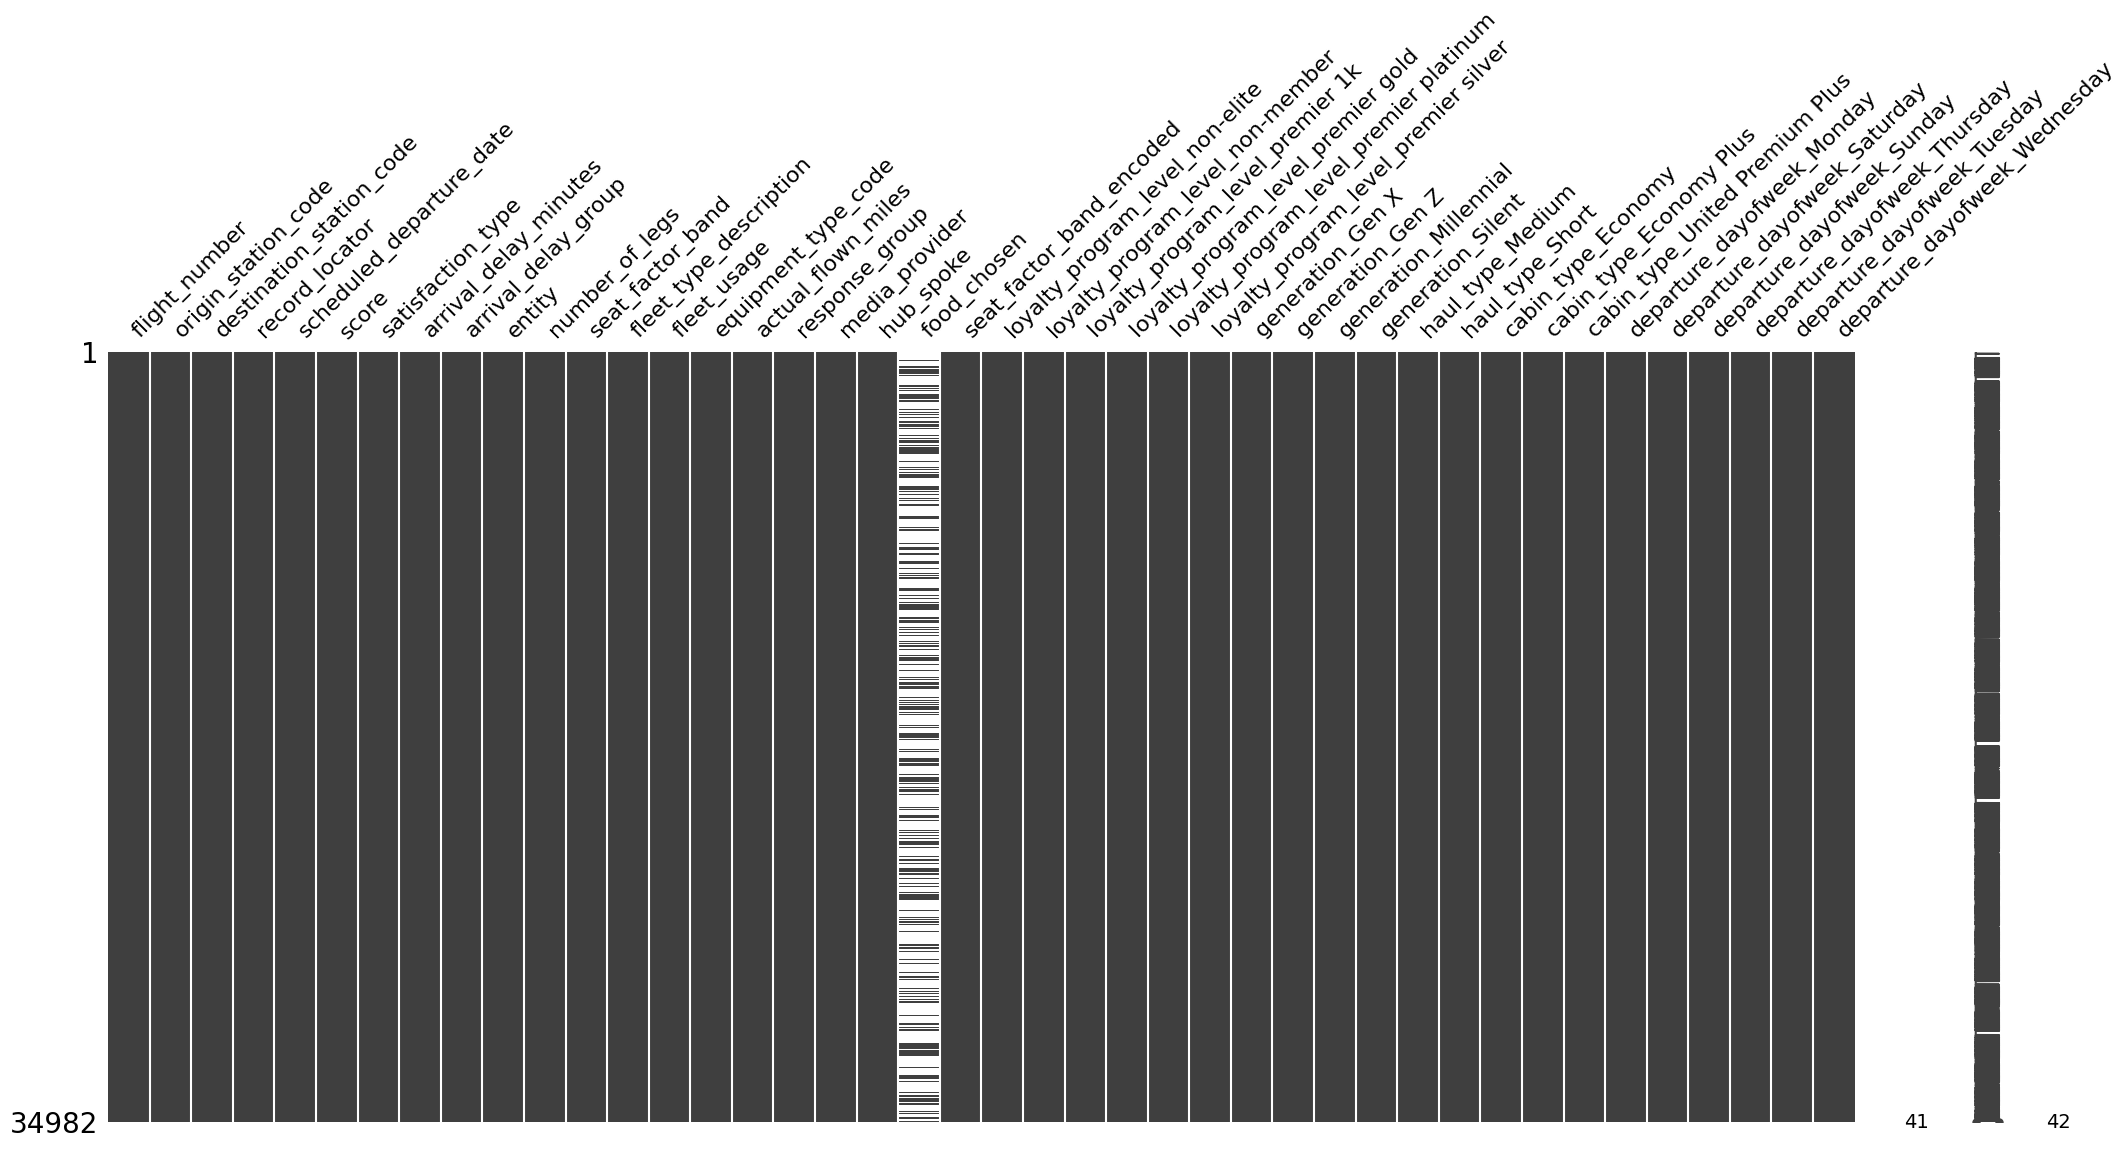

In [145]:
msno.matrix(survey_df_food_merge)

### Correlation Analysis

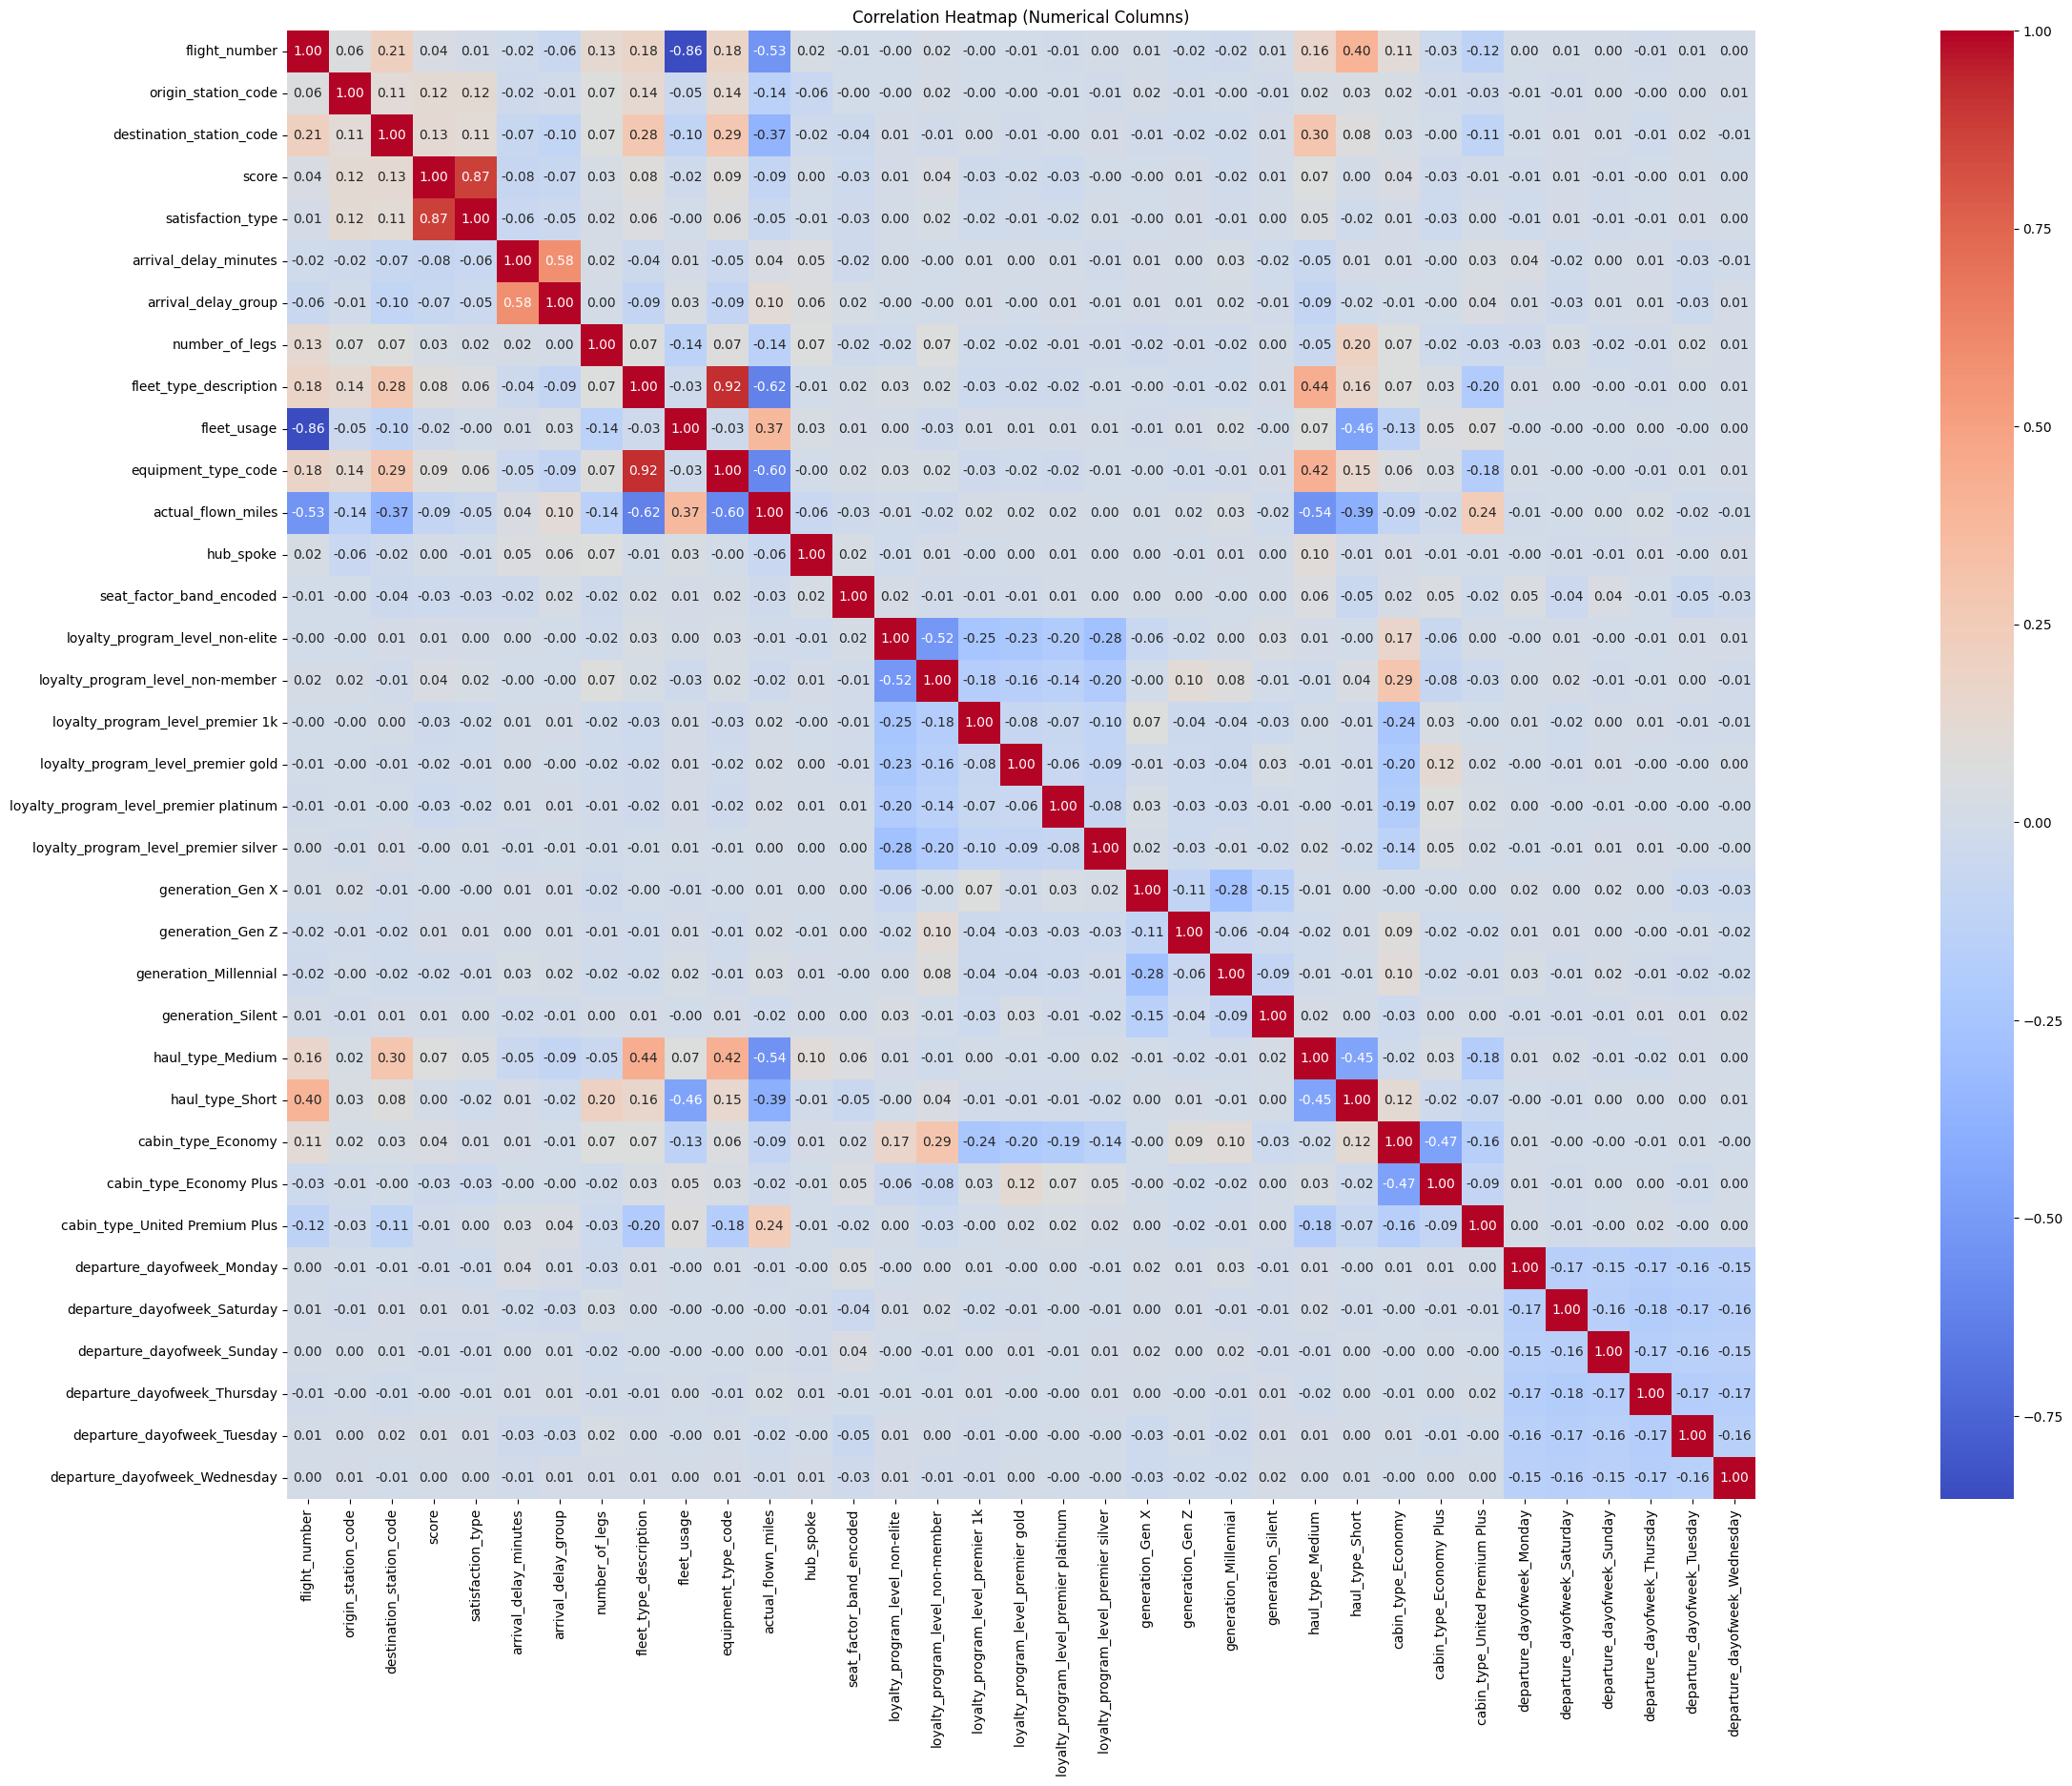

In [146]:
# Select only numeric columns
num_cols = survey_df_food_merge.select_dtypes(include=['number', 'bool'])

# Compute correlation matrix on numeric columns only
corr_matrix = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(50, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

## 4. Airline Customer Satisfaction Prediction - Data Pipeline + Model Creation

**Objective**: Prepare airline review data for satisfaction prediction model
**Dataset**: AirlineScrappedReview.csv (3,575 reviews)
**Target**: Binary satisfaction (rating >= 5)

### Methodology Overview
1. **Environment Setup**: Import libraries and configure settings
2. **Data Loading**: Load raw data and perform initial validation
3. **Data Analysis**: Comprehensive EDA to understand data patterns
4. **Data Cleaning**: Handle missing values and remove unnecessary features
5. **Feature Engineering**: Create new features and transform existing ones
6. **Feature Encoding**: Convert categorical variables for ML algorithms  
7. **Final Dataset**: Export clean, encoded data for modeling


### 1. Environment Setup

All imports, installations, and configuration in one place.


In [147]:
# Install required packages
!pip install vaderSentiment
!pip install shap lime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.1 MB/s eta 0:00:00


In [148]:

# Machine learning preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Import libraries for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Import TensorFlow/Keras for Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout ,LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

# Sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#XAI
import shap
from lime import lime_tabular

# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('default')
sns.set_palette("husl")

print(f"TensorFlow version: {tf.__version__}")
print("✅ Environment setup complete")


2025-10-22 09:44:18.832554: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761126259.081567      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761126259.144994      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow version: 2.18.0
✅ Environment setup complete


### 2. Data Loading & Initial Validation

Load data with proper preprocessing and immediate quality checks.


In [149]:
# Load dataset with error handling
try:
    df = pd.read_csv('/kaggle/input/airline-scrapped-review-cleaned/AirlineScrappedReview_Cleaned.csv')
    print(f"✅ Successfully loaded dataset: {df.shape[0]} rows × {df.shape[1]} columns")
except FileNotFoundError:
    print("❌ File not found. Please check the file path.")
    raise

# Standardize column names (lowercase, consistent naming)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Display basic information
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nColumn names:")
print(df.columns.tolist())


✅ Successfully loaded dataset: 3575 rows × 18 columns

DATASET OVERVIEW
Shape: (3575, 18)
Memory usage: 6.99 MB

Column names:
['passanger_name', 'flying_date', 'route', 'rating', 'verified', 'review_title', 'review_content', 'traveller_type', 'class', 'start_location', 'end_location', 'layover_route', 'start_latitude', 'start_longitude', 'start_address', 'end_latitude', 'end_longitude', 'end_address']


In [150]:
# Initial data preview
print("FIRST 3 ROWS:")
print("-" * 60)
display(df.head(3))

print("\nDATA TYPES:")
print("-" * 30)
print(df.dtypes)


FIRST 3 ROWS:
------------------------------------------------------------


passanger_name flying_date                  route  rating       verified                            review_title                                     review_content  traveller_type           class   start_location end_location layover_route  start_latitude  start_longitude                                      start_address  end_latitude  end_longitude                                        end_address
0     Paige Boet   June 2023  New Orleans to London       1  Trip Verified             The airline lost my luggage  The airline lost my luggage and was absolutely...    Solo Leisure   Economy Class      New Orleans       London           NaN       29.975998       -90.078213  New Orleans, Orleans Parish, Louisiana, United...     51.507446      -0.127765    London, Greater London, England, United Kingdom
1        S Layne  March 2023        London to Amman       1  Trip Verified  fully refunded by our travel insurance  We booked on the BA website, round trip flight...  Couple Leisure  Business Class           London        Amman           NaN       51.507446        -0.127765    London, Greater London, England, United Kingdom     31.951569      35.923963  عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...
2    E Lanewoski         NaN     Heathrow to Bodrum       2  Trip Verified             no boarding drinks provided  First time flying with BA business class, neve...    Solo Leisure  Business Class  London Heathrow       Bodrum           NaN       51.467739        -0.458780  London Heathrow Airport, The Beacon Roundabout...     37.034399      27.430651                Bodrum, Muğla, Ege Bölgesi, Türkiye


DATA TYPES:
------------------------------
passanger_name      object
flying_date         object
route               object
rating               int64
verified            object
review_title        object
review_content      object
traveller_type      object
class               object
start_location      object
end_location        object
layover_route       object
start_latitude     float64
start_longitude    float64
start_address       object
end_latitude       float64
end_longitude      float64
end_address         object
dtype: object


### 3. Comprehensive Data Analysis

Complete EDA to understand data quality, patterns, and relationships.


In [151]:
# DATA QUALITY ASSESSMENT
print("DATA QUALITY REPORT")
print("=" * 50)

print("\n1. MISSING VALUES:")
print("-" * 30)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent
}).sort_values('Missing_Count', ascending=False)
print(missing_df[missing_df['Missing_Count'] > 0])

print("\n2. DUPLICATE ROWS:")
print("-" * 30)
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

print("\n3. DATA TYPES & MEMORY:")
print("-" * 30)
print(df.info(memory_usage='deep'))


DATA QUALITY REPORT

1. MISSING VALUES:
------------------------------
                 Missing_Count  Missing_Percent
layover_route             3091        86.461538
flying_date               2620        73.286713
end_location               766        21.426573
route                      766        21.426573
start_location             766        21.426573
end_latitude                99         2.769231
end_address                 99         2.769231
end_longitude               99         2.769231
start_longitude             60         1.678322
start_latitude              60         1.678322
start_address               60         1.678322
passanger_name               1         0.027972

2. DUPLICATE ROWS:
------------------------------
Duplicate rows: 74

3. DATA TYPES & MEMORY:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ----

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 1200x600 with 0 Axes>

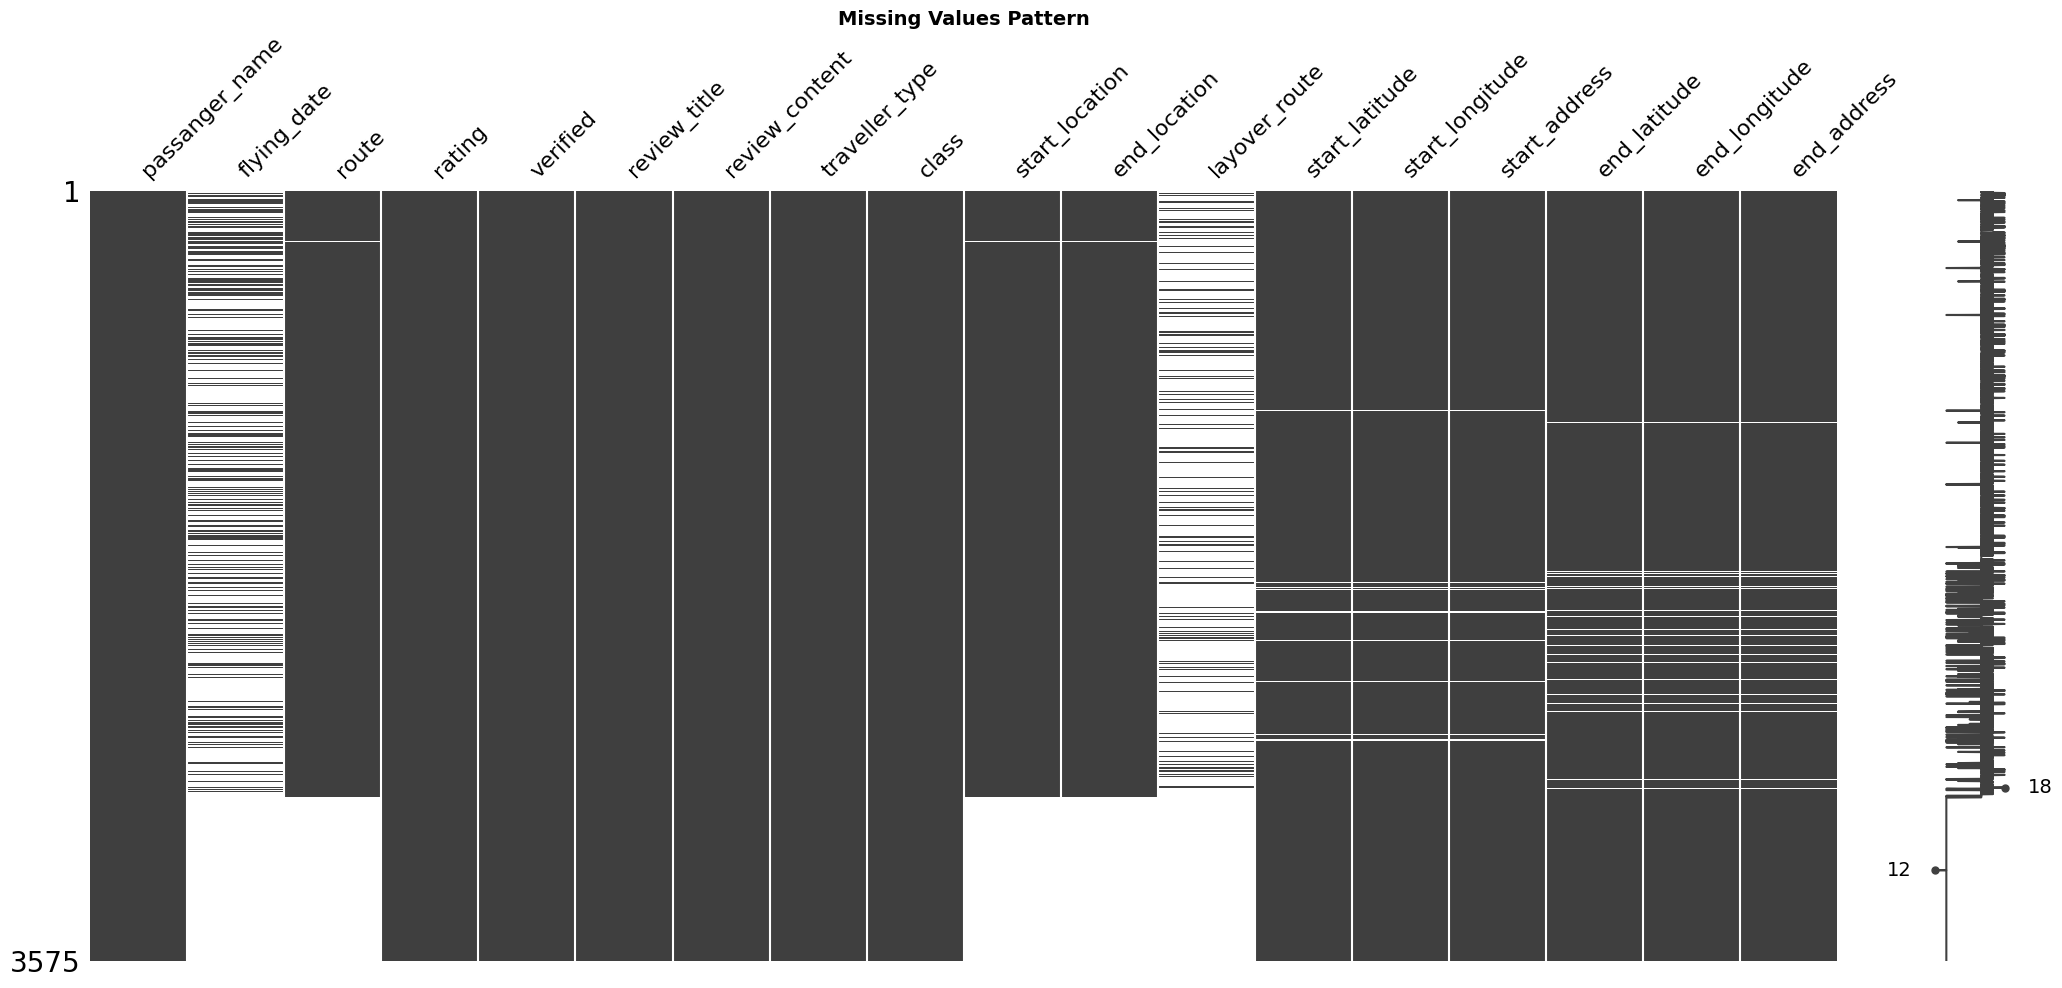

In [152]:
# MISSING VALUES VISUALIZATION
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title("Missing Values Pattern", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [153]:
# CATEGORICAL FEATURES ANALYSIS
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 50)

categorical_cols = ['verified', 'traveller_type', 'class']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print("-" * (len(col) + 1))
        value_counts = df[col].value_counts()
        percentages = (value_counts / len(df)) * 100

        for idx, (value, count) in enumerate(value_counts.items()):
            print(f"  {value}: {count} ({percentages.iloc[idx]:.1f}%)")
    else:
        print(f"❌ Column '{col}' not found")


CATEGORICAL FEATURES ANALYSIS

VERIFIED:
---------
  Not Verified: 2508 (70.2%)
  Trip Verified: 1067 (29.8%)

TRAVELLER_TYPE:
---------------
  Couple Leisure: 949 (26.5%)
  Solo Leisure: 860 (24.1%)
  Unknown: 760 (21.3%)
  Business: 623 (17.4%)
  Family Leisure: 382 (10.7%)
  Various: 1 (0.0%)

CLASS:
------
  Economy Class: 1846 (51.6%)
  Business Class: 1160 (32.4%)
  Premium Economy: 358 (10.0%)
  First Class: 209 (5.8%)
  Unknown: 2 (0.1%)


In [154]:
df['traveller_type'] = df['traveller_type'].replace('Various', 'Unknown') # just move this various class just one record


In [155]:
# NUMERICAL FEATURES ANALYSIS
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 50)

# Rating analysis (our key feature)
if 'rating' in df.columns:
    print("\nRATING DISTRIBUTION:")
    print("-" * 20)
    rating_stats = df['rating'].describe()
    print(rating_stats)

    # Rating value counts
    print("\nRating breakdown:")
    rating_counts = df['rating'].value_counts().sort_index()
    for rating, count in rating_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  Rating {rating}: {count} reviews ({percentage:.1f}%)")

# Statistical summary for all numerical columns
print("\nFULL STATISTICAL SUMMARY:")
print("-" * 30)
display(df.describe())


NUMERICAL FEATURES ANALYSIS

RATING DISTRIBUTION:
--------------------
count    3575.000000
mean        4.790490
std         3.170323
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        10.000000
Name: rating, dtype: float64

Rating breakdown:
  Rating 1: 805 reviews (22.5%)
  Rating 2: 409 reviews (11.4%)
  Rating 3: 396 reviews (11.1%)
  Rating 4: 246 reviews (6.9%)
  Rating 5: 230 reviews (6.4%)
  Rating 6: 189 reviews (5.3%)
  Rating 7: 309 reviews (8.6%)
  Rating 8: 361 reviews (10.1%)
  Rating 9: 304 reviews (8.5%)
  Rating 10: 326 reviews (9.1%)

FULL STATISTICAL SUMMARY:
------------------------------


rating  start_latitude  start_longitude  end_latitude  end_longitude
count  3575.000000     3515.000000      3515.000000   3476.000000    3476.000000
mean      4.790490       42.639473        -2.164986     40.550399      -1.118816
std       3.170323       17.022014        44.576587     18.723619      46.045735
min       1.000000      -37.666951      -123.182909    -37.814245    -123.179234
25%       2.000000       41.893320        -0.458780     39.739236      -0.458780
50%       4.000000       46.314475        -0.127765     46.314475      -0.127765
75%       8.000000       51.467739        11.048029     51.467739      11.048029
max      10.000000       65.011873       151.208285     64.145981     174.550610

### 4. Data Cleaning & Preprocessing

Systematic approach to handle missing values and remove unnecessary data.


### removing duplicates 

In [156]:
# Get total number of rows
total_rows = len(df)
print(f"Total rows: {total_rows}")


Total rows: 3575


In [157]:
duplicate_rows = df[df.duplicated()]
duplicate_rows


passanger_name flying_date             route  rating      verified                     review_title                                     review_content  traveller_type            class   start_location    end_location layover_route  start_latitude  start_longitude                                      start_address  end_latitude  end_longitude                                        end_address
2440    Richard Hodges         NaN  Tampa to Gatwick       8  Not Verified    comfortable, if narrow, seats  British Airways from Tampa to Gatwick on Boein...  Couple Leisure   Business Class            Tampa  London Gatwick           NaN       27.947760       -82.458444  Tampa, Hillsborough County, Florida, United St...     51.154108      -0.182312  London Gatwick Airport, Perimeter Road East, L...
2442    Richard Hodges         NaN        LHR to MIA       6  Not Verified               crummy Boeing 747s  London Heathrow to Miami on one of British Air...  Couple Leisure  Premium Economy  London Heathrow      Miami (FL)           NaN       51.467739        -0.458780  London Heathrow Airport, The Beacon Roundabout...     25.774173     -80.193620   Miami, Miami-Dade County, Florida, United States
2840   Michael Stanley         NaN               NaN       2  Not Verified  British Airways customer review  BA 10 Bangkok to London Heathrow May 26th 2015...         Unknown  Premium Economy              NaN             NaN           NaN       46.314475        11.048029  Nanno, Ville d'Anaunia, Comunità della Val di ...     46.314475      11.048029  Nanno, Ville d'Anaunia, Comunità della Val di ...
2865          S Carver         NaN               NaN      10  Not Verified  British Airways customer review  Madrid-London City return. Excellent experienc...         Unknown   Business Class              NaN             NaN           NaN       46.314475        11.048029  Nanno, Ville d'Anaunia, Comunità della Val di ...     46.314475      11.048029  Nanno, Ville d'Anaunia, Comunità della Val di ...
2866      Kathleen Lee         NaN               NaN       1  Not Verified  British Airways customer review  Our flight on economy long distance from the A...         Unknown    Economy Class              NaN             NaN           NaN       46.314475        11.048029  Nanno, Ville d'Anaunia, Comunità della Val di ...     46.314475      11.048029  Nanno, Ville d'Anaunia, Comunità della Val di ...
...                ...         ...               ...     ...           ...                              ...                                                ...             ...              ...              ...             ...           ...             ...              ...                                                ...           ...            ...                                                ...
3495      Derek Salter         NaN               NaN      10  Not Verified  British Airways customer review  LGW to AMS. Easy check-in at Gatwick with the ...         Unknown    Economy Class              NaN             NaN           NaN       46.314475        11.048029  Nanno, Ville d'Anaunia, Comunità della Val di ...     46.314475      11.048029  Nanno, Ville d'Anaunia, Comunità della Val di ...
3496       Mark Murphy         NaN               NaN       1  Not Verified  British Airways customer review  I really do not have the energy to write very ...         Unknown    Economy Class              NaN             NaN           NaN       46.314475        11.048029  Nanno, Ville d'Anaunia, Comunità della Val di ...     46.314475      11.048029  Nanno, Ville d'Anaunia, Comunità della Val di ...
3497      Charlie Harm         NaN               NaN       4  Not Verified  British Airways customer review  Flew in Club World for the first time on the n...         Unknown   Business Class              NaN             NaN           NaN       46.314475        11.048029  Nanno, Ville d'Anaunia, Comunità della Val di ...     46.314475      11.048029  Nanno, Ville d'Anaunia, Comu

In [158]:
# Remove duplicates in place
df.drop_duplicates(inplace=True)



In [159]:
# Get total number of rows
total_rows = len(df)
print(f"Total rows: {total_rows}")

Total rows: 3501


In [160]:
# SENTIMENT ANALYSIS FIRST (needed for other processing)
print("APPLYING SENTIMENT ANALYSIS")
print("=" * 40)

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    """Extract sentiment compound score using VADER"""
    if pd.isna(text) or text == '':
        return 0.0
    try:
        scores = analyzer.polarity_scores(str(text))
        return scores['compound']
    except:
        return 0.0

# Apply sentiment analysis to review content
if 'review_content' in df.columns:
    print("Calculating sentiment scores...")
    df['sentiment_score'] = df['review_content'].apply(get_sentiment_score)

    # Create sentiment labels
    def categorize_sentiment(score):
        if score >= 0.05:
            return 'positive'
        elif score <= -0.05:
            return 'negative'
        else:
            return 'neutral'

    df['sentiment_label'] = df['sentiment_score'].apply(categorize_sentiment)

    print("✅ Sentiment analysis complete")
    print(f"Sentiment score range: {df['sentiment_score'].min():.3f} to {df['sentiment_score'].max():.3f}")
    print("\nSentiment distribution:")
    print(df['sentiment_label'].value_counts())
else:
    print("❌ review_content column not found")


APPLYING SENTIMENT ANALYSIS
Calculating sentiment scores...
✅ Sentiment analysis complete
Sentiment score range: -0.998 to 0.999

Sentiment distribution:
sentiment_label
positive    2028
negative    1433
neutral       40
Name: count, dtype: int64


In [161]:
# MISSING VALUES HANDLING STRATEGY
print("MISSING VALUES HANDLING")
print("=" * 30)

# Strategy for location data
missing_locations = df[['start_location', 'end_location']].isnull().sum()
print("Location missing values:")
print(missing_locations)

# Create coordinate-to-location mapping
def create_coordinate_location_mapping(df):
    """Create mapping from coordinates to locations using existing complete data"""
    start_mapping = {}
    end_mapping = {}

    # For start locations
    complete_start = df.dropna(subset=['start_location', 'start_latitude', 'start_longitude'])
    for _, row in complete_start.iterrows():
        coord_key = (round(row['start_latitude'], 4), round(row['start_longitude'], 4))
        if coord_key not in start_mapping:
            start_mapping[coord_key] = row['start_location']

    # For end locations
    complete_end = df.dropna(subset=['end_location', 'end_latitude', 'end_longitude'])
    for _, row in complete_end.iterrows():
        coord_key = (round(row['end_latitude'], 4), round(row['end_longitude'], 4))
        if coord_key not in end_mapping:
            end_mapping[coord_key] = row['end_location']

    return start_mapping, end_mapping

# Apply coordinate mapping
start_map, end_map = create_coordinate_location_mapping(df)
print(f"Created mappings: {len(start_map)} start locations, {len(end_map)} end locations")


MISSING VALUES HANDLING
Location missing values:
start_location    694
end_location      694
dtype: int64
Created mappings: 281 start locations, 317 end locations


In [162]:
# FILL MISSING LOCATIONS
def extract_city_from_address(address):
    """Extract city name from address string"""
    if pd.isna(address) or address == '':
        return None

    # Split by comma and take the first meaningful part
    parts = str(address).split(',')
    if len(parts) > 0:
        city = parts[0].strip()
        # Clean up common prefixes
        if city.lower().startswith(('the ', 'city of ')):
            city = city[city.find(' ') + 1:].strip()
        return city if city else None
    return None

# Fill missing start_locations
df_filled = df.copy()
missing_start_mask = df_filled['start_location'].isnull()

for idx, row in df_filled[missing_start_mask].iterrows():
    if not pd.isna(row['start_latitude']) and not pd.isna(row['start_longitude']):
        coord_key = (round(row['start_latitude'], 4), round(row['start_longitude'], 4))
        if coord_key in start_map:
            df_filled.at[idx, 'start_location'] = start_map[coord_key]
        elif not pd.isna(row['start_address']):
            city = extract_city_from_address(row['start_address'])
            if city:
                df_filled.at[idx, 'start_location'] = city

# Fill missing end_locations
missing_end_mask = df_filled['end_location'].isnull()

for idx, row in df_filled[missing_end_mask].iterrows():
    if not pd.isna(row['end_latitude']) and not pd.isna(row['end_longitude']):
        coord_key = (round(row['end_latitude'], 4), round(row['end_longitude'], 4))
        if coord_key in end_map:
            df_filled.at[idx, 'end_location'] = end_map[coord_key]
        elif not pd.isna(row['end_address']):
            city = extract_city_from_address(row['end_address'])
            if city:
                df_filled.at[idx, 'end_location'] = city

print("✅ Location filling complete")
print("Remaining missing values:")
print(df_filled[['start_location', 'end_location']].isnull().sum())


✅ Location filling complete
Remaining missing values:
start_location    0
end_location      0
dtype: int64


DATA CLEANING VERIFICATION
Missing values after cleaning:
passanger_name        1
flying_date        2546
route               694
layover_route      3017
start_latitude       60
start_longitude      60
start_address        60
end_latitude         99
end_longitude        99
end_address          99
dtype: int64


This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 1200x400 with 0 Axes>

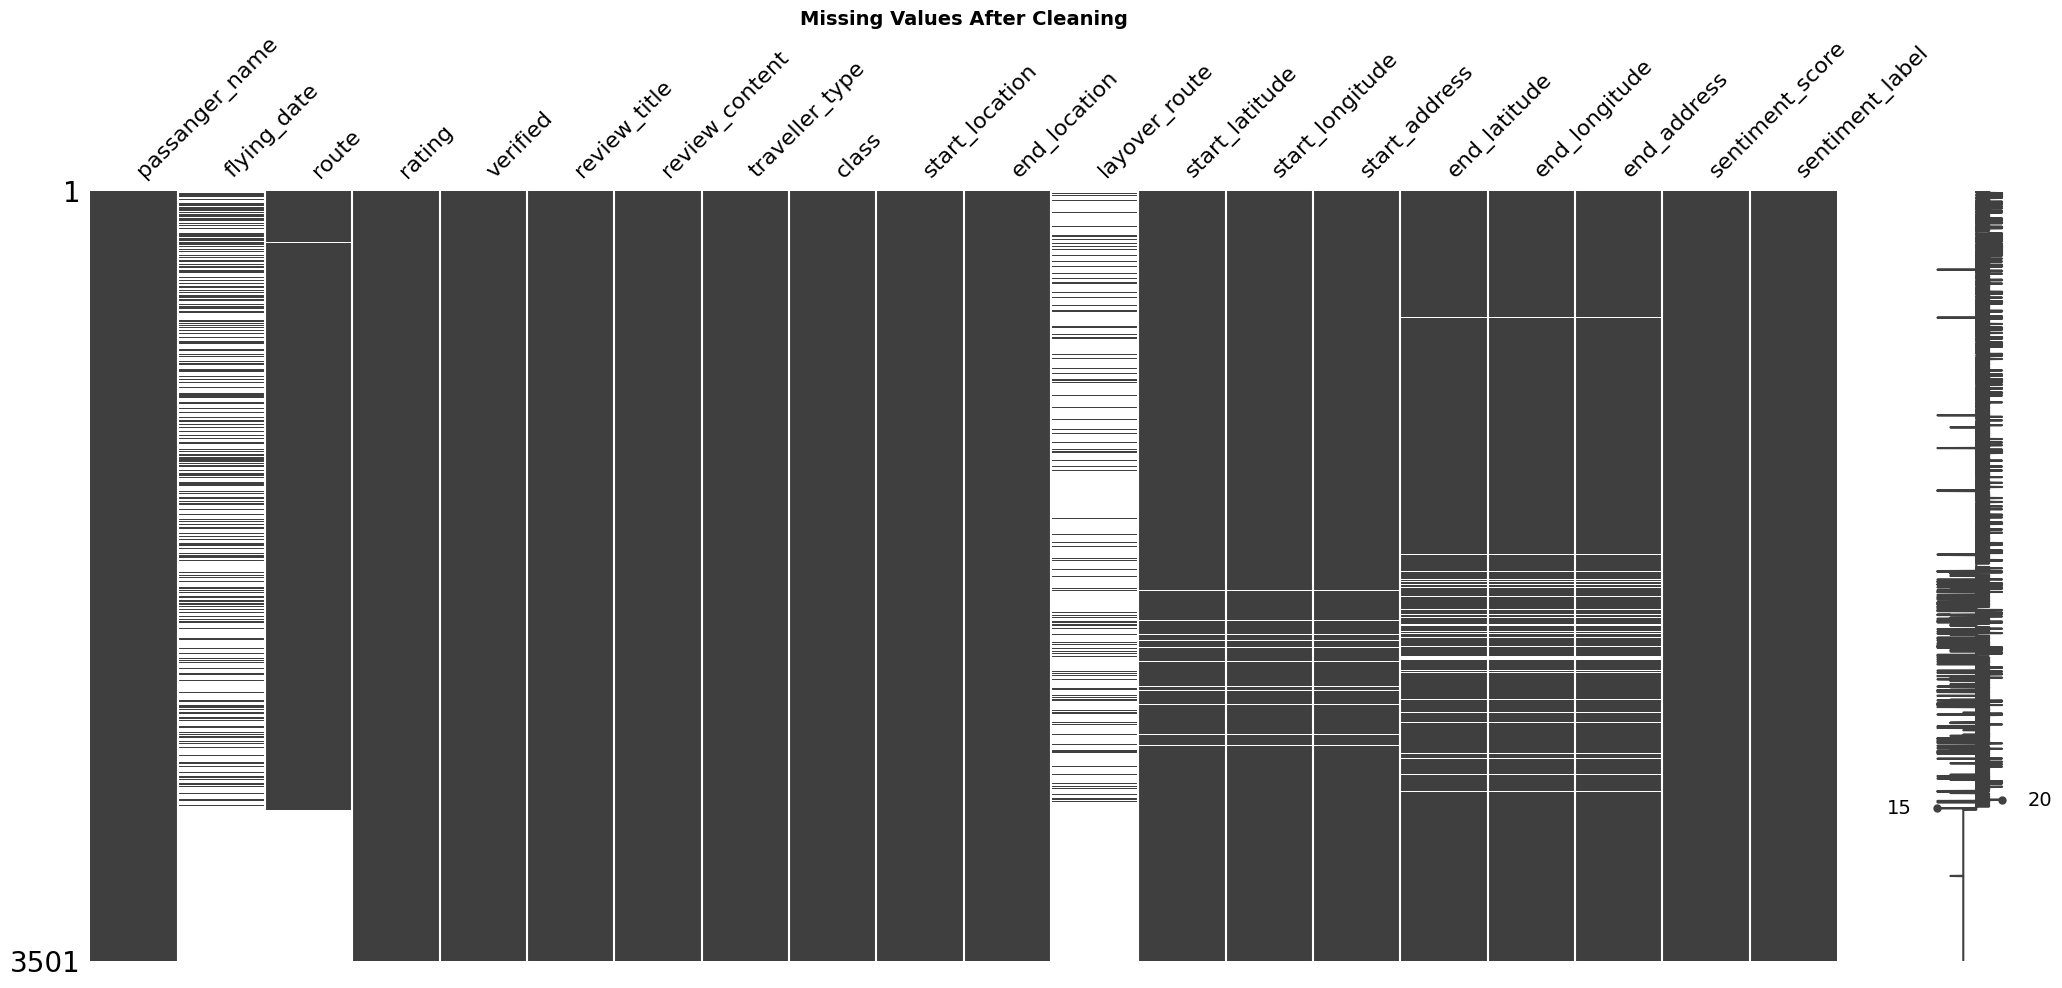


✅ Data cleaning complete
Clean dataset: 3501 rows × 20 columns


In [163]:
# VERIFY DATA CLEANING RESULTS
print("DATA CLEANING VERIFICATION")
print("=" * 40)

# Check remaining missing values
remaining_missing = df_filled.isnull().sum()
print("Missing values after cleaning:")
print(remaining_missing[remaining_missing > 0])

# Visualize final missing values pattern
plt.figure(figsize=(12, 4))
msno.matrix(df_filled)
plt.title("Missing Values After Cleaning", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n✅ Data cleaning complete")
print(f"Clean dataset: {df_filled.shape[0]} rows × {df_filled.shape[1]} columns")


### 5. Feature Engineering & Transformation

Create new features and transform existing ones for machine learning.


In [164]:
# FEATURE CREATION STRATEGY
print("FEATURE ENGINEERING")
print("=" * 30)

# 1. Create binary satisfaction target (main prediction target)
df_filled['satisfaction'] = (df_filled['rating'] >= 5).astype(int)

print("1. SATISFACTION TARGET CREATED:")
satisfaction_dist = df_filled['satisfaction'].value_counts()
print(f"   Satisfied (1): {satisfaction_dist.get(1, 0)} ({satisfaction_dist.get(1, 0)/len(df_filled)*100:.1f}%)")
print(f"   Not Satisfied (0): {satisfaction_dist.get(0, 0)} ({satisfaction_dist.get(0, 0)/len(df_filled)*100:.1f}%)")

# 2. Create route feature (combination of start and end locations)
df_filled['route'] = df_filled['start_location'].astype(str) + ' → ' + df_filled['end_location'].astype(str)

print(f"\n2. ROUTE FEATURE CREATED:")
print(f"   Total unique routes: {df_filled['route'].nunique()}")
print(f"   Sample routes:")
for route in df_filled['route'].value_counts().head(3).index:
    count = df_filled['route'].value_counts()[route]
    print(f"     {route}: {count} flights")

print(f"\n✅ Feature engineering complete")


FEATURE ENGINEERING
1. SATISFACTION TARGET CREATED:
   Satisfied (1): 1670 (47.7%)
   Not Satisfied (0): 1831 (52.3%)

2. ROUTE FEATURE CREATED:
   Total unique routes: 1378
   Sample routes:
     Nanno → Nanno: 694 flights
     London → Johannesburg: 16 flights
     London → Cape Town: 15 flights

✅ Feature engineering complete


In [165]:
# FEATURE ANALYSIS
print("FEATURE ANALYSIS SUMMARY")
print("=" * 40)

print("FINAL FEATURE SET:")
print("-" * 20)
for i, col in enumerate(df_filled.columns, 1):
    dtype = df_filled[col].dtype
    unique_vals = df_filled[col].nunique()
    print(f"{i:2d}. {col:<20} | {str(dtype):<10} | {unique_vals:>4} unique values")

print(f"\nDATASET STATISTICS:")
print(f"- Total samples: {len(df_filled):,}")
print(f"- Total features: {len(df_filled.columns)}")
print(f"- Memory usage: {df_filled.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Show sample of engineered features
print(f"\nSAMPLE DATA WITH NEW FEATURES:")
print("-" * 35)
display(df_filled[['rating', 'satisfaction', 'sentiment_score', 'sentiment_label', 'route']].head())


FEATURE ANALYSIS SUMMARY
FINAL FEATURE SET:
--------------------
 1. passanger_name       | object     | 2759 unique values
 2. flying_date          | object     |  100 unique values
 3. route                | object     | 1378 unique values
 4. rating               | int64      |   10 unique values
 5. verified             | object     |    2 unique values
 6. review_title         | object     | 2570 unique values
 7. review_content       | object     | 3501 unique values
 8. traveller_type       | object     |    5 unique values
 9. class                | object     |    5 unique values
10. start_location       | object     |  333 unique values
11. end_location         | object     |  412 unique values
12. layover_route        | object     |   50 unique values
13. start_latitude       | float64    |  282 unique values
14. start_longitude      | float64    |  282 unique values
15. start_address        | object     |  284 unique values
16. end_latitude         | float64    |  318 uniqu

rating  satisfaction  sentiment_score sentiment_label                     route
0       1             0          -0.7990        negative      New Orleans → London
1       1             0           0.0219         neutral            London → Amman
2       2             0          -0.7096        negative  London Heathrow → Bodrum
3       4             0          -0.5849        negative            Amman → London
4       7             1           0.9789        positive       London City → Ibiza

### 6. Feature Encoding for Machine Learning

Convert all categorical variables to numerical format using appropriate encoding strategies.


In [166]:
# ENCODING STRATEGY IMPLEMENTATION
print("FEATURE ENCODING STRATEGY")
print("=" * 40)

# Create working copy for encoding
df_encoded = df_filled.copy()

# 1. TARGET ENCODING for high-cardinality location features
def target_encode(df, feature_col, target_col):
    """Apply target encoding using mean of target variable"""
    mean_target = df.groupby(feature_col)[target_col].mean()
    return df[feature_col].map(mean_target)

print("1. TARGET ENCODING (Locations):")
print("-" * 35)

# Encode start and end locations separately
df_encoded['start_location_encoded'] = target_encode(df_encoded, 'start_location', 'satisfaction')
df_encoded['end_location_encoded'] = target_encode(df_encoded, 'end_location', 'satisfaction')

print(f"   start_location: {df_encoded['start_location'].nunique()} categories → 1 numerical feature")
print(f"   end_location: {df_encoded['end_location'].nunique()} categories → 1 numerical feature")
print("   Encoding values represent mean satisfaction rate per location")

# 2. LABEL ENCODING for binary features
print("\n2. LABEL ENCODING (Binary Features):")
print("-" * 38)

le_verified = LabelEncoder()
df_encoded['verified_encoded'] = le_verified.fit_transform(df_encoded['verified'])

print(f"   verified: {df_encoded['verified'].nunique()} categories → 1 binary feature")
verification_mapping = dict(zip(le_verified.classes_, le_verified.transform(le_verified.classes_)))
print(f"   Mapping: {verification_mapping}")


FEATURE ENCODING STRATEGY
1. TARGET ENCODING (Locations):
-----------------------------------
   start_location: 333 categories → 1 numerical feature
   end_location: 412 categories → 1 numerical feature
   Encoding values represent mean satisfaction rate per location

2. LABEL ENCODING (Binary Features):
--------------------------------------
   verified: 2 categories → 1 binary feature
   Mapping: {'Not Verified': 0, 'Trip Verified': 1}


In [167]:
# 3. ONE-HOT ENCODING for multi-category features
print("3. ONE-HOT ENCODING (Multi-category Features):")
print("-" * 48)

# Apply one-hot encoding to traveller_type and class
categorical_features = ['traveller_type', 'class']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features, drop_first=False)

print(f"Applied one-hot encoding to: {categorical_features}")

# Show new columns created
traveller_cols = [col for col in df_encoded.columns if col.startswith('traveller_type_')]
class_cols = [col for col in df_encoded.columns if col.startswith('class_')]

print(f"\nTraveller type columns ({len(traveller_cols)}):")
for col in traveller_cols:
    print(f"   - {col}")

print(f"\nClass columns ({len(class_cols)}):")
for col in class_cols:
    print(f"   - {col}")

print("\n4. REFERENCE CATEGORY REMOVAL (Avoid Multicollinearity):")
print("-" * 58)

# Remove Unknown categories as reference categories
reference_cols_to_drop = ['traveller_type_Unknown', 'class_Unknown']
existing_ref_cols = [col for col in reference_cols_to_drop if col in df_encoded.columns]
df_encoded = df_encoded.drop(columns=existing_ref_cols)

print(f"Dropped reference categories: {existing_ref_cols}")
print("These serve as baseline (when all other categories = 0)")


3. ONE-HOT ENCODING (Multi-category Features):
------------------------------------------------
Applied one-hot encoding to: ['traveller_type', 'class']

Traveller type columns (5):
   - traveller_type_Business
   - traveller_type_Couple Leisure
   - traveller_type_Family Leisure
   - traveller_type_Solo Leisure
   - traveller_type_Unknown

Class columns (5):
   - class_Business Class
   - class_Economy Class
   - class_First Class
   - class_Premium Economy
   - class_Unknown

4. REFERENCE CATEGORY REMOVAL (Avoid Multicollinearity):
----------------------------------------------------------
Dropped reference categories: ['traveller_type_Unknown', 'class_Unknown']
These serve as baseline (when all other categories = 0)


### 7. Final Dataset Analysis & Export

Quality assurance and export of the final processed dataset.


In [168]:
# FINAL DATASET QUALITY ASSURANCE
print("FINAL DATASET QUALITY ASSURANCE")
print("=" * 50)

# Check for any remaining missing values
missing_final = df_encoded.isnull().sum()
print("1. MISSING VALUES CHECK:")
print("-" * 25)
if missing_final.sum() == 0:
    print("   ✅ No missing values in final dataset")
else:
    print("   ⚠️  Remaining missing values:")
    print(missing_final[missing_final > 0])

# Check data types
print("\n2. DATA TYPES VERIFICATION:")
print("-" * 30)
dtype_summary = df_encoded.dtypes.value_counts()
print(dtype_summary)

# Statistical summary of encoded features
print("\n3. ENCODED FEATURES STATISTICS:")
print("-" * 35)
display(df_encoded.describe())

# Target variable distribution
print("\n4. TARGET VARIABLE BALANCE:")
print("-" * 30)
target_dist = df_encoded['satisfaction'].value_counts()
target_pct = df_encoded['satisfaction'].value_counts(normalize=True) * 100
print(f"   Class 0 (Not Satisfied): {target_dist[0]:,} samples ({target_pct[0]:.1f}%)")
print(f"   Class 1 (Satisfied): {target_dist[1]:,} samples ({target_pct[1]:.1f}%)")

balance_ratio = min(target_dist) / max(target_dist)
print(f"   Balance ratio: {balance_ratio:.3f} ({'Balanced' if balance_ratio > 0.3 else 'Imbalanced'})")


FINAL DATASET QUALITY ASSURANCE
1. MISSING VALUES CHECK:
-------------------------
   ⚠️  Remaining missing values:
passanger_name        1
flying_date        2546
layover_route      3017
start_latitude       60
start_longitude      60
start_address        60
end_latitude         99
end_longitude        99
end_address          99
dtype: int64

2. DATA TYPES VERIFICATION:
------------------------------
object     12
bool        8
float64     7
int64       3
Name: count, dtype: int64

3. ENCODED FEATURES STATISTICS:
-----------------------------------


rating  start_latitude  start_longitude  end_latitude  end_longitude  sentiment_score  satisfaction  start_location_encoded  end_location_encoded  verified_encoded
count  3501.000000     3441.000000      3441.000000   3402.000000    3402.000000      3501.000000   3501.000000             3501.000000           3501.000000       3501.000000
mean      4.764924       42.564281        -2.418618     40.429634      -1.353347         0.166911      0.477007                0.477007              0.477007          0.304770
std       3.167312       17.193260        44.991376     18.904671      46.489936         0.776652      0.499542                0.191370              0.201204          0.460376
min       1.000000      -37.666951      -123.182909    -37.814245    -123.179234        -0.997500      0.000000                0.000000              0.000000          0.000000
25%       2.000000       41.875562        -0.458780     38.954140      -0.458780        -0.721300      0.000000                0.395582              0.355330          0.000000
50%       4.000000       46.314475        -0.127765     46.314475      -0.127765         0.485400      0.000000                0.500000              0.466819          0.000000
75%       8.000000       51.467739        11.048029     51.467739      11.048029         0.930000      1.000000                0.651297              0.651297          1.000000
max      10.000000       65.011873       151.208285     64.145981     174.550610         0.999200      1.000000                1.000000              1.000000          1.000000


4. TARGET VARIABLE BALANCE:
------------------------------
   Class 0 (Not Satisfied): 1,831 samples (52.3%)
   Class 1 (Satisfied): 1,670 samples (47.7%)
   Balance ratio: 0.912 (Balanced)


In [169]:
df_filled.columns

Index(['passanger_name', 'flying_date', 'route', 'rating', 'verified', 'review_title', 'review_content', 'traveller_type', 'class', 'start_location', 'end_location', 'layover_route', 'start_latitude', 'start_longitude', 'start_address', 'end_latitude', 'end_longitude', 'end_address', 'sentiment_score', 'sentiment_label', 'satisfaction'], dtype='object')

### 8. Final Column Cleanup & Dataset Preparation

Now we remove all unnecessary columns in one comprehensive operation before saving the final dataset.


<Axes: >

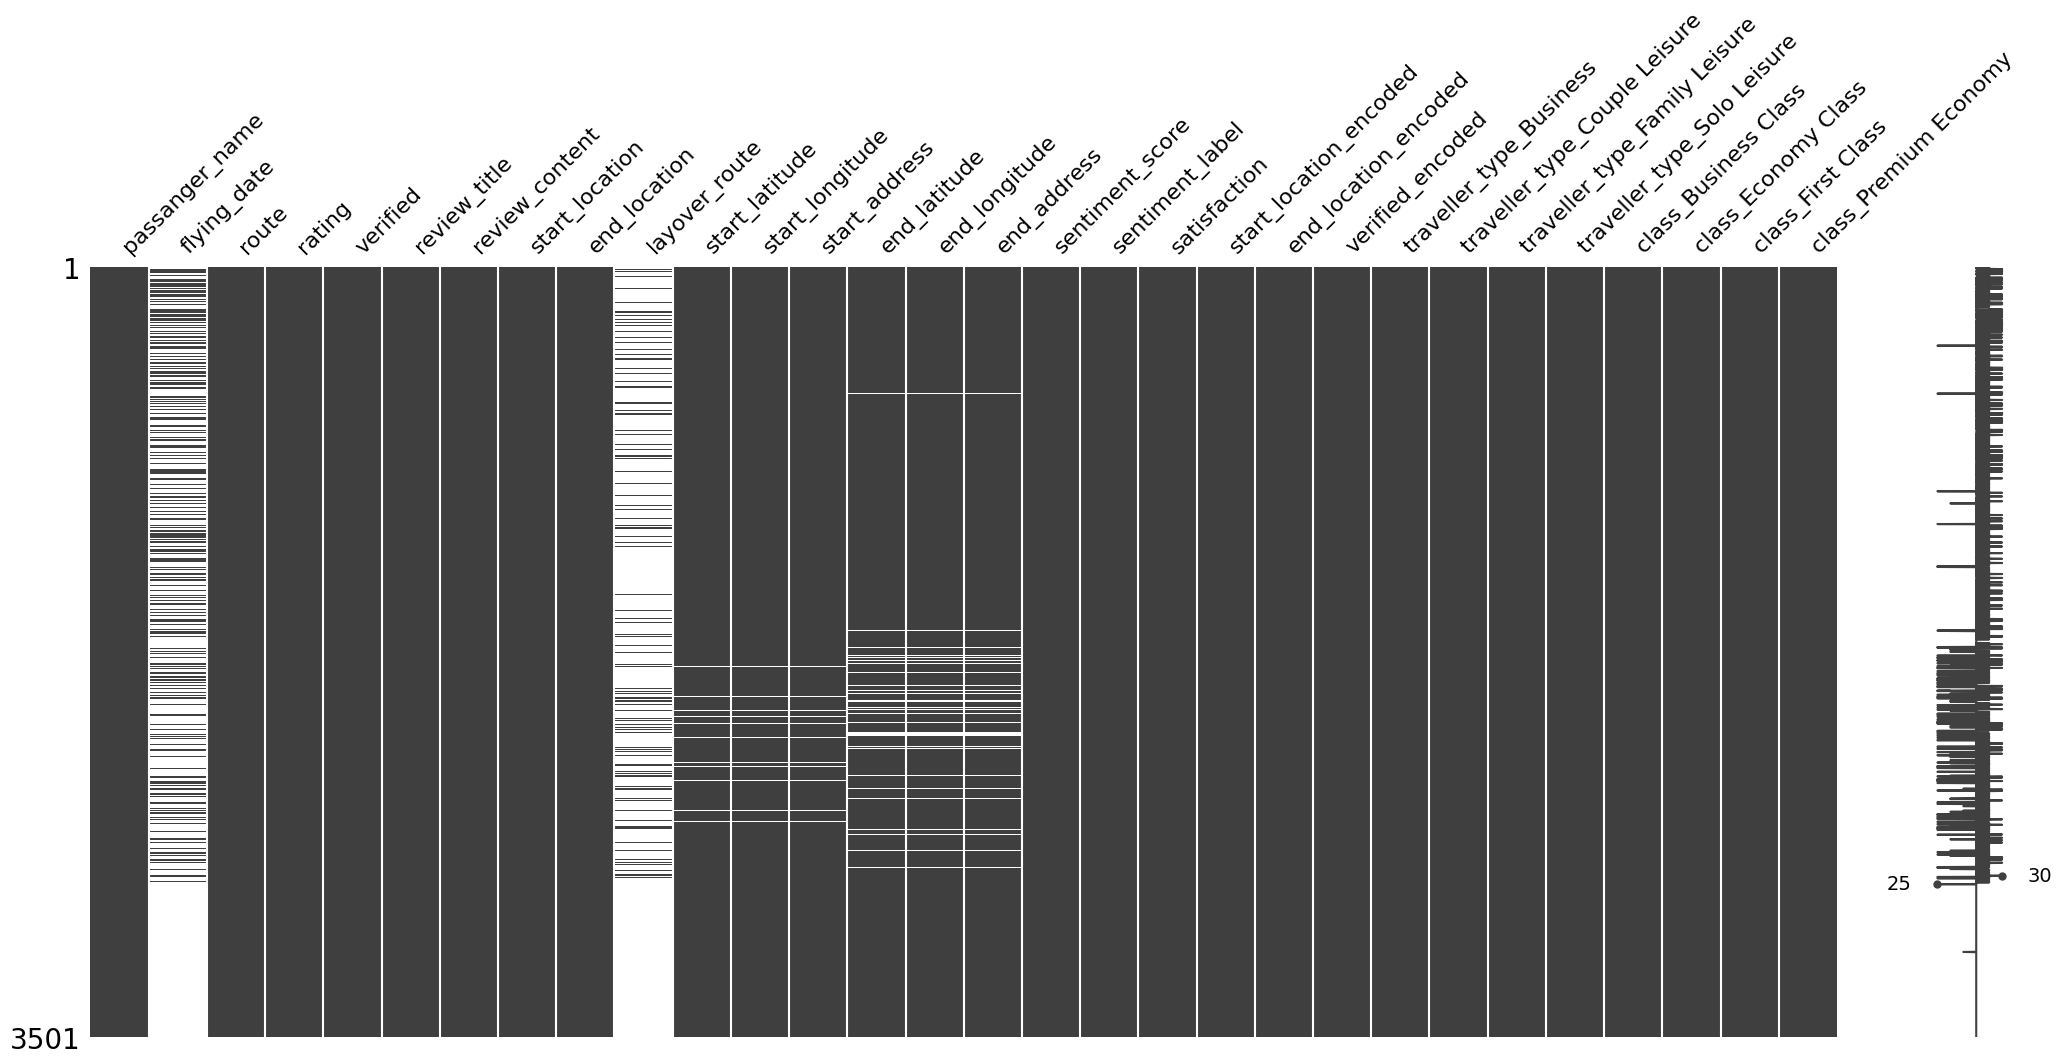

In [170]:
msno.matrix(df_encoded)

In [171]:
# FINAL COMPREHENSIVE COLUMN CLEANUP - ALL DROPS AT ONCE
print("FINAL COLUMN CLEANUP")
print("=" * 50)

# All columns to remove in one operation:

# 1. Unnecessary raw data columns
raw_data_columns = [
    'passanger_name',        # Personal identifier - not needed
    'flying_date',           # Date information - not relevant
    'review_title',          # Redundant with review_content
    'review_content',        # Raw text - replaced by sentiment_score
    'layover_route',         # Sparse data, not useful
    'start_latitude',        # Replaced by encoded locations
    'start_longitude',       # Replaced by encoded locations
    'end_latitude',          # Replaced by encoded locations
    'end_longitude',         # Replaced by encoded locations
    'start_address',         # Replaced by encoded locations
    'end_address'            # Replaced by encoded locations
]

# 2. Original categorical columns (after encoding)
original_categorical_columns = [
    'rating',               # DATA LEAKAGE: satisfaction derived from rating
    'verified',             # Replaced by verified_encoded
    # 'start_location',       # Replaced by start_location_encoded
    # 'end_location',         # Replaced by end_location_encoded
    'route',               # Redundant (captured in location encoding)
    'sentiment_label'       # Keep only sentiment_score (continuous better)
]

# 3. Reference categories (avoid dummy variable trap)
reference_categories = [
    'traveller_type_Unknown',  # Reference for traveller types
    'class_Unknown'            # Reference for class types
]

# Combine ALL columns to drop
all_columns_to_drop = raw_data_columns + original_categorical_columns + reference_categories

# Drop only columns that exist in the dataframe
existing_cols_to_drop = [col for col in all_columns_to_drop if col in df_encoded.columns]
df_final = df_encoded.drop(columns=existing_cols_to_drop)

# Report what was dropped
print(f"DROPPED {len(existing_cols_to_drop)} COLUMNS:")
print("-" * 40)
for i, col in enumerate(existing_cols_to_drop, 1):
    if col in raw_data_columns:
        category = "Raw Data"
    elif col in original_categorical_columns:
        category = "Original Categorical"
    else:
        category = "Reference Category"
    print(f"  {i:2d}. {col:<25} ({category})")

print(f"\n✅ FINAL DATASET READY:")
print(f"   Shape: {df_final.shape}")
print(f"   Features: {df_final.shape[1] - 1} (+ 1 target)")

# Show final columns
print(f"\nFINAL FEATURE SET:")
print("-" * 25)
target_col = "satisfaction"
feature_cols = [col for col in df_final.columns if col != target_col]
print(f"TARGET: {target_col}")
print(f"FEATURES ({len(feature_cols)}):")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i:2d}. {col}")


FINAL COLUMN CLEANUP
DROPPED 15 COLUMNS:
----------------------------------------
   1. passanger_name            (Raw Data)
   2. flying_date               (Raw Data)
   3. review_title              (Raw Data)
   4. review_content            (Raw Data)
   5. layover_route             (Raw Data)
   6. start_latitude            (Raw Data)
   7. start_longitude           (Raw Data)
   8. end_latitude              (Raw Data)
   9. end_longitude             (Raw Data)
  10. start_address             (Raw Data)
  11. end_address               (Raw Data)
  12. rating                    (Original Categorical)
  13. verified                  (Original Categorical)
  14. route                     (Original Categorical)
  15. sentiment_label           (Original Categorical)

✅ FINAL DATASET READY:
   Shape: (3501, 15)
   Features: 14 (+ 1 target)

FINAL FEATURE SET:
-------------------------
TARGET: satisfaction
FEATURES (14):
   1. start_location
   2. end_location
   3. sentiment_score
   4. s

<Axes: >

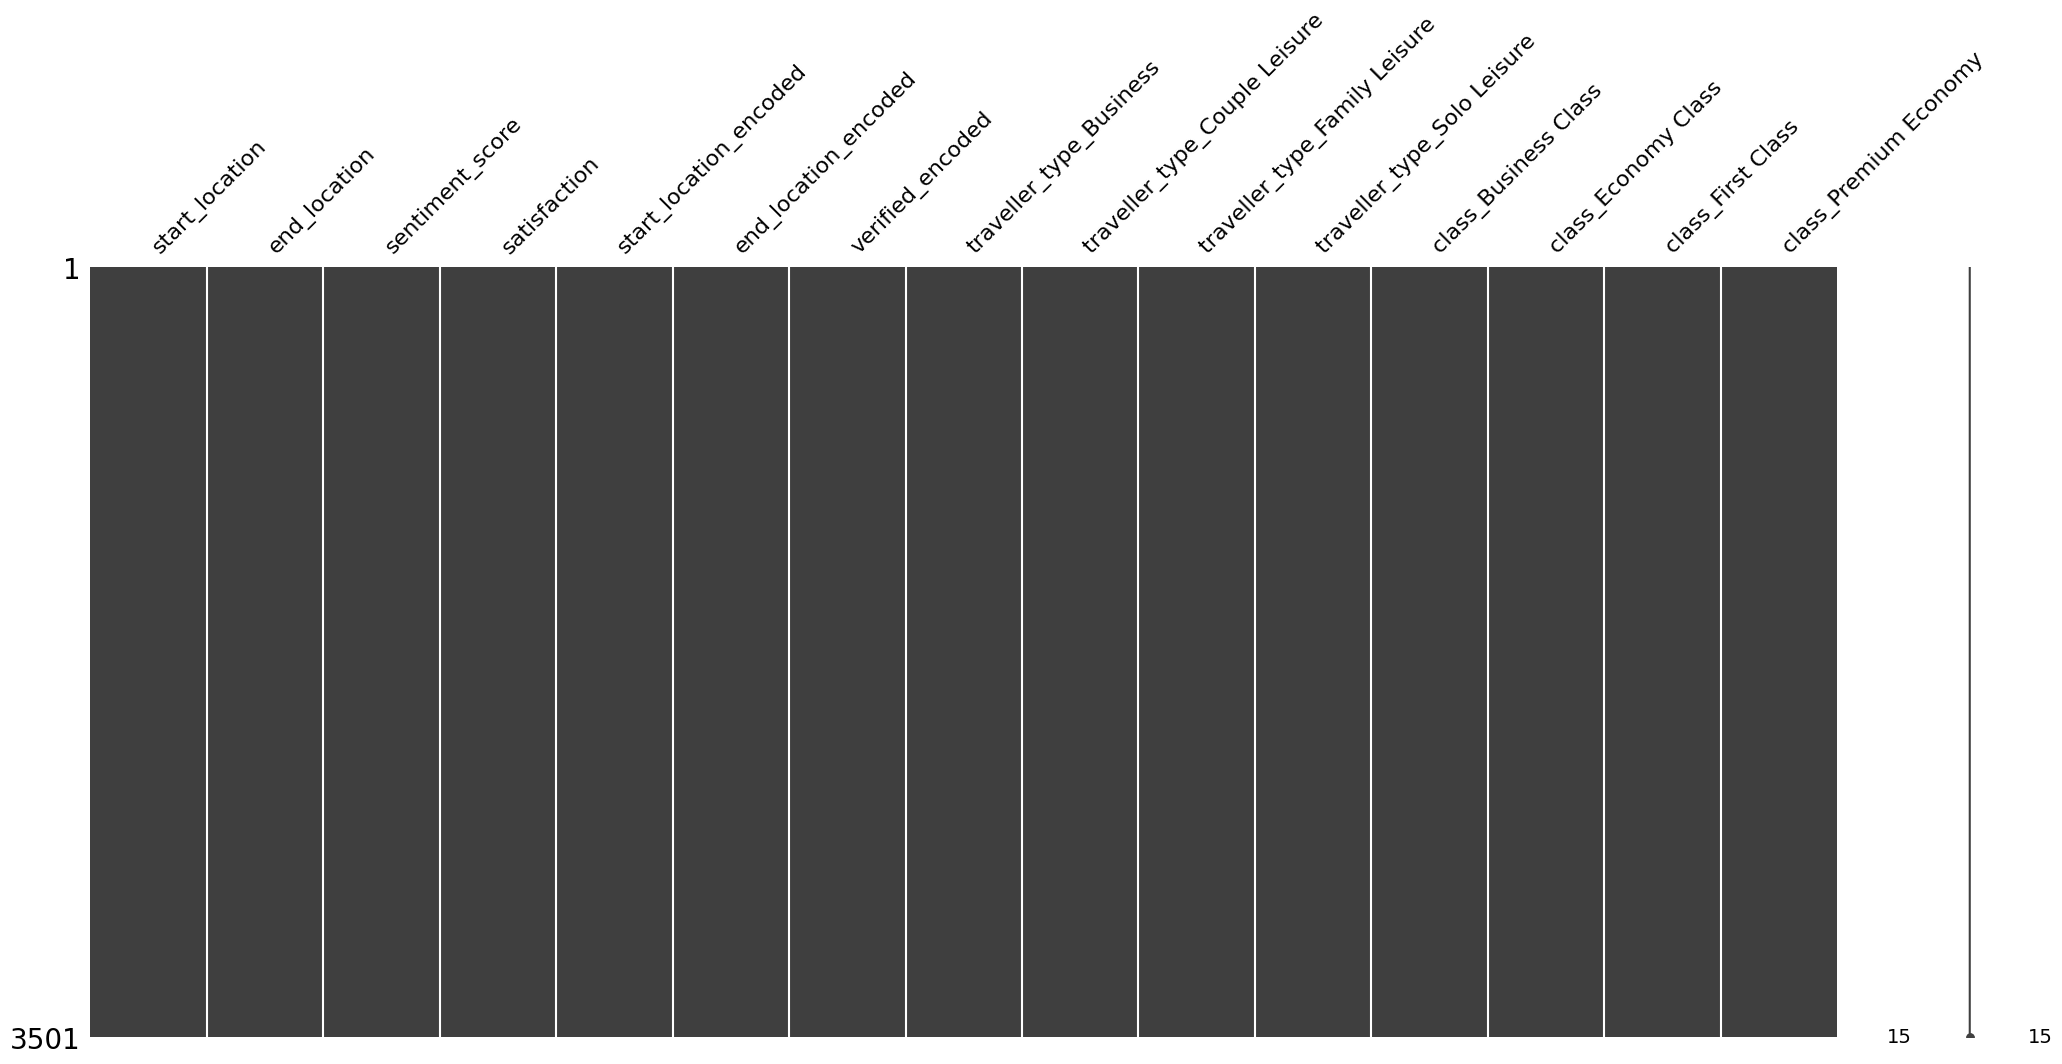

In [172]:
msno.matrix(df_final)

5. FEATURE CORRELATION ANALYSIS:
-----------------------------------


invalid value encountered in less


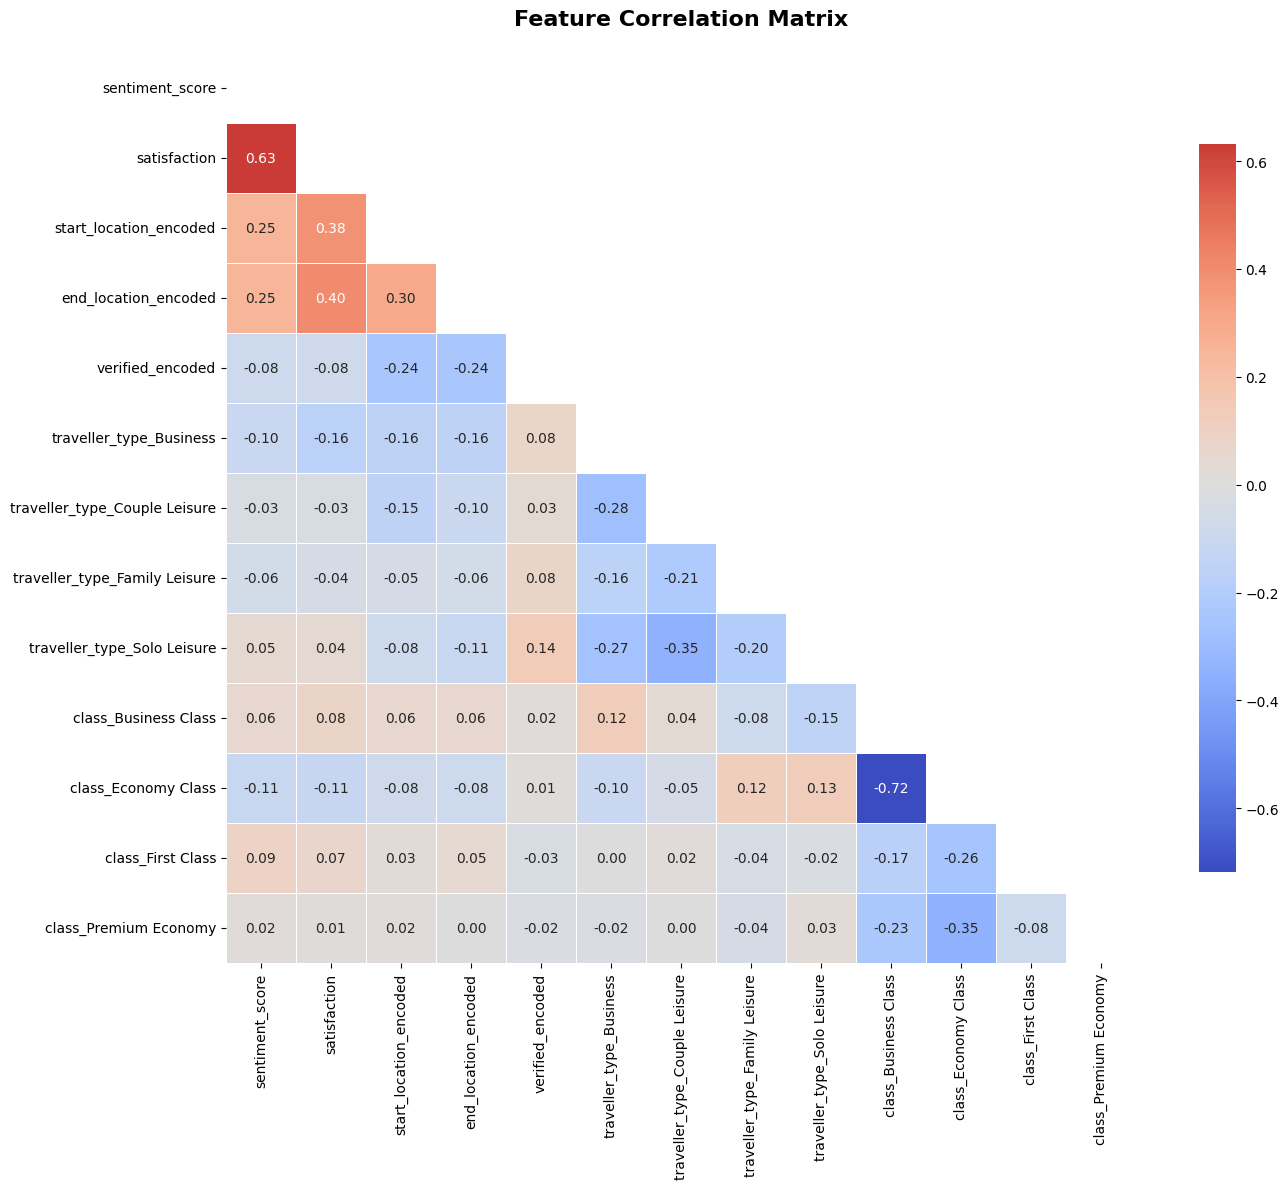


✅ No concerning correlations (all |r| ≤ 0.8)


In [173]:
# FEATURE CORRELATION ANALYSIS
print("5. FEATURE CORRELATION ANALYSIS:")
print("-" * 35)

# Calculate correlation matrix for numerical features
corr_matrix = df_final.select_dtypes(include=['number', 'bool']).corr()

# Create correlation heatmap
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Show only lower triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify highly correlated features
high_corr_threshold = 0.8
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print(f"\n⚠️  High correlations (|r| > {high_corr_threshold}):")
    for col1, col2, corr_val in high_corr_pairs:
        print(f"   {col1} ↔ {col2}: {corr_val:.3f}")
else:
    print(f"\n✅ No concerning correlations (all |r| ≤ {high_corr_threshold})")


In [174]:
print("\n6. DATASET EXPORT:")
print("-" * 20)

output_filename = 'airline_scrapped_review_final_dataset.csv'
df_final.to_csv(output_filename, index=False)

print(f"✅ Dataset exported: {output_filename}")
print(f"   Shape: {df_final.shape}")
print(f"   Size: {df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

feature_doc = {
    'satisfaction': 'Target variable: 1 if rating ≥ 5, 0 otherwise',
    'sentiment_score': 'VADER sentiment compound score (-1 to +1)',
    'start_location_encoded': 'Target encoded start location (mean satisfaction)',
    'end_location_encoded': 'Target encoded end location (mean satisfaction)',
    'verified_encoded': 'Label encoded verification status (0/1)',
}

for col in df_final.columns:
    if col.startswith('traveller_type_'):
        feature_doc[col] = f'Binary indicator for {col.replace("traveller_type_", "")} traveller type'
    elif col.startswith('class_'):
        feature_doc[col] = f'Binary indicator for {col.replace("class_", "")} class'

print(f"\nFEATURE DOCUMENTATION:")
print("-" * 25)
for feature, description in feature_doc.items():
    if feature in df_final.columns:
        print(f"   {feature:<30}: {description}")

print(f"\n🎉 DATA PREPROCESSING PIPELINE COMPLETE!")
print(f"   Ready for machine learning model training")



6. DATASET EXPORT:
--------------------
✅ Dataset exported: airline_scrapped_review_final_dataset.csv
   Shape: (3501, 15)
   Size: 0.77 MB

FEATURE DOCUMENTATION:
-------------------------
   satisfaction                  : Target variable: 1 if rating ≥ 5, 0 otherwise
   sentiment_score               : VADER sentiment compound score (-1 to +1)
   start_location_encoded        : Target encoded start location (mean satisfaction)
   end_location_encoded          : Target encoded end location (mean satisfaction)
   verified_encoded              : Label encoded verification status (0/1)
   traveller_type_Business       : Binary indicator for Business traveller type
   traveller_type_Couple Leisure : Binary indicator for Couple Leisure traveller type
   traveller_type_Family Leisure : Binary indicator for Family Leisure traveller type
   traveller_type_Solo Leisure   : Binary indicator for Solo Leisure traveller type
   class_Business Class          : Binary indicator for Business Class c

### 9. Required Analysis for Data-Engineering Questions

## Which traveler type and class combination yields the highest and lowest ratings?


TOP 5 COMBINATIONS (HIGHEST RATINGS):
--------------------------------------------------------------------------------
traveller_type           class  avg_rating  review_count  rating_std
  Solo Leisure     First Class    6.627907            43    3.023899
Couple Leisure     First Class    5.983607            61    2.969241
  Solo Leisure  Business Class    5.780347           173    3.098812
Family Leisure  Business Class    5.743902            82    3.177121
  Solo Leisure Premium Economy    5.653061            98    3.049766


BOTTOM 5 COMBINATIONS (LOWEST RATINGS):
--------------------------------------------------------------------------------
traveller_type           class  avg_rating  review_count  rating_std
Couple Leisure   Economy Class    3.908297           458    3.073907
      Business Premium Economy    3.750000            52    2.721555
Family Leisure Premium Economy    3.600000            25    3.013857
      Business  Business Class    3.510791           278    2.62002

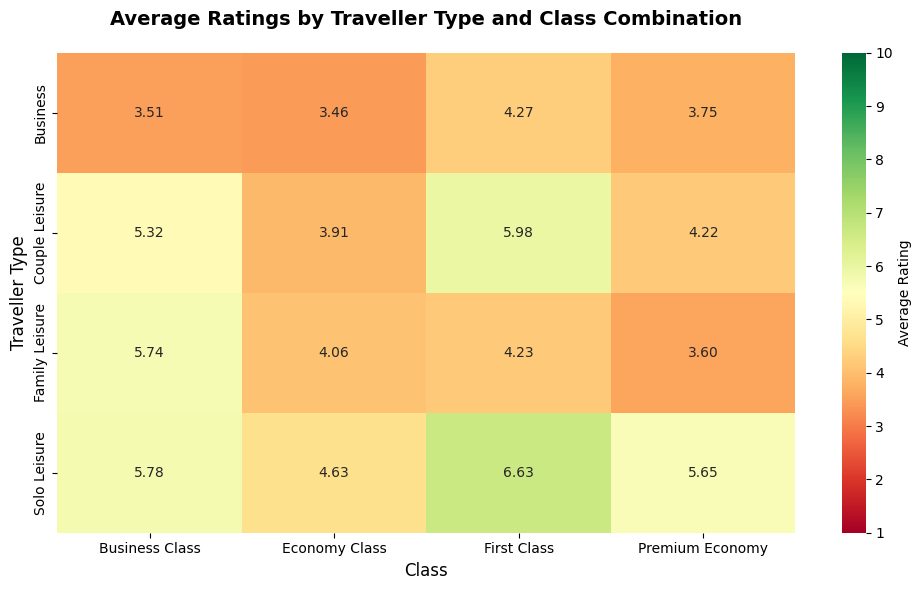

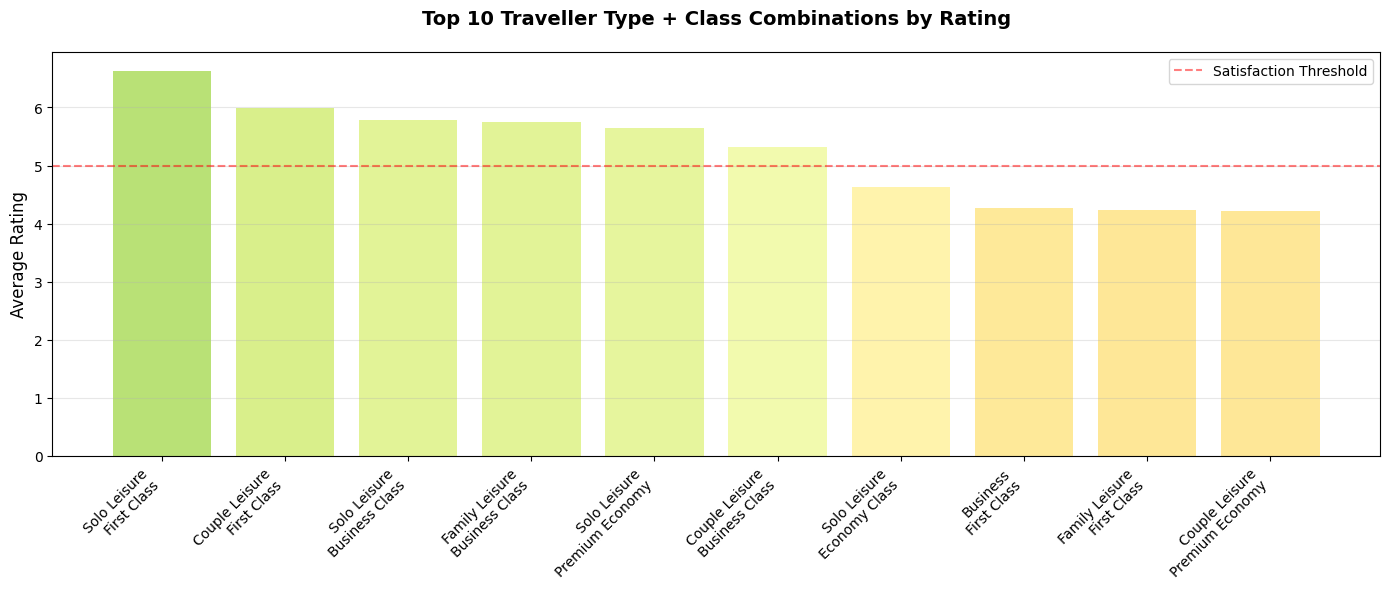

In [175]:
df_analysis =df_filled[(df_filled['traveller_type'] != 'Unknown') & (df_filled['class'] != 'Unknown')].copy()

combination_stats = df_analysis.groupby(['traveller_type', 'class']).agg({
    'rating': ['mean', 'count', 'std']
}).reset_index()

combination_stats.columns = ['traveller_type', 'class', 'avg_rating', 'review_count', 'rating_std']

combination_stats_sorted = combination_stats.sort_values('avg_rating', ascending=False)

print("\nTOP 5 COMBINATIONS (HIGHEST RATINGS):")
print("-"*80)
print(combination_stats_sorted.head(5).to_string(index=False))

print("\n\nBOTTOM 5 COMBINATIONS (LOWEST RATINGS):")
print("-"*80)
print(combination_stats_sorted.tail(5).to_string(index=False))

best_combo = combination_stats_sorted.iloc[0]
worst_combo = combination_stats_sorted.iloc[-1]

print(f"\n HIGHEST RATING:")
print(f"   Combination: {best_combo['traveller_type']} + {best_combo['class']}")
print(f"   Average Rating: {best_combo['avg_rating']:.2f}/10")
print(f"   Number of Reviews: {int(best_combo['review_count'])}")
print(f"   Standard Deviation: {best_combo['rating_std']:.2f}")

print(f"\n LOWEST RATING:")
print(f"   Combination: {worst_combo['traveller_type']} + {worst_combo['class']}")
print(f"   Average Rating: {worst_combo['avg_rating']:.2f}/10")
print(f"   Number of Reviews: {int(worst_combo['review_count'])}")
print(f"   Standard Deviation: {worst_combo['rating_std']:.2f}")

pivot_data = combination_stats.pivot(index='traveller_type',
                                      columns='class',
                                      values='avg_rating')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn',
            vmin=1, vmax=10, cbar_kws={'label': 'Average Rating'})
plt.title('Average Ratings by Traveller Type and Class Combination',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Traveller Type', fontsize=12)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
combination_stats_sorted_top10 = combination_stats_sorted.head(10)

x = range(len(combination_stats_sorted_top10))
bars = ax.bar(x, combination_stats_sorted_top10['avg_rating'],
              color=plt.cm.RdYlGn(combination_stats_sorted_top10['avg_rating']/10))

ax.set_xticks(x)
ax.set_xticklabels([f"{row['traveller_type']}\n{row['class']}"
                     for _, row in combination_stats_sorted_top10.iterrows()],
                    rotation=45, ha='right')
ax.set_ylabel('Average Rating', fontsize=12)
ax.set_title('Top 10 Traveller Type + Class Combinations by Rating',
             fontsize=14, fontweight='bold', pad=20)
ax.axhline(y=5, color='red', linestyle='--', alpha=0.5, label='Satisfaction Threshold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 10.Model creation

### inspecting Cleaned Dataset

In [176]:
df_final

start_location end_location  sentiment_score  satisfaction  start_location_encoded  end_location_encoded  verified_encoded  traveller_type_Business  traveller_type_Couple Leisure  traveller_type_Family Leisure  traveller_type_Solo Leisure  class_Business Class  class_Economy Class  class_First Class  class_Premium Economy
0         New Orleans       London          -0.7990             0                0.500000              0.355330                 1                    False                          False                          False                         True                 False                 True              False                  False
1              London        Amman           0.0219             0                0.395582              0.000000                 1                    False                           True                          False                        False                  True                False              False                  False
2     London Heathrow       Bodrum          -0.7096             0                0.522337              0.000000                 1                    False                          False                          False                         True                  True                False              False                  False
3               Amman       London          -0.5849             0                0.250000              0.355330                 0                    False                          False                          False                         True                 False                 True              False                  False
4         London City        Ibiza           0.9789             1                0.454545              0.500000                 1                    False                          False                           True                        False                  True                False              False                  False
...               ...          ...              ...           ...                     ...                   ...               ...                      ...                            ...                            ...                          ...                   ...                  ...                ...                    ...
3570            Nanno        Nanno           0.9129             0                0.651297              0.651297                 0                    False                          False                          False                        False                 False                 True              False                  False
3571            Nanno        Nanno          -0.8763             0                0.651297              0.651297                 0                    False                          False                          False                        False                 False                 True              False                  False
3572            Nanno        Nanno          -0.2003             0                0.651297              0.651297                 0                    False                          False                          False                        False                 False                 True              False                  False
3573            Nanno        Nanno           0.9864             1                0.651297              0.651297                 0                    False                          False                          False                        False                  True                False              False                  False
3574            Nanno        Nanno           0.0933             1                0.651297              0.651297                 0                    False                          False                          False                        False                 False                False              False                   True

[3501 rows x 15 columns]

In [177]:
df_final.replace({True: 1, False: 0},inplace=True)


Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [178]:
df_final

start_location end_location  sentiment_score  satisfaction  start_location_encoded  end_location_encoded  verified_encoded  traveller_type_Business  traveller_type_Couple Leisure  traveller_type_Family Leisure  traveller_type_Solo Leisure  class_Business Class  class_Economy Class  class_First Class  class_Premium Economy
0         New Orleans       London          -0.7990             0                0.500000              0.355330                 1                        0                              0                              0                            1                     0                    1                  0                      0
1              London        Amman           0.0219             0                0.395582              0.000000                 1                        0                              1                              0                            0                     1                    0                  0                      0
2     London Heathrow       Bodrum          -0.7096             0                0.522337              0.000000                 1                        0                              0                              0                            1                     1                    0                  0                      0
3               Amman       London          -0.5849             0                0.250000              0.355330                 0                        0                              0                              0                            1                     0                    1                  0                      0
4         London City        Ibiza           0.9789             1                0.454545              0.500000                 1                        0                              0                              1                            0                     1                    0                  0                      0
...               ...          ...              ...           ...                     ...                   ...               ...                      ...                            ...                            ...                          ...                   ...                  ...                ...                    ...
3570            Nanno        Nanno           0.9129             0                0.651297              0.651297                 0                        0                              0                              0                            0                     0                    1                  0                      0
3571            Nanno        Nanno          -0.8763             0                0.651297              0.651297                 0                        0                              0                              0                            0                     0                    1                  0                      0
3572            Nanno        Nanno          -0.2003             0                0.651297              0.651297                 0                        0                              0                              0                            0                     0                    1                  0                      0
3573            Nanno        Nanno           0.9864             1                0.651297              0.651297                 0                        0                              0                              0                            0                     1                    0                  0                      0
3574            Nanno        Nanno           0.0933             1                0.651297              0.651297                 0                        0                              0                              0                            0                     0                    0                  0                      1

[3501 rows x 15 columns]

In [179]:
df_final.describe()

sentiment_score  satisfaction  start_location_encoded  end_location_encoded  verified_encoded  traveller_type_Business  traveller_type_Couple Leisure  traveller_type_Family Leisure  traveller_type_Solo Leisure  class_Business Class  class_Economy Class  class_First Class  class_Premium Economy
count      3501.000000   3501.000000             3501.000000           3501.000000       3501.000000              3501.000000                    3501.000000                    3501.000000                  3501.000000           3501.000000          3501.000000        3501.000000            3501.000000
mean          0.166911      0.477007                0.477007              0.477007          0.304770                 0.177949                       0.270494                       0.109112                     0.245644              0.321908             0.520708           0.057698               0.099115
std           0.776652      0.499542                0.191370              0.201204          0.460376                 0.382525                       0.444279                       0.311824                     0.430530              0.467275             0.499642           0.233204               0.298858
min          -0.997500      0.000000                0.000000              0.000000          0.000000                 0.000000                       0.000000                       0.000000                     0.000000              0.000000             0.000000           0.000000               0.000000
25%          -0.721300      0.000000                0.395582              0.355330          0.000000                 0.000000                       0.000000                       0.000000                     0.000000              0.000000             0.000000           0.000000               0.000000
50%           0.485400      0.000000                0.500000              0.466819          0.000000                 0.000000                       0.000000                       0.000000                     0.000000              0.000000             1.000000           0.000000               0.000000
75%           0.930000      1.000000                0.651297              0.651297          1.000000                 0.000000                       1.000000                       0.000000                     0.000000              1.000000             1.000000           0.000000               0.000000
max           0.999200      1.000000                1.000000              1.000000          1.000000                 1.000000                       1.000000                       1.000000                     1.000000              1.000000             1.000000           1.000000               1.000000

### dataset preparation for classification task

In [180]:
X = df_final.drop('satisfaction', axis=1)
y = df_final['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

start_means = y_train.groupby(X_train['start_location']).mean()
end_means = y_train.groupby(X_train['end_location']).mean()

# To fill unseen locations from test
global_mean = y_train.mean()

X_train['start_location_encoded'] = X_train['start_location'].map(start_means)
X_train['end_location_encoded'] = X_train['end_location'].map(end_means)

X_test['start_location_encoded'] = X_test['start_location'].map(start_means).fillna(global_mean)
X_test['end_location_encoded'] = X_test['end_location'].map(end_means).fillna(global_mean)

print(X_train.head())
print(X_test.head())

                           start_location     end_location  sentiment_score  start_location_encoded  end_location_encoded  verified_encoded  traveller_type_Business  traveller_type_Couple Leisure  traveller_type_Family Leisure  traveller_type_Solo Leisure  class_Business Class  class_Economy Class  class_First Class  class_Premium Economy
383                                London         Alicante           0.9427                0.403509              0.400000                 1                        1                              0                              0                            0                     0                    1                  0                      0
2128  Dubai - Dubai International Airport  London Heathrow          -0.8883                0.000000              0.469613                 0                        0                              1                              0                            0                     0                    1                  0 

In [181]:
LOCATION_ENCODING = {}

def init_location_encoding_from_X_train(
    X_train,
    start_col: str = "start_location",
    end_col: str = "end_location",
    start_enc_col: str = "start_location_encoded",
    end_enc_col: str = "end_location_encoded",
):
    try:
        import pandas as _pd  # noqa
    except Exception:
        return  # pandas not available

    if X_train is None:
        return
    # Defensive checks
    cols = set(getattr(X_train, "columns", []))
    needed = {start_col, end_col, start_enc_col, end_enc_col}
    if not needed.issubset(cols):
        return

    from collections import defaultdict, Counter

    def _norm(s: str) -> str:
        s = s or ""
        return " ".join(str(s).strip().split())

    buckets = defaultdict(list)
    for loc, enc in zip(X_train[start_col], X_train[start_enc_col]):
        if _norm(loc):
            buckets[_norm(loc)].append(enc)
    for loc, enc in zip(X_train[end_col], X_train[end_enc_col]):
        if _norm(loc):
            buckets[_norm(loc)].append(enc)

    mapping = {}
    for k, vals in buckets.items():
        try:
            c = Counter([round(float(v), 4) for v in vals if v is not None])
            if not c:
                continue
            mode_val, _ = c.most_common(1)[0]
            mapping[k] = mode_val
        except Exception:
            continue

    if mapping:
        LOCATION_ENCODING.clear()
        LOCATION_ENCODING.update(mapping)

import math, statistics
from typing import Dict, Any, List


def _norm_loc(s: str) -> str:
    s = s or ""
    return " ".join(s.strip().split())


def _current_loc_mean() -> float:
    vals = [v for v in LOCATION_ENCODING.values() if isinstance(v, (int, float))]
    return round(float(statistics.fmean(vals)) if vals else 0.5, 4)


def encode_location_from_training(name: str) -> float:
    key = _norm_loc(name)
    if key in LOCATION_ENCODING:
        try:
            return round(float(LOCATION_ENCODING[key]), 6)
        except Exception:
            pass
    # fallback to dynamic mean if not found
    return _current_loc_mean()
    key = _norm_loc(name)
    return round(float(LOCATION_ENCODING.get(key, GLOBAL_LOC_MEAN)), 4)


try:
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # preferred
    _vader = SentimentIntensityAnalyzer()
except Exception:
    try:
        # Fallback to NLTK's VADER if installed locally
        from nltk.sentiment import SentimentIntensityAnalyzer  # type: ignore
        _vader = SentimentIntensityAnalyzer()
    except Exception:
        _vader = None  # last-resort fallback


def vader_sentiment_score(text: str) -> float:
    if not text or not isinstance(text, str) or _vader is None:
        return 0.0  # neutral center in [-1,1]
    return round(_vader.polarity_scores(text)["compound"], 4)   # -> [0,1]


TRAVELLER_TYPES = ["Business", "Couple Leisure", "Family Leisure", "Solo Leisure"]
CLASSES = ["Business Class", "Economy Class", "First Class", "Premium Economy"]


def _one_hot(value: str, choices: List[str]) -> Dict[str, int]:
    return {c: int(value == c) for c in choices}


def preprocess_raw(raw: Dict[str, Any]) -> Dict[str, Any]:
    """Raw dict -> feature dict aligned to training encodings.
    - Sentiment via VADER (compound -> [0,1]).
    - Location encodings pulled from LOCATION_ENCODING. If not found, impute GLOBAL_LOC_MEAN.
    """
    text = " ".join([
        str(raw.get("review_title", "")),
        str(raw.get("review_content", "")),
    ]).strip()
    sentiment = vader_sentiment_score(text)

    ver_str = str(raw.get("verified", "")).strip().lower()
    verified_encoded = 1 if "trip verified" in ver_str or ver_str == "true" else 0

    tt_val = (str(raw.get("traveller_type", "")).strip() or "Unknown")
    cls_val = (str(raw.get("class", "")).strip() or "Unknown")

    tt_oh = {f"traveller_type_{k}": v for k, v in _one_hot(tt_val, TRAVELLER_TYPES).items()}
    cls_oh = {f"class_{k}": v for k, v in _one_hot(cls_val, CLASSES).items()}

    start_loc = _norm_loc(raw.get("start_location", ""))
    end_loc   = _norm_loc(raw.get("end_location", ""))

    features = {
        # numerical features
        "sentiment_score": sentiment,
        "start_location_encoded": encode_location_from_training(start_loc),
        "end_location_encoded": encode_location_from_training(end_loc),
        "verified_encoded": verified_encoded,
        # one-hot sets
        **tt_oh,
        **cls_oh,
    }
    return features


def format_output(raw: Dict[str, Any], lr, rf, nn) -> str:
    name = raw.get("passenger_name", "Passenger")
    route = raw.get("route", "route")

    def _phrase(res):
        if not isinstance(res, dict) or "class" not in res or "probability" not in res:
            return "unavailable"
        prob = float(res["probability"]) if res["probability"] is not None else 0.0
        cls = int(res["class"]) if res["class"] in (0,1) else 0
        pct = f"{prob*100:.1f}%"
        # class 1 = satisfied, class 0 = not satisfied
        if cls == 1:
            if prob >= 0.8:
                tag = "almost certain satisfied"
            elif prob >= 0.6:
                tag = "likely satisfied"
            else:
                tag = "slightly favors satisfied"
            return f"{tag} ({pct} satisfied)"
        else:
            not_sat = 1 - prob
            if not_sat >= 0.8:
                tag = "almost certain not satisfied"
            elif not_sat >= 0.6:
                tag = "likely not satisfied"
            else:
                tag = "slightly leans not satisfied"
            return f"{tag} ({pct} satisfied)"

    # consensus
    votes = [int(isinstance(x, dict) and x.get("class", 0)) for x in (lr, rf, nn)]
    consensus = "satisfied" if sum(votes) >= 2 else "not satisfied"

    return (
        f"{name} on {route}: "
        f"Logistic regression: {_phrase(lr)}. "
        f"Random forest: {_phrase(rf)}. "
        f"Neural network: {_phrase(nn)}. "
        f"Consensus: {consensus}."
    )
    route = raw.get("route", "route")

    def _phrase(res):
        if not isinstance(res, dict) or "class" not in res or "probability" not in res:
            return "unavailable"
        prob = float(res["probability"]) if res["probability"] is not None else 0.0
        cls = int(res["class"]) if res["class"] in (0,1) else 0
        pct = f"{prob*100:.1f}%"
        # class 1 = recommend, class 0 = not recommend
        if cls == 1:
            if prob >= 0.8:
                tag = "almost certain to recommend"
            elif prob >= 0.6:
                tag = "likely to recommend"
            else:
                tag = "slightly favors recommend"
            return f"{tag} ({pct} to recommend)"
        else:
            # prob here is still P(recommend); invert for wording if needed
            not_rec = 1 - prob
            if not_rec >= 0.8:
                tag = "almost certain not to recommend"
            elif not_rec >= 0.6:
                tag = "likely not to recommend"
            else:
                tag = "slightly leans not to recommend"
            return f"{tag} ({pct} to recommend)"

    # consensus
    votes = [int(isinstance(x, dict) and x.get("class", 0)) for x in (lr, rf, nn)]
    consensus = "recommend" if sum(votes) >= 2 else "not recommend"

    return (
        f"{name} on {route}: "
        f"Logistic regression: {_phrase(lr)}. "
        f"Random forest: {_phrase(rf)}. "
        f"Neural network: {_phrase(nn)}. "
        f"Consensus: {consensus}."
    )
    route = raw.get("route", "route")
    def _fmt(res):
        if not isinstance(res, dict):
            return "n/a"
        if "error" in res:
            return f"error: {res['error']}"
        cls = res.get("class", "n/a")
        prob = res.get("probability", "n/a")
        try:
            prob = f"{float(prob):.3f}"
        except Exception:
            pass
        return f"class {cls} (p={prob})"

    return (
        f"{passenger} on {route}: "
        f"Logistic Regression → {_fmt(lr)}; "
        f"Random Forest → {_fmt(rf)}; "
        f"Neural Network → {_fmt(nn)}."
    )
    route = raw.get("route", "route")
    lr_label = (lr or {}).get("label", "n/a")
    lr_conf = (lr or {}).get("confidence", "n/a")
    rf_label = (rf or {}).get("label", "n/a")
    rf_conf = (rf or {}).get("confidence", "n/a")
    nn_label = (nn or {}).get("label", "n/a")
    nn_probs = (nn or {}).get("probabilities", {})
    return (
        f"{passenger} on {route}: Logistic regression predicts the passenger {lr_label} "
        f"(confidence {lr_conf}). Random forest reads it as a {rf_label} "
        f"(confidence {rf_conf}). Neural net sentiment is {nn_label} "
        f"with class probabilities {nn_probs}."
    )
    route = raw.get("route", "route")
    return (
        f"{passenger} on {route}: Logistic regression predicts the passenger {lr['label']} "
        f"(confidence {lr['confidence']}). Random forest reads it as a {rf['label']} "
        f"(confidence {rf['confidence']}). Neural net sentiment is {nn['label']} "
        f"with class probabilities {nn['probabilities']}."
    )

In [182]:
print("DATA SPLIT SUMMARY")
print("="*50)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"\nTarget distribution in training set:")
print(y_train.value_counts())
print(f"\nTarget distribution in testing set:")
print(y_test.value_counts())

init_location_encoding_from_X_train(X_train)

X_train = X_train.drop(['start_location', 'end_location'], axis=1)
X_test = X_test.drop(['start_location', 'end_location'], axis=1)
df_final = df_final.drop(['start_location', 'end_location'], axis=1)
X = X.drop(['start_location', 'end_location'], axis=1)

print(X_train.columns)
print(X_test.columns)
print(df_final.columns)
print(X.columns)

DATA SPLIT SUMMARY
Training set: 2800 samples
Testing set: 701 samples
Number of features: 14

Target distribution in training set:
satisfaction
0    1464
1    1336
Name: count, dtype: int64

Target distribution in testing set:
satisfaction
0    367
1    334
Name: count, dtype: int64
Index(['sentiment_score', 'start_location_encoded', 'end_location_encoded', 'verified_encoded', 'traveller_type_Business', 'traveller_type_Couple Leisure', 'traveller_type_Family Leisure', 'traveller_type_Solo Leisure', 'class_Business Class', 'class_Economy Class', 'class_First Class', 'class_Premium Economy'], dtype='object')
Index(['sentiment_score', 'start_location_encoded', 'end_location_encoded', 'verified_encoded', 'traveller_type_Business', 'traveller_type_Couple Leisure', 'traveller_type_Family Leisure', 'traveller_type_Solo Leisure', 'class_Business Class', 'class_Economy Class', 'class_First Class', 'class_Premium Economy'], dtype='object')
Index(['sentiment_score', 'satisfaction', 'start_locati

In [183]:

output_filename = 'airline_scrapped_review_final_dataset.csv'
df_final.to_csv(output_filename, index=False)

print(f"✅ Dataset exported: {output_filename}")
print(f"   Shape: {df_final.shape}")
print(f"   Size: {df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

feature_doc = {
    'satisfaction': 'Target variable: 1 if rating ≥ 5, 0 otherwise',
    'sentiment_score': 'VADER sentiment compound score (-1 to +1)',
    'start_location_encoded': 'Target encoded start location (mean satisfaction)',
    'end_location_encoded': 'Target encoded end location (mean satisfaction)',
    'verified_encoded': 'Label encoded verification status (0/1)',
}

for col in df_final.columns:
    if col.startswith('traveller_type_'):
        feature_doc[col] = f'Binary indicator for {col.replace("traveller_type_", "")} traveller type'
    elif col.startswith('class_'):
        feature_doc[col] = f'Binary indicator for {col.replace("class_", "")} class'

print(f"\nFEATURE DOCUMENTATION:")
print("-" * 25)
for feature, description in feature_doc.items():
    if feature in df_final.columns:
        print(f"   {feature:<30}: {description}")

print(f"\n🎉 DATA PREPROCESSING PIPELINE COMPLETE!")
print(f"   Ready for machine learning model training")


✅ Dataset exported: airline_scrapped_review_final_dataset.csv
   Shape: (3501, 13)
   Size: 0.50 MB

FEATURE DOCUMENTATION:
-------------------------
   satisfaction                  : Target variable: 1 if rating ≥ 5, 0 otherwise
   sentiment_score               : VADER sentiment compound score (-1 to +1)
   start_location_encoded        : Target encoded start location (mean satisfaction)
   end_location_encoded          : Target encoded end location (mean satisfaction)
   verified_encoded              : Label encoded verification status (0/1)
   traveller_type_Business       : Binary indicator for Business traveller type
   traveller_type_Couple Leisure : Binary indicator for Couple Leisure traveller type
   traveller_type_Family Leisure : Binary indicator for Family Leisure traveller type
   traveller_type_Solo Leisure   : Binary indicator for Solo Leisure traveller type
   class_Business Class          : Binary indicator for Business Class class
   class_Economy Class           : B

### Model 1 - Logistic Regression

LOGISTIC REGRESSION MODEL

Accuracy: 0.7660
ROC-AUC Score: 0.8401

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       367
           1       0.75      0.77      0.76       334

    accuracy                           0.77       701
   macro avg       0.77      0.77      0.77       701
weighted avg       0.77      0.77      0.77       701



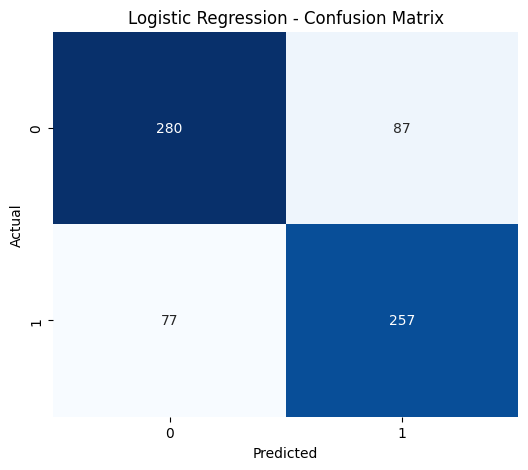

✅ Logistic Regression model completed


In [184]:
print("LOGISTIC REGRESSION MODEL")
print("="*50)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print(f"\nAccuracy: {accuracy_lr:.4f}")
print(f"ROC-AUC Score: {roc_auc_lr:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("✅ Logistic Regression model completed")


### Model 2 - Random Forest

RANDOM FOREST MODEL

Accuracy: 0.7404
ROC-AUC Score: 0.8327

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       367
           1       0.72      0.74      0.73       334

    accuracy                           0.74       701
   macro avg       0.74      0.74      0.74       701
weighted avg       0.74      0.74      0.74       701



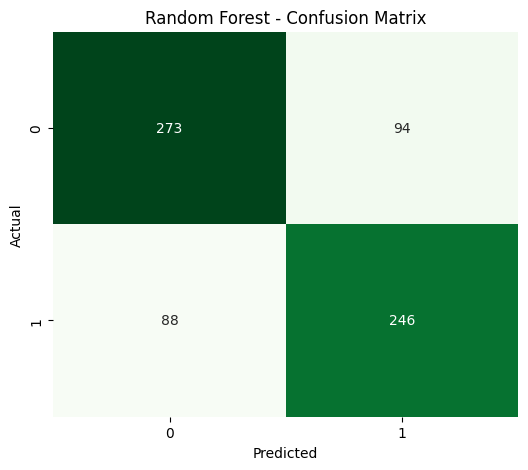

✅ Random Forest model completed


In [185]:
# Train Random Forest model
print("RANDOM FOREST MODEL")
print("="*50)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"\nAccuracy: {accuracy_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("✅ Random Forest model completed")


### Model 3 - Neural Network

NEURAL NETWORK MODEL (TENSORFLOW)
Input dimension: 12 features


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
I0000 00:00:1761126297.851719      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)


Training Neural Network...
Epoch 1/100


I0000 00:00:1761126301.454939      84 service.cc:148] XLA service 0x7c7e7800a8d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761126301.455693      84 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1761126301.740317      84 cuda_dnn.cc:529] Loaded cuDNN version 90300


48/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6545 - loss: 0.6471

I0000 00:00:1761126303.238763      84 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6811 - loss: 0.6237 - val_accuracy: 0.8161 - val_loss: 0.4247
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7912 - loss: 0.4609 - val_accuracy: 0.8357 - val_loss: 0.3999
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8195 - loss: 0.4309 - val_accuracy: 0.8429 - val_loss: 0.3883
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8267 - loss: 0.4229 - val_accuracy: 0.8429 - val_loss: 0.3814
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8153 - loss: 0.4251 - val_accuracy: 0.8429 - val_loss: 0.3784
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8272 - loss: 0.4225 - val_accuracy: 0.8446 - val_loss: 0.3740
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8199 - loss: 0.4256 - val_accuracy: 0.8482 - val_loss: 0.3683
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8270 - loss: 0.3969 - val_accuracy: 0.8482 - val_loss: 0.

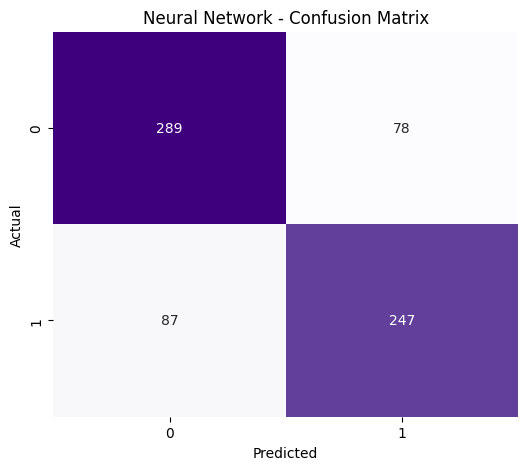

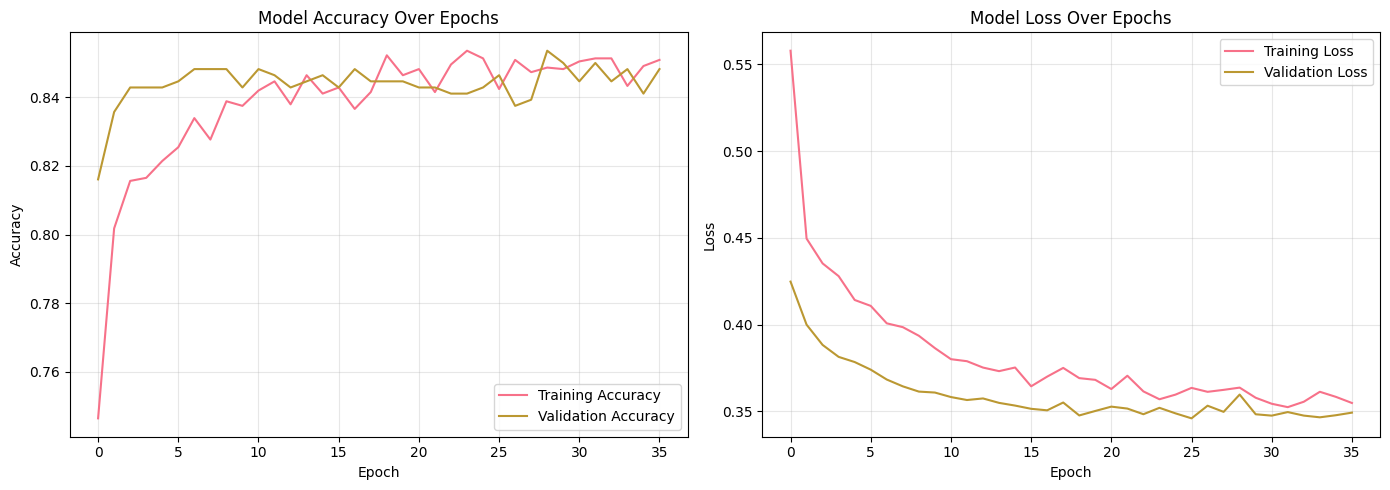

✅ Neural Network model completed


In [186]:
# Train Neural Network model using TensorFlow/Keras
print("NEURAL NETWORK MODEL (TENSORFLOW)")
print("="*50)

# Get input dimension
input_dim = X_train.shape[1]
print(f"Input dimension: {input_dim} features")

# # Build Sequential model
# nn_model = Sequential([
#     Dense(64, activation='relu', input_shape=(input_dim,)),
#     Dense(32, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

nn_model = Sequential([
    Dense(64, input_shape=(input_dim,)),
    LeakyReLU(negative_slope=0.2),
    Dropout(0.3),
    Dense(32),
    LeakyReLU(negative_slope=0.2),
    Dropout(0.2),
    Dense(16),
    LeakyReLU(negative_slope=0.2),
    Dense(1, activation='sigmoid')
])

# Compile model
nn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Model summary
print("\nModel Architecture:")
nn_model.summary()

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
print("\nTraining Neural Network...")
history = nn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Make predictions
y_pred_proba_nn = nn_model.predict(X_test).flatten()
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)

# Evaluate model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)

print(f"\nAccuracy: {accuracy_nn:.4f}")
print(f"ROC-AUC Score: {roc_auc_nn:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Neural Network - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy Over Epochs')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Model Loss Over Epochs')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Neural Network model completed")


###  Inference functions

#### 1. Logistic Regression Inference

In [187]:
def predict_logistic_regression(raw_input):
    """
    Takes raw input (dict or pandas Series), returns prediction from Logistic Regression model.
    """
    # Convert input to DataFrame with one row, matching feature order
    input_df = pd.DataFrame([raw_input], columns=X.columns)
    # Predict probability and class
    prob = lr_model.predict_proba(input_df)[0, 1]
    pred = lr_model.predict(input_df)[0]
    return {"class": int(pred), "probability": float(prob)}


#### 2. Random Forest Inference

In [188]:
def predict_random_forest(raw_input):
    """
    Takes raw input (dict or pandas Series), returns prediction from Random Forest model.
    """
    input_df = pd.DataFrame([raw_input], columns=X.columns)
    prob = rf_model.predict_proba(input_df)[0, 1]
    pred = rf_model.predict(input_df)[0]
    return {"class": int(pred), "probability": float(prob)}


#### 3.Neural Network  Inference

In [189]:
def predict_neural_network(raw_input):
    """
    Takes raw input (dict or pandas Series), returns prediction from Neural Network model.
    """
    input_df = pd.DataFrame([raw_input], columns=X.columns)
    # Neural network expects numpy array
    prob = nn_model.predict(input_df.values)[0, 0]
    pred = int(prob > 0.5)
    return {"class": pred, "probability": float(prob)}


In [190]:
raw_input = {
    # Numerical features
    "sentiment_score": 0.5,
    "start_location_encoded": 0.7,
    "end_location_encoded": 0.6,
    "verified_encoded": 1,

    # One-hot encoded traveller_type features (Unknown was dropped as reference)
    "traveller_type_Business": 0,
    "traveller_type_Couple Leisure": 0,
    "traveller_type_Family Leisure": 1,
    "traveller_type_Solo Leisure": 0,

    # One-hot encoded class features (Unknown was dropped as reference)
    "class_Business Class": 0,
    "class_Economy Class": 1,
    "class_First Class": 0,
    "class_Premium Economy": 0,
}


result_lr = predict_logistic_regression(raw_input)
result_rf = predict_random_forest(raw_input)
result_nn = predict_neural_network(raw_input)

print("Logistic Regression:", result_lr)
print("Random Forest:", result_rf)
print("Neural Network:", result_nn)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Logistic Regression: {'class': 1, 'probability': 0.8948084278205891}
Random Forest: {'class': 1, 'probability': 0.76}
Neural Network: {'class': 1, 'probability': 0.8021330237388611}


## Examples with raw input

In [191]:

EXAMPLES = [
    {
        "passenger_name": "Paige Boet",
        "flying_date": "June 2023",
        "route": "New Orleans to London",
        "verified": "Trip Verified",
        "review_title": "The airline lost my luggage",
        "review_content": "The airline lost my luggage and was absolutely unhelpful. Slow response and no refund yet.",
        "traveller_type": "Solo Leisure",
        "class": "Economy Class",
        "start_location": "New Orleans",
        "end_location": "London",
    },
    {
        "passenger_name": "S Layne",
        "flying_date": "March 2023",
        "route": "London to Amman",
        "verified": "Trip Verified",
        "review_title": "fully refunded by our travel insurance",
        "review_content": "Booking was easy and staff were polite but our flight was delayed. Got a refund quickly.",
        "traveller_type": "Couple Leisure",
        "class": "Business Class",
        "start_location": "London",
        "end_location": "Amman",
    },
    {
        "passenger_name": "E Lanewoski",
        "flying_date": "Unknown",
        "route": "Heathrow to Bodrum",
        "verified": "Trip Verified",
        "review_title": "no boarding drinks provided",
        "review_content": "Crew were friendly and seats comfortable, but service was slow.",
        "traveller_type": "Solo Leisure",
        "class": "Business Class",
        "start_location": "London Heathrow",
        "end_location": "Bodrum",
    },
    {
        "passenger_name": "R Chen",
        "flying_date": "April 2024",
        "route": "Paris to New York",
        "verified": "true",
        "review_title": "smooth flight, quick boarding",
        "review_content": "Great crew and comfortable seats. Quick boarding and on-time arrival!",
        "traveller_type": "Business",
        "class": "Premium Economy",
        "start_location": "Paris",
        "end_location": "New York",
    },
    {
        "passenger_name": "M Alvarez",
        "flying_date": "December 2022",
        "route": "Madrid to Cairo",
        "verified": "",
        "review_title": "missed connection and baggage delay",
        "review_content": "Missed my connection due to a delay. Baggage arrived late and staff were not helpful.",
        "traveller_type": "Family Leisure",
        "class": "Economy Class",
        "start_location": "Madrid",
        "end_location": "Cairo",
    },
]


if __name__ == "__main__":
    import json

    def _raw_view(r):
        keys = [
            "passenger_name", "route", "verified", "traveller_type", "class",
            "review_title", "review_content", "start_location", "end_location"
        ]
        return {k: r.get(k) for k in keys}

    for i, raw in enumerate(EXAMPLES, 1):
        def _safe(callable_fn, *args, **kwargs):
            try:
                return callable_fn(*args, **kwargs)
            except Exception as e:
                return {"label": "error", "confidence": 0.0, "error": str(e)}

        feats = preprocess_raw(raw)
        lr = _safe(predict_logistic_regression, feats)
        rf = _safe(predict_random_forest, feats)
        nn = _safe(predict_neural_network, feats)

        print(f"Example {i}")
        print("INPUT (raw):")
        print(json.dumps(_raw_view(raw), ensure_ascii=False, indent=2))
        print("FEATURES (after preprocessing):")
        print(json.dumps(feats, ensure_ascii=False, indent=2, sort_keys=True))
        print("OUTPUT:")
        print(format_output(raw, lr, rf, nn))
        print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Example 1
INPUT (raw):
{
  "passenger_name": "Paige Boet",
  "route": "New Orleans to London",
  "verified": "Trip Verified",
  "traveller_type": "Solo Leisure",
  "class": "Economy Class",
  "review_title": "The airline lost my luggage",
  "review_content": "The airline lost my luggage and was absolutely unhelpful. Slow response and no refund yet.",
  "start_location": "New Orleans",
  "end_location": "London"
}
FEATURES (after preprocessing):
{
  "class_Business Class": 0,
  "class_Economy Class": 1,
  "class_First Class": 0,
  "class_Premium Economy": 0,
  "end_location_encoded": 0.4035,
  "sentiment_score": -0.7003,
  "start_location_encoded": 0.6667,
  "traveller_type_Business": 0,
  "traveller_type_Couple Leisure": 0,
  "traveller_type_Family Leisure": 0,
  "traveller_type_Solo Leisure": 1,
  "verified_encoded": 1
}
OUTPUT:
Paige Boet on New Orleans to London: Logistic regression: likely not satisfied (27.1% satisfied). Random forest: almost 

### SHAP and LIME Explanation

In [192]:
background = shap.sample(X_train, 100, random_state=42)

####  Explanation for Logistic Regression

SHAP EXPLANATION - LOGISTIC REGRESSION


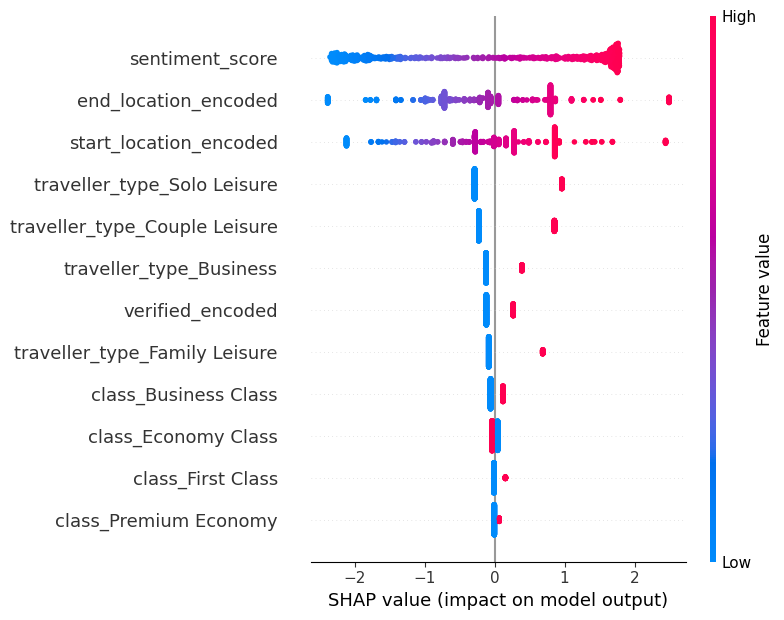


LIME EXPLANATION - LOGISTIC REGRESSION


X does not have valid feature names, but LogisticRegression was fitted with feature names


✅ SHAP and LIME explanations completed for Logistic Regression


In [193]:

print("SHAP EXPLANATION - LOGISTIC REGRESSION")
print("="*50)

explainer_lr = shap.Explainer(lr_model, background)
shap_values_lr = explainer_lr(X_test)
shap.summary_plot(shap_values_lr.values, X_test, feature_names=X.columns)

print("\n" + "="*50)
print("LIME EXPLANATION - LOGISTIC REGRESSION")
print("="*50)

# Create LIME explainer
lime_explainer_lr = lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Not Satisfied', 'Satisfied'],
    mode='classification'
)

# Explain a single prediction
idx = 0
lime_exp_lr = lime_explainer_lr.explain_instance(
    X_test.values[idx],
    lr_model.predict_proba,
    num_features=10
)

# Show explanation
lime_exp_lr.show_in_notebook(show_table=True)
print("✅ SHAP and LIME explanations completed for Logistic Regression")


####  Explanation for Random Forest

SHAP EXPLANATION - RANDOM FOREST


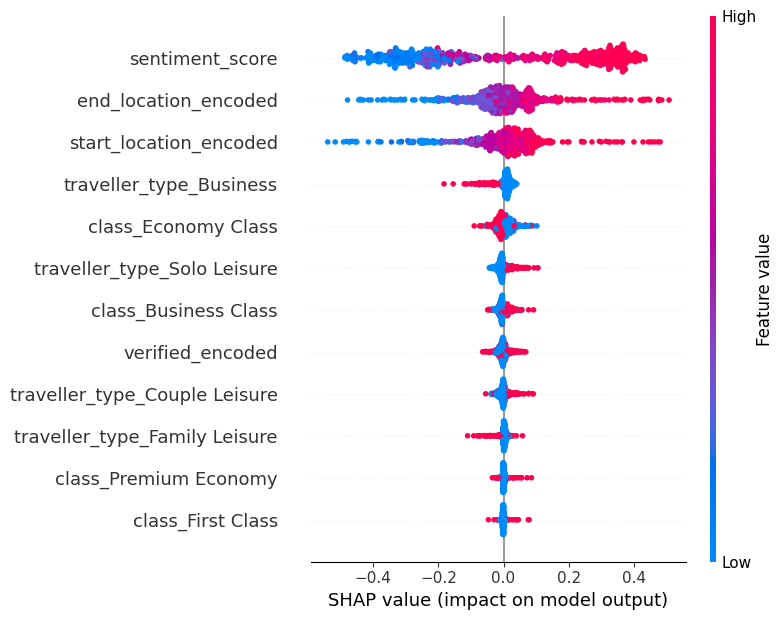


LIME EXPLANATION - RANDOM FOREST


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


✅ SHAP and LIME explanations completed for Random Forest


In [194]:

print("SHAP EXPLANATION - RANDOM FOREST")
print("="*50)

explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test, check_additivity=False)
shap.summary_plot(shap_values_rf[1], X_test, feature_names=X.columns)

print("\n" + "="*50)
print("LIME EXPLANATION - RANDOM FOREST")
print("="*50)

# Create LIME explainer
lime_explainer_rf = lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Not Satisfied', 'Satisfied'],
    mode='classification'
)

# Explain a single prediction
idx = 0
lime_exp_rf = lime_explainer_rf.explain_instance(
    X_test.values[idx],
    rf_model.predict_proba,
    num_features=10
)

# Show explanation
lime_exp_rf.show_in_notebook(show_table=True)
print("✅ SHAP and LIME explanations completed for Random Forest")


####  Explanation for Neural Network

In [195]:
def predict_fn(X):
    prob =nn_model.predict(X)
    return np.hstack([1 - prob, prob])

SHAP EXPLANATION - NEURAL NETWORK


PermutationExplainer explainer: 702it [01:37,  6.69it/s]


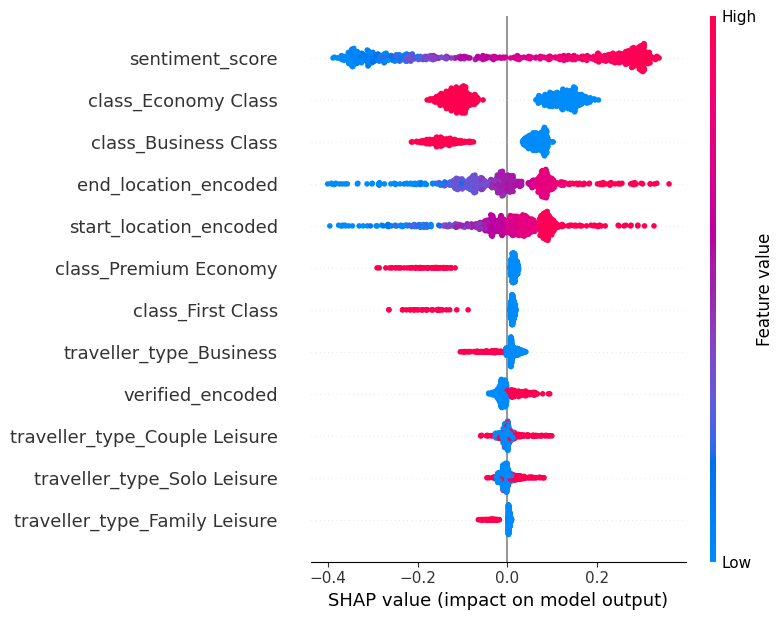


LIME EXPLANATION - NEURAL NETWORK
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


✅ SHAP and LIME explanations completed for Neural Network


In [196]:

print("SHAP EXPLANATION - NEURAL NETWORK")
print("="*50)

explainer_nn = shap.Explainer(nn_model, background)
shap_values_nn = explainer_nn(X_test)
shap.summary_plot(shap_values_nn.values, X_test, feature_names=X.columns)

print("\n" + "="*50)
print("LIME EXPLANATION - NEURAL NETWORK")
print("="*50)

# Create LIME explainer
lime_explainer_nn = lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Not Satisfied', 'Satisfied'],
    mode='classification'
)

# Explain a single prediction
idx = 0
lime_exp_nn = lime_explainer_nn.explain_instance(
    X_test.values[idx],
    predict_fn,
    num_features=10
)

# Show explanation
lime_exp_nn.show_in_notebook(show_table=True)
print("✅ SHAP and LIME explanations completed for Neural Network")
